# Analysis of UN General Debate speeches

For this analysis we look into the plain text version of UN General Debate speeches up to 2017.

Please specify below the focus year of this analysis. It will be consider as the end point of historical analyses, as well as the year for annual analyses.

In [92]:
focus_year = "2017"
data_folder = "../data/ungd/Converted sessions/"

In [93]:
import os
import re
import pandas as pd
import pycountry

filename_pattern = re.compile(r"^(?P<country>[A-Z]{2,4})_[0-9]{2}_(?P<year>[0-9]{4}).txt$", re.VERBOSE)

files = {}
countries = {}
years = {}
countries_years = {}


for root, directories, filenames in os.walk(data_folder):
    for filename in filenames: 
        match = filename_pattern.match(filename)
        if match:
            path = os.path.join(root,filename)
            (country, year) = (match.group('country'), match.group('year'))
            try:
                country_name = pycountry.countries.get(alpha_3=country).name
            except:
                country_name = country
            files[path] = {'country' : country_name, 'year' : year}
            countries[country_name] = countries.get(country_name,0) + 1
            years[year] = years.get(year,0) + 1
            if country_name in countries_years.keys():
                countries_years[country_name][year] = countries_years[country_name].get(year,0) + 1
            else:
                countries_years[country_name] = {year : 1}

In [94]:
print("There are %d speeches in total" % (len(files.keys())))

There are 7897 speeches in total


In [95]:
df_countries = pd.DataFrame(sorted(countries.items(), key=lambda k: k[1], reverse=True), columns=["Country", "Number of speeches"])
df_countries

Country  Number of speeches
0                              Sudan                  48
1                             Mexico                  48
2                             Israel                  48
3                          Guatemala                  48
4                              Italy                  48
5                        El Salvador                  48
6                            Ecuador                  48
7                               Cuba                  48
8                     United Kingdom                  48
9                           Pakistan                  48
10   Bolivia, Plurinational State of                  48
11                              Peru                  48
12                       New Zealand                  48
13                           Morocco                  48
14                            Brazil                  48
15                          Colombia                  48
16                           Uruguay                  48
17                           Belarus                  48
18                         Argentina                  48
19                             Japan                  48
20                         Sri Lanka                  48
21                         Indonesia                  48
22                              Iraq                  48
23                             Congo                  48
24                           Tunisia                  48
25                            France                  48
26                            Rwanda                  48
27                             India                  48
28                           Iceland                  48
29                             Ghana                  48
..                               ...                 ...
169                          Croatia                  26
170                         Slovenia                  26
171                       Tajikistan                  26
172  Micronesia, Federated States of                  26
173                       Kazakhstan                  26
174                 Marshall Islands                  26
175                          Georgia                  25
176           Macedonia, Republic of                  25
177                           Monaco                  25
178                         Slovakia                  25
179                          Eritrea                  25
180                          Czechia                  25
181                          Andorra                  24
182                       Uzbekistan                  22
183                     Turkmenistan                  22
184                              CSK                  22
185                            Palau                  20
186              Palestine, State of                  20
187                             YDYE                  19
188                            Nauru                  18
189                              DDR                  18
190                           Tuvalu                  17
191                            Tonga                  17
192                      Switzerland                  16
193                         Kiribati                  15
194    Holy See (Vatican City State)                  15
195                      Timor-Leste                  15
196                       Montenegro                  12
197                               EU                   7
198                      South Sudan                   7

[199 rows x 2 columns]

In [96]:
df_years = pd.DataFrame(sorted(years.items(), reverse=True), columns=["Year", "Number of speeches"])
df_years

Year  Number of speeches
0   2017                 196
1   2016                 194
2   2015                 193
3   2014                 194
4   2013                 193
5   2012                 195
6   2011                 194
7   2010                 189
8   2009                 193
9   2008                 192
10  2007                 191
11  2006                 193
12  2005                 185
13  2004                 192
14  2003                 189
15  2002                 188
16  2001                 189
17  2000                 178
18  1999                 181
19  1998                 181
20  1997                 176
21  1996                 181
22  1995                 172
23  1994                 178
24  1993                 175
25  1992                 167
26  1991                 162
27  1990                 156
28  1989                 153
29  1988                 154
30  1987                 152
31  1986                 149
32  1985                 137
33  1984                 150
34  1983                 149
35  1982                 147
36  1981                 145
37  1980                 149
38  1979                 144
39  1978                 141
40  1977                 140
41  1976                 134
42  1975                 126
43  1974                 129
44  1973                 120
45  1972                 125
46  1971                 116
47  1970                  70

## 1. Analysing the text of UNGD speeches: searching for health and climate mentions

In [97]:
climate_dict = ["climate_change", "global_warming", "green_house", "temperature", "extreme_weather", 
                "global_environmental_change", "climate_variability", "greenhouse", "low_carbon", "ghge", 
                "renewable_energy", "carbon_emission", "co2_emission", "climate_pollutant"]

health_dict  = ["malaria", "diarrhoea", "infection", "disease", "sars", "measles", "pneumonia", "epidemic", 
                "pandemic", "public_health", "health_care", "epidemiology", "healthcare", "health", "mortality", 
                "morbidity", "nutrition", "illness", "infectious", "ncd", "non-communicable_disease", 
                "noncommunicable_disease", "communicable_disease", "air_pollution", "nutrition", "malnutrition", 
                "mental_disorder", "stunting"]

compound_terms = [("climate", "change"), ("global", "warming"), ("green", "house"), ("extreme", "weather"), 
                  ("global", "environmental", "change"), ("climate", "variability"), ("low", "carbon"), 
                  ("renewable", "energy"), ("carbon", "emission"), ("co2", "emission"), ("climate", "pollutant"), 
                  ("public", "health"), ("health", "care"), ("non-communicable", "disease"), 
                  ("noncommunicable", "disease"), ("communicable", "disease"), ("air", "pollution"), 
                  ("mental", "disorder")]


In [98]:
who_regions = {}

who_regions["Africa"] = ["Algeria", "Angola", "Benin", "Botswana", "British Indian Ocean Territory", 
                         "Burkina Faso", "Burundi", "Cabo Verde", "Cameroon", "Central African Republic", 
                         "Chad", "Comoros", "Congo, The Democratic Republic of the", "Côte d'Ivoire", 
                         "Congo", "Congo, Republic of the", 
                         "Equatorial Guinea", "Eritrea", "Ethiopia", "French Southern Territories", "Gabon", 
                         "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Kenya", "Lesotho", "Liberia", 
                         "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Mayotte", "Mozambique", 
                         "Namibia", "Niger", "Nigeria", "Rwanda", "Réunion", "Saint Helena", 
                         "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone", "South Africa", 
                         "South Sudan", "Swaziland", "Togo", "Uganda", "Tanzania, United Republic of", 
                         "Western Sahara", "Zambia", "Zimbabwe"]

who_regions["Eastern Mediterranean"] = ["Afghanistan", "Bahrain", "Djibouti", "Egypt", 
                                        "Iran, Islamic Republic of", "Iraq", "Jordan", "Kuwait", "Lebanon", 
                                        "Libya", "Morocco", "Oman", "Pakistan", "Qatar", "Saudi Arabia", 
                                        "Somalia", "Palestine, State of", "Sudan", "Syrian Arab Republic", 
                                        "Tunisia", "United Arab Emirates", "Yemen"]

who_regions["Europe"] = ["Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium", 
                         "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", 
                         "Estonia", "Faroe Islands", "Finland", "France", "Georgia", "Germany", "Gibraltar", 
                         "Greece", "Guernsey", "Holy See", "Hungary", "Iceland", "Ireland", "Isle of Man", 
                         "Israel", "Italy", "Jersey", "Kazakhstan", "Kyrgyzstan", "Latvia", "Liechtenstein", 
                         "Lithuania", "Luxembourg", "Malta", "Monaco", "Montenegro", "Netherlands", "Norway", 
                         "Poland", "Portugal", "Moldova, Republic of", "Romania", "Russian Federation", 
                         "San Marino", "Sark", "Serbia", "Slovakia", "Slovenia", "Spain", 
                         "Svalbard and Jan Mayen Islands", "Sweden", "Switzerland", "Tajikistan", 
                         "Macedonia, Republic of", "Turkey", "Turkmenistan", "Ukraine", 
                         "United Kingdom", "Uzbekistan", 
                         "Åland Islands"]

who_regions["Latin America and the Caribbean"] = ["Anguilla", "Antigua and Barbuda", "Argentina", "Aruba", 
                                                  "Bahamas", "Barbados", "Belize", "Bolivia, Plurinational State of", "Bonaire", 
                                                  "Bouvet Island", "Brazil", "British Virgin Islands", 
                                                  "Cayman Islands", "Chile", "Colombia", "Costa Rica", "Cuba", 
                                                  "Curaçao", "Dominica", "Dominican Republic", "Ecuador", 
                                                  "El Salvador", "Falkland Islands (Malvinas)", "French Guiana", 
                                                  "Grenada", "Guadeloupe", "Guatemala", "Guyana", "Haiti", 
                                                  "Honduras", "Jamaica", "Martinique", "Mexico", "Montserrat", 
                                                  "Nicaragua", "Panama", "Paraguay", "Peru", "Puerto Rico", 
                                                  "Saint Barthթlemy", "Saint Kitts and Nevis", "Saint Lucia", 
                                                  "Saint Martin", "Saint Vincent and the Grenadines", 
                                                  "Sint Maarten", "South Georgia and the South Sandwich Islands", 
                                                  "Suriname", "Trinidad and Tobago", "Turks and Caicos Islands", 
                                                  "Virgin Islands", "Uruguay", "Venezuela, Bolivarian Republic of"]

who_regions["North America"] = ["Bermuda", "Canada", "Greenland", "Saint Pierre and Miquelon", 
                                "United States"]

who_regions["South-East Asia"] = ["Bangladesh", "Bhutan", "Korea, Democratic People's Republic of", "India", 
                                  "Indonesia", "Maldives", "Myanmar", "Nepal", "Sri Lanka", "Thailand", 
                                  "Timor-Leste"]

who_regions["Western Pacific"] = ["American Samoa", "Australia", "Brunei Darussalam", "Cambodia", "China", 
                                  "Hong Kong", "Macao", "Taiwan", "Christmas Island", "Cocos (Keeling) Islands", 
                                  "Cook Islands", "Fiji", "French Polynesia", "Guam", 
                                  "Heard Island and McDonald Islands", "Japan", "Kiribati", 
                                  "Lao People's Democratic Republic", "Malaysia", "Marshall Islands", "Micronesia, Federated States of", "Mongolia", "Nauru", 
                                  "New Caledonia", "New Zealand", "Niue", "Norfolk Island", 
                                  "Northern Mariana Islands", "Palau", "Papua New Guinea", "Philippines", 
                                  "Pitcairn", "Korea, Republic of", "Samoa", "Singapore", "Solomon Islands", 
                                  "Tokelau", "Tonga", "Tuvalu", "Minor Outlying Islands", "Vanuatu", 
                                  "Viet Nam", "Wallis and Futuna Islands"]

def get_who_region(country):
    for region in who_regions:
        if country in who_regions[region]:
            return region
    if "..." in country:
        abrev_country_name = re.search(r'(?<=^)[^\.]+', country)[0]
        for region in who_regions:
            for c in who_regions[region]:
                if re.match(abrev_country_name, c):
                    return region
    print("Country not found among WHO regions: %s" % country)
    return False

regions = {}
for country in countries.keys():
    region = get_who_region(country)
    regions[region] = regions.get(region,0) + countries[country]

regions_years = {}
for region in who_regions.keys():
    regions_years[region] = {}
for country in countries_years.keys():
    region = get_who_region(country)
    if region:
        for year in countries_years[country].keys():
            regions_years[region][year] = regions_years[region].get(year, 0) + countries_years[country][year]

Country not found among WHO regions: YUG
Country not found among WHO regions: Holy See (Vatican City State)
Country not found among WHO regions: EU
Country not found among WHO regions: CSK
Country not found among WHO regions: YDYE
Country not found among WHO regions: DDR
Country not found among WHO regions: YUG
Country not found among WHO regions: Holy See (Vatican City State)
Country not found among WHO regions: EU
Country not found among WHO regions: CSK
Country not found among WHO regions: YDYE
Country not found among WHO regions: DDR


In [99]:
df_regions = pd.DataFrame(sorted(regions.items(), key=lambda k: k[1], reverse=True), columns=["Region", "Number of speeches"])
df_regions

Region  Number of speeches
0                           Africa                1962
1                           Europe                1953
2  Latin America and the Caribbean                1448
3            Eastern Mediterranean                 968
4                  Western Pacific                 896
5                  South-East Asia                 454
6                            False                 120
7                    North America                  96

In [100]:
from nltk.tokenize import MWETokenizer

def get_context(index, wordlist):
    lowest_index = max(0, index-25)
    highest_index = min(index+1+25, len(wordlist))
    return wordlist[lowest_index:index] + wordlist[index+1:highest_index]

tokenizer = MWETokenizer(compound_terms)
regex = re.compile(r'^.{1,3}$') #words with 3 or less chars

per_country = {}
per_country_focusyear = {}
average_per_country_focusyear = {}
proportion_per_country_focusyear = {}
per_year = {}
average_per_year = {}
proportion_per_year = {}
per_region = {}
per_region_year_intersection = {}
average_per_region_year_intersection = {}
proportion_per_region_year_intersection = {}
histogram_number_of_mentions = {}

global_count_health_keywords = {}
global_health_contexts = []
global_count_climate_keywords = {}
global_climate_contexts = []
global_intersection_contexts = []

cooccurrence_matrix = {}

for termset in ["health", "climate", "intersection"]:
    per_country[termset] = {}
    per_country_focusyear[termset] = {}
    average_per_country_focusyear[termset] = {}
    proportion_per_country_focusyear[termset] = {}
    per_year[termset] = {}
    average_per_year[termset] = {}
    proportion_per_year[termset] = {}
    per_region[termset] = {}
    histogram_number_of_mentions[termset] = {}
    
for region in who_regions.keys():
    per_region_year_intersection[region] = {}
    average_per_region_year_intersection[region] = {}
    proportion_per_region_year_intersection[region] = {}

for file in files.keys():
    print("Loading %s" % (file))

    try:
        txtFileObj = open(file, 'r')
    except:
        print('Could not open file %s' % file)

    wordlist = re.split(r'[\W0-9]+', txtFileObj.read().lower())
    compounds_wordlist = tokenizer.tokenize(wordlist)
    filtered_compounds_wordlist = [w for w in compounds_wordlist if (len(w) > 3)]

    health_contexts = []
    climate_contexts = []
    health_words = []
    
    for i in range(0,len(filtered_compounds_wordlist)):
        word = filtered_compounds_wordlist[i]
        if word in health_dict:
            context = get_context(i, filtered_compounds_wordlist)
            health_contexts.append(context)
            health_words.append(word)
            global_count_health_keywords[word] = global_count_health_keywords.get(word, 0) + 1
            global_health_contexts.extend(context)
            
        if word in climate_dict:
            context = get_context(i, filtered_compounds_wordlist)
            climate_contexts.append(context)
            global_count_climate_keywords[word] = global_count_climate_keywords.get(word, 0) + 1
            global_climate_contexts.extend(context)

    total_health_mentions = len(health_contexts)
    
    total_climate_mentions = len(climate_contexts)
        
    total_intersection_mentions = 0
    for i in range(0, len(health_contexts)):
        mention = health_contexts[i]
        hword = health_words[i]
        if hword not in cooccurrence_matrix.keys():
            cooccurrence_matrix[hword] = {}        
        for cword in climate_dict:
            if cword in mention:
                total_intersection_mentions += 1
                global_intersection_contexts.extend(mention)
                cooccurrence_matrix[hword][cword] = cooccurrence_matrix[hword].get(cword, 0) + 1                
        
    year = files[file]["year"]
    country = files[file]["country"]
    region = get_who_region(country)
    
    histogram_number_of_mentions["health"][total_health_mentions] = histogram_number_of_mentions["health"].get(total_health_mentions, 0) + 1
    histogram_number_of_mentions["climate"][total_climate_mentions] = histogram_number_of_mentions["climate"].get(total_climate_mentions, 0) + 1
    histogram_number_of_mentions["intersection"][total_intersection_mentions] = histogram_number_of_mentions["intersection"].get(total_intersection_mentions, 0) + 1
    
    per_country["health"][country] = per_country["health"].get(country,0) + total_health_mentions
    per_country["climate"][country] = per_country["climate"].get(country,0) + total_climate_mentions
    per_country["intersection"][country] = per_country["intersection"].get(country,0) + total_intersection_mentions

    if year == focus_year:
        per_country_focusyear["health"][country] = per_country_focusyear["health"].get(country,0) + total_health_mentions
        per_country_focusyear["climate"][country] = per_country_focusyear["climate"].get(country,0) + total_climate_mentions
        per_country_focusyear["intersection"][country] = per_country_focusyear["intersection"].get(country,0) + total_intersection_mentions

    if region != False:
        per_region["health"][region] = per_region["health"].get(region,0) + total_health_mentions
        per_region["climate"][region] = per_region["climate"].get(region,0) + total_climate_mentions
        per_region["intersection"][region] = per_region["intersection"].get(region,0) + total_intersection_mentions
        per_region_year_intersection[region][year] = per_region_year_intersection[region].get(year,0) + total_intersection_mentions

    per_year["health"][year] = per_year["health"].get(year,0) + total_health_mentions
    per_year["climate"][year] = per_year["climate"].get(year,0) + total_climate_mentions
    per_year["intersection"][year] = per_year["intersection"].get(year,0) + total_intersection_mentions

    if total_health_mentions > 0:
        proportion_per_year["health"][year] = proportion_per_year["health"].get(year,0) + 1
        if year == focus_year:
            proportion_per_country_focusyear["health"][country] = proportion_per_country_focusyear["health"].get(country,0) + 1

    if total_climate_mentions > 0:
        proportion_per_year["climate"][year] = proportion_per_year["climate"].get(year,0) + 1
        if year == focus_year:
            proportion_per_country_focusyear["climate"][country] = proportion_per_country_focusyear["climate"].get(country,0) + 1

    if total_intersection_mentions > 0:
        proportion_per_year["intersection"][year] = proportion_per_year["intersection"].get(year,0) + 1        
        if year == focus_year:
            proportion_per_country_focusyear["intersection"][country] = proportion_per_country_focusyear["intersection"].get(country,0) + 1
        if region != False:
            proportion_per_region_year_intersection[region][year] = proportion_per_region_year_intersection[region].get(year,0) + 1

for year in years.keys():
    average_per_year["health"][year] = per_year["health"][year]/years[year]
    average_per_year["climate"][year] = per_year["climate"][year]/years[year]
    average_per_year["intersection"][year] = per_year["intersection"][year]/years[year]

    proportion_per_year["health"][year] = proportion_per_year["health"].get(year,0)/years[year] * 100
    proportion_per_year["climate"][year] = proportion_per_year["climate"].get(year,0)/years[year] * 100
    proportion_per_year["intersection"][year] = proportion_per_year["intersection"].get(year,0)/years[year] * 100

for country in countries_years.keys():
    if focus_year in countries_years[country].keys():
        average_per_country_focusyear["health"][country] = per_country_focusyear["health"].get(country, 0)/countries_years[country][focus_year]
        average_per_country_focusyear["climate"][country] = per_country_focusyear["climate"].get(country, 0)/countries_years[country][focus_year]
        average_per_country_focusyear["intersection"][country] = per_country_focusyear["intersection"].get(country, 0)/countries_years[country][focus_year]

        proportion_per_country_focusyear["health"][country] = proportion_per_country_focusyear["health"].get(country,0)/countries_years[country][focus_year] * 100
        proportion_per_country_focusyear["climate"][country] = proportion_per_country_focusyear["climate"].get(country,0)/countries_years[country][focus_year] * 100
        proportion_per_country_focusyear["intersection"][country] = proportion_per_country_focusyear["intersection"].get(country,0)/countries_years[country][focus_year] * 100
    
for region in regions_years.keys():
    for year in regions_years[region].keys():
        average_per_region_year_intersection[region][year] = per_region_year_intersection[region].get(year,0)/regions_years[region][year]
        proportion_per_region_year_intersection[region][year] = proportion_per_region_year_intersection[region].get(year,0)/regions_years[region][year] * 100        


Loading ../data/ungd/Converted sessions/Session 61 - 2006/TZA_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/GNB_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/YEM_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/GMB_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/SWZ_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/VCT_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/UZB_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/SGP_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/GRC_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/SDN_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/SAU_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/ROU_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/JOR_61_2006.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 61 - 2006/TUR_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/SVN_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/LSO_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/AUS_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/GIN_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/IRN_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/TJK_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/FSM_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/CZE_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/KHM_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/PAN_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/TON_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/LIE_61_2006.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 67 - 2012/PER_67_2012.txt
Loading ../data/ungd/Converted sessions/Session 67 - 2012/UKR_67_2012.txt
Loading ../data/ungd/Converted sessions/Session 67 - 2012/KGZ_67_2012.txt
Loading ../data/ungd/Converted sessions/Session 67 - 2012/GBR_67_2012.txt
Loading ../data/ungd/Converted sessions/Session 67 - 2012/SYR_67_2012.txt
Loading ../data/ungd/Converted sessions/Session 67 - 2012/VCT_67_2012.txt
Loading ../data/ungd/Converted sessions/Session 67 - 2012/MKD_67_2012.txt
Loading ../data/ungd/Converted sessions/Session 67 - 2012/QAT_67_2012.txt
Loading ../data/ungd/Converted sessions/Session 67 - 2012/CIV_67_2012.txt
Loading ../data/ungd/Converted sessions/Session 67 - 2012/MEX_67_2012.txt
Loading ../data/ungd/Converted sessions/Session 67 - 2012/GTM_67_2012.txt
Loading ../data/ungd/Converted sessions/Session 67 - 2012/ECU_67_2012.txt
Loading ../data/ungd/Converted sessions/Session 67 - 2012/TTO_67_2012.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 26 - 1971/GUY_26_1971.txt
Loading ../data/ungd/Converted sessions/Session 26 - 1971/LBN_26_1971.txt
Loading ../data/ungd/Converted sessions/Session 26 - 1971/HUN_26_1971.txt
Loading ../data/ungd/Converted sessions/Session 26 - 1971/QAT_26_1971.txt
Loading ../data/ungd/Converted sessions/Session 26 - 1971/PER_26_1971.txt
Loading ../data/ungd/Converted sessions/Session 26 - 1971/MYS_26_1971.txt
Loading ../data/ungd/Converted sessions/Session 26 - 1971/JAM_26_1971.txt
Loading ../data/ungd/Converted sessions/Session 26 - 1971/ISR_26_1971.txt
Loading ../data/ungd/Converted sessions/Session 26 - 1971/GTM_26_1971.txt
Loading ../data/ungd/Converted sessions/Session 26 - 1971/JPN_26_1971.txt
Loading ../data/ungd/Converted sessions/Session 26 - 1971/PAK_26_1971.txt
Loading ../data/ungd/Converted sessions/Session 26 - 1971/ITA_26_1971.txt
Loading ../data/ungd/Converted sessions/Session 26 - 1971/LAO_26_1971.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 35 - 1980/IDN_35_1980.txt
Loading ../data/ungd/Converted sessions/Session 35 - 1980/ZWE_35_1980.txt
Loading ../data/ungd/Converted sessions/Session 35 - 1980/LKA_35_1980.txt
Loading ../data/ungd/Converted sessions/Session 35 - 1980/MNG_35_1980.txt
Loading ../data/ungd/Converted sessions/Session 35 - 1980/DNK_35_1980.txt
Loading ../data/ungd/Converted sessions/Session 35 - 1980/AUT_35_1980.txt
Loading ../data/ungd/Converted sessions/Session 35 - 1980/SYC_35_1980.txt
Loading ../data/ungd/Converted sessions/Session 35 - 1980/BDI_35_1980.txt
Loading ../data/ungd/Converted sessions/Session 35 - 1980/CHN_35_1980.txt
Loading ../data/ungd/Converted sessions/Session 35 - 1980/KHM_35_1980.txt
Loading ../data/ungd/Converted sessions/Session 35 - 1980/PRT_35_1980.txt
Loading ../data/ungd/Converted sessions/Session 35 - 1980/EGY_35_1980.txt
Loading ../data/ungd/Converted sessions/Session 35 - 1980/BEL_35_1980.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 46 - 1991/OMN_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/CIV_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/KHM_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/MEX_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/FSM_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/MLI_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/BLR_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/CSK_46_1991.txt
Country not found among WHO regions: CSK
Loading ../data/ungd/Converted sessions/Session 46 - 1991/JPN_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/AUT_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/BGR_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/PER_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/GTM_46_1991.t

Loading ../data/ungd/Converted sessions/Session 39 - 1984/IDN_39_1984.txt
Loading ../data/ungd/Converted sessions/Session 39 - 1984/PAN_39_1984.txt
Loading ../data/ungd/Converted sessions/Session 39 - 1984/TUN_39_1984.txt
Loading ../data/ungd/Converted sessions/Session 39 - 1984/GNQ_39_1984.txt
Loading ../data/ungd/Converted sessions/Session 39 - 1984/GUY_39_1984.txt
Loading ../data/ungd/Converted sessions/Session 39 - 1984/DZA_39_1984.txt
Loading ../data/ungd/Converted sessions/Session 39 - 1984/LBR_39_1984.txt
Loading ../data/ungd/Converted sessions/Session 39 - 1984/NOR_39_1984.txt
Loading ../data/ungd/Converted sessions/Session 39 - 1984/LBY_39_1984.txt
Loading ../data/ungd/Converted sessions/Session 39 - 1984/PNG_39_1984.txt
Loading ../data/ungd/Converted sessions/Session 39 - 1984/POL_39_1984.txt
Loading ../data/ungd/Converted sessions/Session 39 - 1984/CRI_39_1984.txt
Loading ../data/ungd/Converted sessions/Session 39 - 1984/BLZ_39_1984.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 72 - 2017/LBY_72_2017.txt
Loading ../data/ungd/Converted sessions/Session 72 - 2017/CZE_72_2017.txt
Loading ../data/ungd/Converted sessions/Session 72 - 2017/CYP_72_2017.txt
Loading ../data/ungd/Converted sessions/Session 72 - 2017/DJI_72_2017.txt
Loading ../data/ungd/Converted sessions/Session 72 - 2017/ATG_72_2017.txt
Loading ../data/ungd/Converted sessions/Session 72 - 2017/GRC_72_2017.txt
Loading ../data/ungd/Converted sessions/Session 72 - 2017/ISL_72_2017.txt
Loading ../data/ungd/Converted sessions/Session 72 - 2017/COL_72_2017.txt
Loading ../data/ungd/Converted sessions/Session 72 - 2017/PHL_72_2017.txt
Loading ../data/ungd/Converted sessions/Session 72 - 2017/GTM_72_2017.txt
Loading ../data/ungd/Converted sessions/Session 72 - 2017/DZA_72_2017.txt
Loading ../data/ungd/Converted sessions/Session 72 - 2017/NRU_72_2017.txt
Loading ../data/ungd/Converted sessions/Session 72 - 2017/ARM_72_2017.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 72 - 2017/AGO_72_2017.txt
Loading ../data/ungd/Converted sessions/Session 72 - 2017/KHM_72_2017.txt
Loading ../data/ungd/Converted sessions/Session 72 - 2017/MOZ_72_2017.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/CSK_34_1979.txt
Country not found among WHO regions: CSK
Loading ../data/ungd/Converted sessions/Session 34 - 1979/NLD_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/SDN_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/YUG_34_1979.txt
Country not found among WHO regions: YUG
Loading ../data/ungd/Converted sessions/Session 34 - 1979/RUS_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/DEU_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/PAN_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/MMR_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/COM_34_1979.txt
Loading ../data/ungd/Converted

Loading ../data/ungd/Converted sessions/Session 34 - 1979/BGD_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/EGY_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/PNG_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/AUT_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/FIN_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/GIN_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/DMA_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/ESP_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/CUB_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/CHN_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/MDV_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/UKR_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/HND_34_1979.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 27 - 1972/SLE_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/FRA_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/HUN_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/JAM_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/LUX_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/TUN_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/BDI_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/JOR_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/EGY_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/YEM_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/NGA_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/URY_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/CAF_27_1972.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 33 - 1978/IRN_33_1978.txt
Loading ../data/ungd/Converted sessions/Session 33 - 1978/TGO_33_1978.txt
Loading ../data/ungd/Converted sessions/Session 33 - 1978/IND_33_1978.txt
Loading ../data/ungd/Converted sessions/Session 33 - 1978/ECU_33_1978.txt
Loading ../data/ungd/Converted sessions/Session 33 - 1978/COG_33_1978.txt
Loading ../data/ungd/Converted sessions/Session 33 - 1978/YDYE_33_1978.txt
Country not found among WHO regions: YDYE
Loading ../data/ungd/Converted sessions/Session 33 - 1978/NZL_33_1978.txt
Loading ../data/ungd/Converted sessions/Session 33 - 1978/MDV_33_1978.txt
Loading ../data/ungd/Converted sessions/Session 33 - 1978/PHL_33_1978.txt
Loading ../data/ungd/Converted sessions/Session 33 - 1978/ITA_33_1978.txt
Loading ../data/ungd/Converted sessions/Session 33 - 1978/JAM_33_1978.txt
Loading ../data/ungd/Converted sessions/Session 33 - 1978/ISR_33_1978.txt
Loading ../data/ungd/Converted sessions/Session 33 - 1978/IRQ_33_1978

Loading ../data/ungd/Converted sessions/Session 37 - 1982/SLV_37_1982.txt
Loading ../data/ungd/Converted sessions/Session 37 - 1982/MRT_37_1982.txt
Loading ../data/ungd/Converted sessions/Session 37 - 1982/LAO_37_1982.txt
Loading ../data/ungd/Converted sessions/Session 37 - 1982/MEX_37_1982.txt
Loading ../data/ungd/Converted sessions/Session 37 - 1982/BFA_37_1982.txt
Loading ../data/ungd/Converted sessions/Session 37 - 1982/MDV_37_1982.txt
Loading ../data/ungd/Converted sessions/Session 37 - 1982/JOR_37_1982.txt
Loading ../data/ungd/Converted sessions/Session 37 - 1982/ZMB_37_1982.txt
Loading ../data/ungd/Converted sessions/Session 37 - 1982/HTI_37_1982.txt
Loading ../data/ungd/Converted sessions/Session 37 - 1982/IRQ_37_1982.txt
Loading ../data/ungd/Converted sessions/Session 37 - 1982/ISL_37_1982.txt
Loading ../data/ungd/Converted sessions/Session 37 - 1982/MNG_37_1982.txt
Loading ../data/ungd/Converted sessions/Session 37 - 1982/ALB_37_1982.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 51 - 1996/MLT_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/SVK_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/SWZ_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/ROU_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/GTM_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/AND_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/DEU_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/AUS_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/AUT_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/NAM_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/PRK_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/UZB_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/VCT_51_1996.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 51 - 1996/AFG_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/IND_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/BFA_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/POL_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/GEO_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/UGA_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/PLW_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/BGR_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/MYS_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/DJI_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/KNA_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/GIN_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/GAB_51_1996.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 54 - 1999/AGO_54_1999.txt
Loading ../data/ungd/Converted sessions/Session 54 - 1999/GNQ_54_1999.txt
Loading ../data/ungd/Converted sessions/Session 54 - 1999/OMN_54_1999.txt
Loading ../data/ungd/Converted sessions/Session 54 - 1999/SMR_54_1999.txt
Loading ../data/ungd/Converted sessions/Session 54 - 1999/GRC_54_1999.txt
Loading ../data/ungd/Converted sessions/Session 54 - 1999/PNG_54_1999.txt
Loading ../data/ungd/Converted sessions/Session 54 - 1999/CAN_54_1999.txt
Loading ../data/ungd/Converted sessions/Session 54 - 1999/SVK_54_1999.txt
Loading ../data/ungd/Converted sessions/Session 54 - 1999/GNB_54_1999.txt
Loading ../data/ungd/Converted sessions/Session 54 - 1999/GHA_54_1999.txt
Loading ../data/ungd/Converted sessions/Session 54 - 1999/KNA_54_1999.txt
Loading ../data/ungd/Converted sessions/Session 54 - 1999/QAT_54_1999.txt
Loading ../data/ungd/Converted sessions/Session 54 - 1999/LTU_54_1999.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 59 - 2004/CMR_59_2004.txt
Loading ../data/ungd/Converted sessions/Session 59 - 2004/EGY_59_2004.txt
Loading ../data/ungd/Converted sessions/Session 59 - 2004/SVK_59_2004.txt
Loading ../data/ungd/Converted sessions/Session 59 - 2004/DZA_59_2004.txt
Loading ../data/ungd/Converted sessions/Session 59 - 2004/SWZ_59_2004.txt
Loading ../data/ungd/Converted sessions/Session 59 - 2004/TTO_59_2004.txt
Loading ../data/ungd/Converted sessions/Session 59 - 2004/IRN_59_2004.txt
Loading ../data/ungd/Converted sessions/Session 59 - 2004/MLI_59_2004.txt
Loading ../data/ungd/Converted sessions/Session 59 - 2004/DMA_59_2004.txt
Loading ../data/ungd/Converted sessions/Session 59 - 2004/YUG_59_2004.txt
Country not found among WHO regions: YUG
Loading ../data/ungd/Converted sessions/Session 59 - 2004/TKM_59_2004.txt
Loading ../data/ungd/Converted sessions/Session 59 - 2004/KOR_59_2004.txt
Loading ../data/ungd/Converted sessions/Session 59 - 2004/KEN_59_2004.t

Loading ../data/ungd/Converted sessions/Session 31 - 1976/PHL_31_1976.txt
Loading ../data/ungd/Converted sessions/Session 31 - 1976/LKA_31_1976.txt
Loading ../data/ungd/Converted sessions/Session 31 - 1976/TGO_31_1976.txt
Loading ../data/ungd/Converted sessions/Session 31 - 1976/FRA_31_1976.txt
Loading ../data/ungd/Converted sessions/Session 31 - 1976/LBR_31_1976.txt
Loading ../data/ungd/Converted sessions/Session 31 - 1976/COG_31_1976.txt
Loading ../data/ungd/Converted sessions/Session 31 - 1976/BTN_31_1976.txt
Loading ../data/ungd/Converted sessions/Session 31 - 1976/MDG_31_1976.txt
Loading ../data/ungd/Converted sessions/Session 31 - 1976/BGR_31_1976.txt
Loading ../data/ungd/Converted sessions/Session 31 - 1976/CHN_31_1976.txt
Loading ../data/ungd/Converted sessions/Session 31 - 1976/JPN_31_1976.txt
Loading ../data/ungd/Converted sessions/Session 31 - 1976/MOZ_31_1976.txt
Loading ../data/ungd/Converted sessions/Session 31 - 1976/CRI_31_1976.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 57 - 2002/IDN_57_2002.txt
Loading ../data/ungd/Converted sessions/Session 57 - 2002/ECU_57_2002.txt
Loading ../data/ungd/Converted sessions/Session 57 - 2002/GIN_57_2002.txt
Loading ../data/ungd/Converted sessions/Session 57 - 2002/ZMB_57_2002.txt
Loading ../data/ungd/Converted sessions/Session 57 - 2002/MMR_57_2002.txt
Loading ../data/ungd/Converted sessions/Session 57 - 2002/SGP_57_2002.txt
Loading ../data/ungd/Converted sessions/Session 57 - 2002/LKA_57_2002.txt
Loading ../data/ungd/Converted sessions/Session 57 - 2002/UGA_57_2002.txt
Loading ../data/ungd/Converted sessions/Session 57 - 2002/CPV_57_2002.txt
Loading ../data/ungd/Converted sessions/Session 57 - 2002/MEX_57_2002.txt
Loading ../data/ungd/Converted sessions/Session 57 - 2002/LIE_57_2002.txt
Loading ../data/ungd/Converted sessions/Session 57 - 2002/WSM_57_2002.txt
Loading ../data/ungd/Converted sessions/Session 57 - 2002/BHS_57_2002.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 32 - 1977/ZMB_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/USA_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/CPV_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/NIC_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/TUN_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/GMB_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/GHA_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/PAN_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/PHL_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/MUS_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/STP_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/MDG_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/YUG_32_1977.txt
Country not found among WHO regions: Y

Loading ../data/ungd/Converted sessions/Session 30 - 1975/PRY_30_1975.txt
Loading ../data/ungd/Converted sessions/Session 30 - 1975/MRT_30_1975.txt
Loading ../data/ungd/Converted sessions/Session 30 - 1975/DZA_30_1975.txt
Loading ../data/ungd/Converted sessions/Session 30 - 1975/TZA_30_1975.txt
Loading ../data/ungd/Converted sessions/Session 30 - 1975/LBR_30_1975.txt
Loading ../data/ungd/Converted sessions/Session 30 - 1975/GUY_30_1975.txt
Loading ../data/ungd/Converted sessions/Session 30 - 1975/LAO_30_1975.txt
Loading ../data/ungd/Converted sessions/Session 30 - 1975/CUB_30_1975.txt
Loading ../data/ungd/Converted sessions/Session 30 - 1975/USA_30_1975.txt
Loading ../data/ungd/Converted sessions/Session 30 - 1975/CHL_30_1975.txt
Loading ../data/ungd/Converted sessions/Session 30 - 1975/IDN_30_1975.txt
Loading ../data/ungd/Converted sessions/Session 30 - 1975/CHN_30_1975.txt
Loading ../data/ungd/Converted sessions/Session 30 - 1975/MLI_30_1975.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 49 - 1994/HTI_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/ZMB_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/KAZ_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/EGY_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/UKR_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/LAO_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/IRN_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/VCT_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/DOM_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/PHL_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/TUR_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/VNM_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/DZA_49_1994.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 49 - 1994/ITA_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/NZL_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/LBN_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/TZA_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/KGZ_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/LKA_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/TUN_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/MDV_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/AUS_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/DNK_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/SWZ_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/MLI_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/MDA_49_1994.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 28 - 1973/IRQ_28_1973.txt
Loading ../data/ungd/Converted sessions/Session 28 - 1973/MRT_28_1973.txt
Loading ../data/ungd/Converted sessions/Session 28 - 1973/BFA_28_1973.txt
Loading ../data/ungd/Converted sessions/Session 28 - 1973/GAB_28_1973.txt
Loading ../data/ungd/Converted sessions/Session 28 - 1973/LSO_28_1973.txt
Loading ../data/ungd/Converted sessions/Session 28 - 1973/ETH_28_1973.txt
Loading ../data/ungd/Converted sessions/Session 28 - 1973/IRN_28_1973.txt
Loading ../data/ungd/Converted sessions/Session 28 - 1973/LUX_28_1973.txt
Loading ../data/ungd/Converted sessions/Session 28 - 1973/YEM_28_1973.txt
Loading ../data/ungd/Converted sessions/Session 69 - 2014/IRL_69_2014.txt
Loading ../data/ungd/Converted sessions/Session 69 - 2014/LKA_69_2014.txt
Loading ../data/ungd/Converted sessions/Session 69 - 2014/AUS_69_2014.txt
Loading ../data/ungd/Converted sessions/Session 69 - 2014/ZWE_69_2014.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 69 - 2014/SOM_69_2014.txt
Loading ../data/ungd/Converted sessions/Session 69 - 2014/VAT_69_2014.txt
Country not found among WHO regions: Holy See (Vatican City State)
Loading ../data/ungd/Converted sessions/Session 69 - 2014/USA_69_2014.txt
Loading ../data/ungd/Converted sessions/Session 69 - 2014/NGA_69_2014.txt
Loading ../data/ungd/Converted sessions/Session 69 - 2014/VEN_69_2014.txt
Loading ../data/ungd/Converted sessions/Session 69 - 2014/COD_69_2014.txt
Loading ../data/ungd/Converted sessions/Session 69 - 2014/ZMB_69_2014.txt
Loading ../data/ungd/Converted sessions/Session 69 - 2014/JOR_69_2014.txt
Loading ../data/ungd/Converted sessions/Session 69 - 2014/HTI_69_2014.txt
Loading ../data/ungd/Converted sessions/Session 69 - 2014/BHS_69_2014.txt
Loading ../data/ungd/Converted sessions/Session 69 - 2014/MUS_69_2014.txt
Loading ../data/ungd/Converted sessions/Session 69 - 2014/JAM_69_2014.txt
Loading ../data/ungd/Converted sessions/Sessi

Country not found among WHO regions: YDYE
Loading ../data/ungd/Converted sessions/Session 29 - 1974/BDI_29_1974.txt
Loading ../data/ungd/Converted sessions/Session 29 - 1974/YEM_29_1974.txt
Loading ../data/ungd/Converted sessions/Session 29 - 1974/THA_29_1974.txt
Loading ../data/ungd/Converted sessions/Session 29 - 1974/NIC_29_1974.txt
Loading ../data/ungd/Converted sessions/Session 29 - 1974/BLR_29_1974.txt
Loading ../data/ungd/Converted sessions/Session 29 - 1974/ARE_29_1974.txt
Loading ../data/ungd/Converted sessions/Session 29 - 1974/RUS_29_1974.txt
Loading ../data/ungd/Converted sessions/Session 29 - 1974/MAR_29_1974.txt
Loading ../data/ungd/Converted sessions/Session 29 - 1974/DZA_29_1974.txt
Loading ../data/ungd/Converted sessions/Session 29 - 1974/CHL_29_1974.txt
Loading ../data/ungd/Converted sessions/Session 29 - 1974/UKR_29_1974.txt
Loading ../data/ungd/Converted sessions/Session 29 - 1974/GAB_29_1974.txt
Loading ../data/ungd/Converted sessions/Session 29 - 1974/CRI_29_1974.

Loading ../data/ungd/Converted sessions/Session 43 - 1988/CHL_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/TZA_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/GIN_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/FRA_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/THA_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/GAB_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/MLI_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/POL_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/CSK_43_1988.txt
Country not found among WHO regions: CSK
Loading ../data/ungd/Converted sessions/Session 43 - 1988/BEL_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/ISL_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/LBR_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/KNA_43_1988.t

Loading ../data/ungd/Converted sessions/Session 63 - 2008/UKR_63_2008.txt
Loading ../data/ungd/Converted sessions/Session 63 - 2008/IRQ_63_2008.txt
Loading ../data/ungd/Converted sessions/Session 63 - 2008/KEN_63_2008.txt
Loading ../data/ungd/Converted sessions/Session 63 - 2008/DEU_63_2008.txt
Loading ../data/ungd/Converted sessions/Session 63 - 2008/CAF_63_2008.txt
Loading ../data/ungd/Converted sessions/Session 63 - 2008/HRV_63_2008.txt
Loading ../data/ungd/Converted sessions/Session 63 - 2008/BIH_63_2008.txt
Loading ../data/ungd/Converted sessions/Session 63 - 2008/IRL_63_2008.txt
Loading ../data/ungd/Converted sessions/Session 63 - 2008/SEN_63_2008.txt
Loading ../data/ungd/Converted sessions/Session 63 - 2008/AUS_63_2008.txt
Loading ../data/ungd/Converted sessions/Session 63 - 2008/MCO_63_2008.txt
Loading ../data/ungd/Converted sessions/Session 63 - 2008/GHA_63_2008.txt
Loading ../data/ungd/Converted sessions/Session 63 - 2008/TZA_63_2008.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 41 - 1986/LKA_41_1986.txt
Loading ../data/ungd/Converted sessions/Session 41 - 1986/SLE_41_1986.txt
Loading ../data/ungd/Converted sessions/Session 41 - 1986/IRQ_41_1986.txt
Loading ../data/ungd/Converted sessions/Session 41 - 1986/NIC_41_1986.txt
Loading ../data/ungd/Converted sessions/Session 41 - 1986/ALB_41_1986.txt
Loading ../data/ungd/Converted sessions/Session 41 - 1986/PNG_41_1986.txt
Loading ../data/ungd/Converted sessions/Session 41 - 1986/JOR_41_1986.txt
Loading ../data/ungd/Converted sessions/Session 41 - 1986/MWI_41_1986.txt
Loading ../data/ungd/Converted sessions/Session 41 - 1986/ARG_41_1986.txt
Loading ../data/ungd/Converted sessions/Session 41 - 1986/MMR_41_1986.txt
Loading ../data/ungd/Converted sessions/Session 41 - 1986/MLI_41_1986.txt
Loading ../data/ungd/Converted sessions/Session 41 - 1986/WSM_41_1986.txt
Loading ../data/ungd/Converted sessions/Session 41 - 1986/GNQ_41_1986.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 45 - 1990/IND_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/BHS_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/GRC_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/SLV_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/ECU_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/CYP_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/IDN_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/GNB_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/BLR_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/TUR_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/COG_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/MOZ_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/RWA_45_1990.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 68 - 2013/GBR_68_2013.txt
Loading ../data/ungd/Converted sessions/Session 68 - 2013/SMR_68_2013.txt
Loading ../data/ungd/Converted sessions/Session 68 - 2013/BWA_68_2013.txt
Loading ../data/ungd/Converted sessions/Session 68 - 2013/CHE_68_2013.txt
Loading ../data/ungd/Converted sessions/Session 68 - 2013/ECU_68_2013.txt
Loading ../data/ungd/Converted sessions/Session 68 - 2013/HTI_68_2013.txt
Loading ../data/ungd/Converted sessions/Session 68 - 2013/CMR_68_2013.txt
Loading ../data/ungd/Converted sessions/Session 68 - 2013/ERI_68_2013.txt
Loading ../data/ungd/Converted sessions/Session 68 - 2013/KNA_68_2013.txt
Loading ../data/ungd/Converted sessions/Session 68 - 2013/MDV_68_2013.txt
Loading ../data/ungd/Converted sessions/Session 68 - 2013/OMN_68_2013.txt
Loading ../data/ungd/Converted sessions/Session 68 - 2013/SGP_68_2013.txt
Loading ../data/ungd/Converted sessions/Session 68 - 2013/DEU_68_2013.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 50 - 1995/IRL_50_1995.txt
Loading ../data/ungd/Converted sessions/Session 50 - 1995/SLB_50_1995.txt
Loading ../data/ungd/Converted sessions/Session 50 - 1995/PRT_50_1995.txt
Loading ../data/ungd/Converted sessions/Session 50 - 1995/GRC_50_1995.txt
Loading ../data/ungd/Converted sessions/Session 50 - 1995/TGO_50_1995.txt
Loading ../data/ungd/Converted sessions/Session 50 - 1995/BLZ_50_1995.txt
Loading ../data/ungd/Converted sessions/Session 50 - 1995/ARE_50_1995.txt
Loading ../data/ungd/Converted sessions/Session 50 - 1995/SMR_50_1995.txt
Loading ../data/ungd/Converted sessions/Session 50 - 1995/IRN_50_1995.txt
Loading ../data/ungd/Converted sessions/Session 50 - 1995/MCO_50_1995.txt
Loading ../data/ungd/Converted sessions/Session 50 - 1995/THA_50_1995.txt
Loading ../data/ungd/Converted sessions/Session 50 - 1995/KGZ_50_1995.txt
Loading ../data/ungd/Converted sessions/Session 50 - 1995/GRD_50_1995.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 66 - 2011/TLS_66_2011.txt
Loading ../data/ungd/Converted sessions/Session 66 - 2011/ZMB_66_2011.txt
Loading ../data/ungd/Converted sessions/Session 66 - 2011/CUB_66_2011.txt
Loading ../data/ungd/Converted sessions/Session 66 - 2011/GNQ_66_2011.txt
Loading ../data/ungd/Converted sessions/Session 66 - 2011/CHN_66_2011.txt
Loading ../data/ungd/Converted sessions/Session 66 - 2011/LIE_66_2011.txt
Loading ../data/ungd/Converted sessions/Session 66 - 2011/IRL_66_2011.txt
Loading ../data/ungd/Converted sessions/Session 66 - 2011/MMR_66_2011.txt
Loading ../data/ungd/Converted sessions/Session 66 - 2011/TCD_66_2011.txt
Loading ../data/ungd/Converted sessions/Session 66 - 2011/TZA_66_2011.txt
Loading ../data/ungd/Converted sessions/Session 66 - 2011/BRN_66_2011.txt
Loading ../data/ungd/Converted sessions/Session 66 - 2011/MWI_66_2011.txt
Loading ../data/ungd/Converted sessions/Session 66 - 2011/SVN_66_2011.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 47 - 1992/GEO_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/NZL_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/TGO_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/LBN_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/PER_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/UKR_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/SWE_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/ALB_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/AGO_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/MDG_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/JAM_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/SUR_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/PRT_47_1992.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 47 - 1992/HUN_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/BEL_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/AUS_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/DZA_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/VNM_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/MOZ_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/LBR_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/KOR_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/SAU_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/BRA_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/MMR_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/EST_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/SWZ_47_1992.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 60 - 2005/IDN_60_2005.txt
Loading ../data/ungd/Converted sessions/Session 60 - 2005/STP_60_2005.txt
Loading ../data/ungd/Converted sessions/Session 60 - 2005/HRV_60_2005.txt
Loading ../data/ungd/Converted sessions/Session 60 - 2005/AFG_60_2005.txt
Loading ../data/ungd/Converted sessions/Session 60 - 2005/QAT_60_2005.txt
Loading ../data/ungd/Converted sessions/Session 60 - 2005/EST_60_2005.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/BHS_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/MAR_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/GAB_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/LBN_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/UKR_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/ISL_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/SWE_53_1998.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 53 - 1998/MDG_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/DOM_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/BRN_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/TKM_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/CHL_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/SUR_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/MKD_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/BRB_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/BLR_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/AUS_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/TTO_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/MLI_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/VUT_53_1998.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 44 - 1989/MUS_44_1989.txt
Loading ../data/ungd/Converted sessions/Session 44 - 1989/NPL_44_1989.txt
Loading ../data/ungd/Converted sessions/Session 44 - 1989/CYP_44_1989.txt
Loading ../data/ungd/Converted sessions/Session 44 - 1989/BWA_44_1989.txt
Loading ../data/ungd/Converted sessions/Session 44 - 1989/LBR_44_1989.txt
Loading ../data/ungd/Converted sessions/Session 44 - 1989/RUS_44_1989.txt
Loading ../data/ungd/Converted sessions/Session 44 - 1989/NER_44_1989.txt
Loading ../data/ungd/Converted sessions/Session 44 - 1989/NLD_44_1989.txt
Loading ../data/ungd/Converted sessions/Session 44 - 1989/YEM_44_1989.txt
Loading ../data/ungd/Converted sessions/Session 44 - 1989/IND_44_1989.txt
Loading ../data/ungd/Converted sessions/Session 44 - 1989/FIN_44_1989.txt
Loading ../data/ungd/Converted sessions/Session 44 - 1989/LAO_44_1989.txt
Loading ../data/ungd/Converted sessions/Session 44 - 1989/MLT_44_1989.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 58 - 2003/MWI_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/GMB_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/STP_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/MLI_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/NER_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/ATG_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/TZA_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/LAO_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/MKD_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/PAK_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/MEX_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/SGP_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/CAN_58_2003.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 70 - 2015/DZA_70_2015.txt
Loading ../data/ungd/Converted sessions/Session 70 - 2015/VCT_70_2015.txt
Loading ../data/ungd/Converted sessions/Session 70 - 2015/SSD_70_2015.txt
Loading ../data/ungd/Converted sessions/Session 70 - 2015/CZE_70_2015.txt
Loading ../data/ungd/Converted sessions/Session 70 - 2015/COD_70_2015.txt
Loading ../data/ungd/Converted sessions/Session 70 - 2015/NZL_70_2015.txt
Loading ../data/ungd/Converted sessions/Session 70 - 2015/ZWE_70_2015.txt
Loading ../data/ungd/Converted sessions/Session 70 - 2015/BTN_70_2015.txt
Loading ../data/ungd/Converted sessions/Session 70 - 2015/FIN_70_2015.txt
Loading ../data/ungd/Converted sessions/Session 70 - 2015/MDV_70_2015.txt
Loading ../data/ungd/Converted sessions/Session 70 - 2015/HTI_70_2015.txt
Loading ../data/ungd/Converted sessions/Session 70 - 2015/TGO_70_2015.txt
Loading ../data/ungd/Converted sessions/Session 70 - 2015/LUX_70_2015.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 56 - 2001/SMR_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/SWZ_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/HRV_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/FJI_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/DOM_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/DJI_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/SOM_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/SLV_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/KOR_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/GNQ_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/MHL_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/JAM_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/HUN_56_2001.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 48 - 1993/JAM_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/TGO_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/AFG_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/SDN_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/KWT_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/TCD_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/TJK_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/RUS_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/FJI_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/ATG_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/LIE_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/IRL_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/TZA_48_1993.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 48 - 1993/DEU_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/KAZ_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/DJI_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/GMB_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/BEN_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/BEL_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/NZL_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/LBR_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/TUR_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/SYC_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/CAF_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/MEX_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/LBY_48_1993.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 38 - 1983/COM_38_1983.txt
Loading ../data/ungd/Converted sessions/Session 38 - 1983/LBR_38_1983.txt
Loading ../data/ungd/Converted sessions/Session 38 - 1983/JOR_38_1983.txt
Loading ../data/ungd/Converted sessions/Session 38 - 1983/JPN_38_1983.txt
Loading ../data/ungd/Converted sessions/Session 38 - 1983/MUS_38_1983.txt
Loading ../data/ungd/Converted sessions/Session 38 - 1983/TGO_38_1983.txt
Loading ../data/ungd/Converted sessions/Session 38 - 1983/PRT_38_1983.txt
Loading ../data/ungd/Converted sessions/Session 38 - 1983/ZWE_38_1983.txt
Loading ../data/ungd/Converted sessions/Session 38 - 1983/IND_38_1983.txt
Loading ../data/ungd/Converted sessions/Session 38 - 1983/LUX_38_1983.txt
Loading ../data/ungd/Converted sessions/Session 38 - 1983/GHA_38_1983.txt
Loading ../data/ungd/Converted sessions/Session 38 - 1983/VEN_38_1983.txt
Loading ../data/ungd/Converted sessions/Session 38 - 1983/IRQ_38_1983.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 52 - 1997/GIN_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/BGR_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/KAZ_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/ATG_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/TZA_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/LCA_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/IRN_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/GNB_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/FIN_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/ZWE_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/IDN_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/LBR_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/SMR_52_1997.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 64 - 2009/FRA_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/LAO_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/IND_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/WSM_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/GHA_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/CHN_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/LBR_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/TON_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/ISR_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/ESP_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/YUG_64_2009.txt
Country not found among WHO regions: YUG
Loading ../data/ungd/Converted sessions/Session 64 - 2009/RUS_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/LKA_64_2009.t

Loading ../data/ungd/Converted sessions/Session 64 - 2009/TUR_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/VNM_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/MDA_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/HTI_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/PRT_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/IRQ_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/CAF_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/MCO_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/CYP_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/BEL_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/UZB_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 55 - 2000/SLE_55_2000.txt
Loading ../data/ungd/Converted sessions/Session 55 - 2000/MDA_55_2000.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 55 - 2000/AUT_55_2000.txt
Loading ../data/ungd/Converted sessions/Session 55 - 2000/TTO_55_2000.txt
Loading ../data/ungd/Converted sessions/Session 55 - 2000/AUS_55_2000.txt
Loading ../data/ungd/Converted sessions/Session 55 - 2000/BDI_55_2000.txt
Loading ../data/ungd/Converted sessions/Session 55 - 2000/GNQ_55_2000.txt
Loading ../data/ungd/Converted sessions/Session 55 - 2000/SWZ_55_2000.txt
Loading ../data/ungd/Converted sessions/Session 55 - 2000/BWA_55_2000.txt
Loading ../data/ungd/Converted sessions/Session 55 - 2000/GHA_55_2000.txt
Loading ../data/ungd/Converted sessions/Session 55 - 2000/LCA_55_2000.txt
Loading ../data/ungd/Converted sessions/Session 55 - 2000/ETH_55_2000.txt
Loading ../data/ungd/Converted sessions/Session 55 - 2000/CYP_55_2000.txt
Loading ../data/ungd/Converted sessions/Session 55 - 2000/MUS_55_2000.txt
Loading ../data/ungd/Converted sessions/Session 55 - 2000/CHN_55_2000.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 71 - 2016/TLS_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/TUN_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/CHN_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/AZE_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/EGY_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/DZA_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/SLB_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/GNB_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/IDN_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/LSO_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/MUS_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/KIR_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/KWT_71_2016.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 36 - 1981/SYR_36_1981.txt
Loading ../data/ungd/Converted sessions/Session 36 - 1981/MDV_36_1981.txt
Loading ../data/ungd/Converted sessions/Session 36 - 1981/IRN_36_1981.txt
Loading ../data/ungd/Converted sessions/Session 36 - 1981/CPV_36_1981.txt
Loading ../data/ungd/Converted sessions/Session 36 - 1981/ESP_36_1981.txt
Loading ../data/ungd/Converted sessions/Session 36 - 1981/VNM_36_1981.txt
Loading ../data/ungd/Converted sessions/Session 36 - 1981/LBN_36_1981.txt
Loading ../data/ungd/Converted sessions/Session 36 - 1981/DNK_36_1981.txt
Loading ../data/ungd/Converted sessions/Session 36 - 1981/LBY_36_1981.txt
Loading ../data/ungd/Converted sessions/Session 36 - 1981/NGA_36_1981.txt
Loading ../data/ungd/Converted sessions/Session 36 - 1981/JOR_36_1981.txt
Loading ../data/ungd/Converted sessions/Session 36 - 1981/SDN_36_1981.txt
Loading ../data/ungd/Converted sessions/Session 36 - 1981/PRT_36_1981.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 42 - 1987/FRA_42_1987.txt
Loading ../data/ungd/Converted sessions/Session 42 - 1987/ISR_42_1987.txt
Loading ../data/ungd/Converted sessions/Session 42 - 1987/CYP_42_1987.txt
Loading ../data/ungd/Converted sessions/Session 42 - 1987/GRD_42_1987.txt
Loading ../data/ungd/Converted sessions/Session 42 - 1987/CHN_42_1987.txt
Loading ../data/ungd/Converted sessions/Session 42 - 1987/GUY_42_1987.txt
Loading ../data/ungd/Converted sessions/Session 42 - 1987/TUR_42_1987.txt
Loading ../data/ungd/Converted sessions/Session 42 - 1987/SLE_42_1987.txt
Loading ../data/ungd/Converted sessions/Session 42 - 1987/GNQ_42_1987.txt
Loading ../data/ungd/Converted sessions/Session 42 - 1987/RWA_42_1987.txt
Loading ../data/ungd/Converted sessions/Session 42 - 1987/GTM_42_1987.txt
Loading ../data/ungd/Converted sessions/Session 42 - 1987/IRQ_42_1987.txt
Loading ../data/ungd/Converted sessions/Session 42 - 1987/MMR_42_1987.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 40 - 1985/SAU_40_1985.txt
Loading ../data/ungd/Converted sessions/Session 40 - 1985/AUT_40_1985.txt
Loading ../data/ungd/Converted sessions/Session 40 - 1985/TUN_40_1985.txt
Loading ../data/ungd/Converted sessions/Session 40 - 1985/HND_40_1985.txt
Loading ../data/ungd/Converted sessions/Session 40 - 1985/ALB_40_1985.txt
Loading ../data/ungd/Converted sessions/Session 40 - 1985/ZWE_40_1985.txt
Loading ../data/ungd/Converted sessions/Session 40 - 1985/PRY_40_1985.txt
Loading ../data/ungd/Converted sessions/Session 40 - 1985/BGD_40_1985.txt
Loading ../data/ungd/Converted sessions/Session 40 - 1985/TCD_40_1985.txt
Loading ../data/ungd/Converted sessions/Session 40 - 1985/MNG_40_1985.txt
Loading ../data/ungd/Converted sessions/Session 40 - 1985/SLV_40_1985.txt
Loading ../data/ungd/Converted sessions/Session 40 - 1985/CYP_40_1985.txt
Loading ../data/ungd/Converted sessions/Session 40 - 1985/MDG_40_1985.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 62 - 2007/ISR_62_2007.txt
Loading ../data/ungd/Converted sessions/Session 62 - 2007/SLV_62_2007.txt
Loading ../data/ungd/Converted sessions/Session 62 - 2007/BGD_62_2007.txt
Loading ../data/ungd/Converted sessions/Session 62 - 2007/KWT_62_2007.txt
Loading ../data/ungd/Converted sessions/Session 62 - 2007/ATG_62_2007.txt
Loading ../data/ungd/Converted sessions/Session 62 - 2007/NPL_62_2007.txt
Loading ../data/ungd/Converted sessions/Session 62 - 2007/ARG_62_2007.txt
Loading ../data/ungd/Converted sessions/Session 62 - 2007/VEN_62_2007.txt
Loading ../data/ungd/Converted sessions/Session 62 - 2007/GBR_62_2007.txt
Loading ../data/ungd/Converted sessions/Session 62 - 2007/LAO_62_2007.txt
Loading ../data/ungd/Converted sessions/Session 62 - 2007/LKA_62_2007.txt
Loading ../data/ungd/Converted sessions/Session 62 - 2007/HTI_62_2007.txt
Loading ../data/ungd/Converted sessions/Session 62 - 2007/KAZ_62_2007.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 65 - 2010/NGA_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/IRN_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/URY_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/FJI_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/SDN_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/ERI_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/MCO_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/LBN_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/MWI_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/SWE_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/GHA_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/BEN_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/ESP_65_2010.txt
Loading ../data/ungd/Converted session

## 2. Visualisyng the result of the text analysis

### Histogram: Logarithm of number of mentions

Each bar corresponds to number of reports with x number of mentions

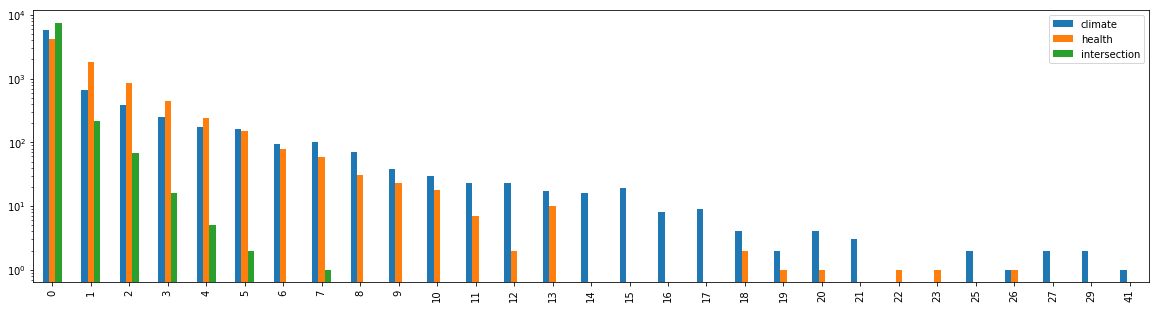

In [101]:
df_histogram_number_of_mentions = pd.DataFrame(data=histogram_number_of_mentions)
df_histogram_number_of_mentions.plot.bar(logy=True, figsize=(20,5))

### References per year: total, average, proportion, per WHO region

In [102]:
df_per_year = pd.DataFrame(data=per_year)
df_per_year

climate  health  intersection
1970        0      32             0
1971        0      47             0
1972        0      73             0
1973        1      67             0
1974        0      69             0
1975        0      52             0
1976        0      55             0
1977        2     102             0
1978        7      92             0
1979        2     123             0
1980        4     110             0
1981        2      97             0
1982        3      74             0
1983        1      80             0
1984        0     121             0
1985        0     157             0
1986        1     124             0
1987        1     129             0
1988       18     123             1
1989       69     127             3
1990       35     144             1
1991       65     107             3
1992       47     128             0
1993       29     130             2
1994       26     148             0
1995       51     159             4
1996       47     163             4
1997       66     116             0
1998       79     114             2
1999       56     194             5
2000       54     323             3
2001       78     265             9
2002       60     268             8
2003       62     299             5
2004       67     273             1
2005       81     284             4
2006      122     258            14
2007      883     252            38
2008      616     275            33
2009      984     259            42
2010      676     274            45
2011      537     235            27
2012      374     218            20
2013      382     392            21
2014      595     545            52
2015      681     268            34
2016      641     290            34
2017      696     237            25

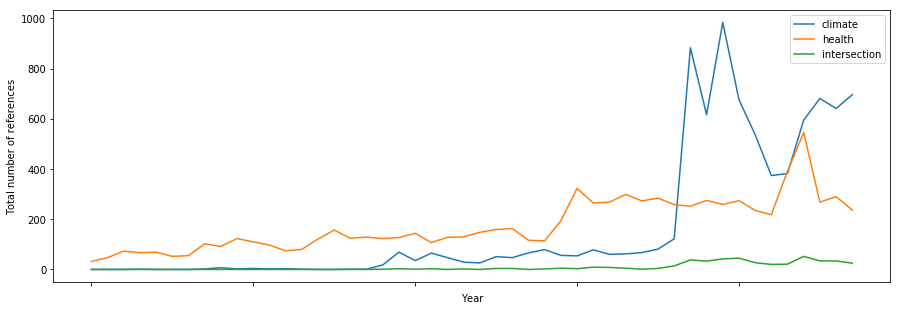

In [103]:
ax = df_per_year.plot.line(figsize=(15,5))
#ax.set_xticklabels(range(1970,2017))
ax.set_xlabel("Year")
ax.set_ylabel("Total number of references")
ax


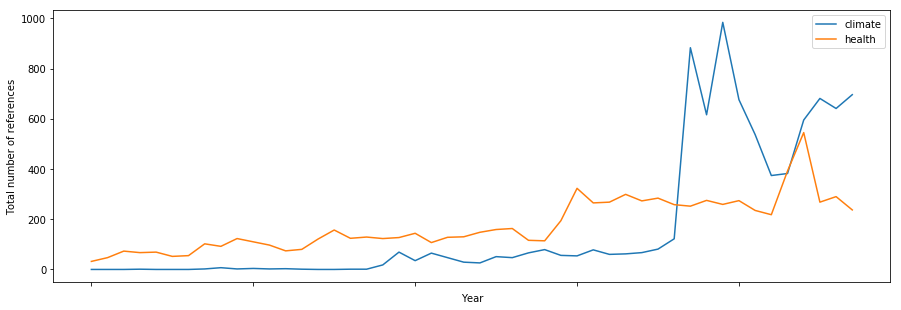

In [104]:
ax = df_per_year.filter(items=["climate","health"],axis=1).plot.line(figsize=(15,5))
#ax.set_xticklabels(range(1970,2017))
ax.set_xlabel("Year")
ax.set_ylabel("Total number of references")
ax

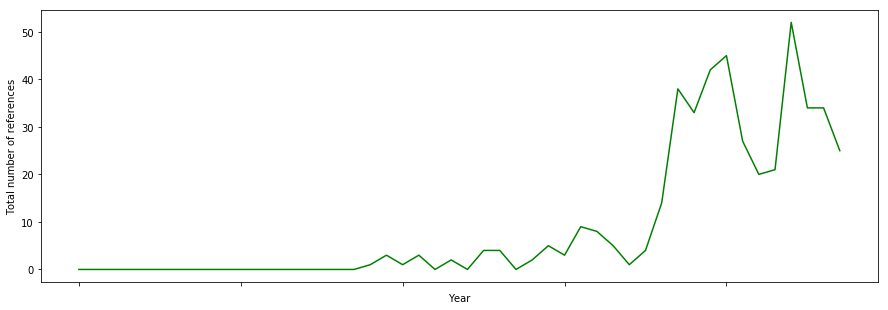

In [105]:
ax = df_per_year.filter(items=["intersection"],axis=1).plot.line(figsize=(15,5), color="green", legend=False)
#ax.set_xticklabels(range(1970,2017))
ax.set_xlabel("Year")
ax.set_ylabel("Total number of references")
ax

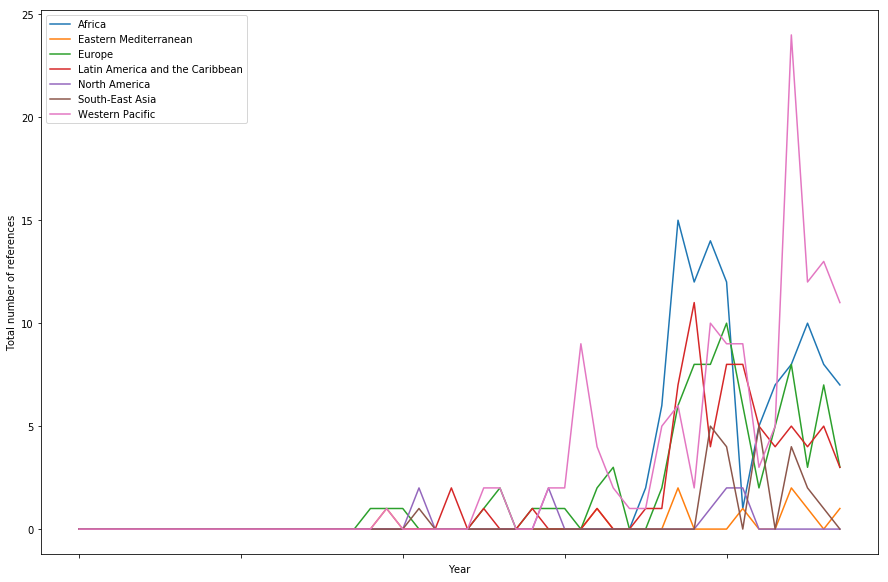

In [106]:
df_per_region_year_intersection = pd.DataFrame(data=per_region_year_intersection)
ax = df_per_region_year_intersection.plot.line(figsize=(15,10))
#ax.set_xticklabels(range(1970,2017))
ax.set_xlabel("Year")
ax.set_ylabel("Total number of references")
ax

In [107]:
df_average_per_year = pd.DataFrame(data=average_per_year)
df_average_per_year

climate    health  intersection
1970  0.000000  0.457143      0.000000
1971  0.000000  0.405172      0.000000
1972  0.000000  0.584000      0.000000
1973  0.008333  0.558333      0.000000
1974  0.000000  0.534884      0.000000
1975  0.000000  0.412698      0.000000
1976  0.000000  0.410448      0.000000
1977  0.014286  0.728571      0.000000
1978  0.049645  0.652482      0.000000
1979  0.013889  0.854167      0.000000
1980  0.026846  0.738255      0.000000
1981  0.013793  0.668966      0.000000
1982  0.020408  0.503401      0.000000
1983  0.006711  0.536913      0.000000
1984  0.000000  0.806667      0.000000
1985  0.000000  1.145985      0.000000
1986  0.006711  0.832215      0.000000
1987  0.006579  0.848684      0.000000
1988  0.116883  0.798701      0.006494
1989  0.450980  0.830065      0.019608
1990  0.224359  0.923077      0.006410
1991  0.401235  0.660494      0.018519
1992  0.281437  0.766467      0.000000
1993  0.165714  0.742857      0.011429
1994  0.146067  0.831461      0.000000
1995  0.296512  0.924419      0.023256
1996  0.259669  0.900552      0.022099
1997  0.375000  0.659091      0.000000
1998  0.436464  0.629834      0.011050
1999  0.309392  1.071823      0.027624
2000  0.303371  1.814607      0.016854
2001  0.412698  1.402116      0.047619
2002  0.319149  1.425532      0.042553
2003  0.328042  1.582011      0.026455
2004  0.348958  1.421875      0.005208
2005  0.437838  1.535135      0.021622
2006  0.632124  1.336788      0.072539
2007  4.623037  1.319372      0.198953
2008  3.208333  1.432292      0.171875
2009  5.098446  1.341969      0.217617
2010  3.576720  1.449735      0.238095
2011  2.768041  1.211340      0.139175
2012  1.917949  1.117949      0.102564
2013  1.979275  2.031088      0.108808
2014  3.067010  2.809278      0.268041
2015  3.528497  1.388601      0.176166
2016  3.304124  1.494845      0.175258
2017  3.551020  1.209184      0.127551

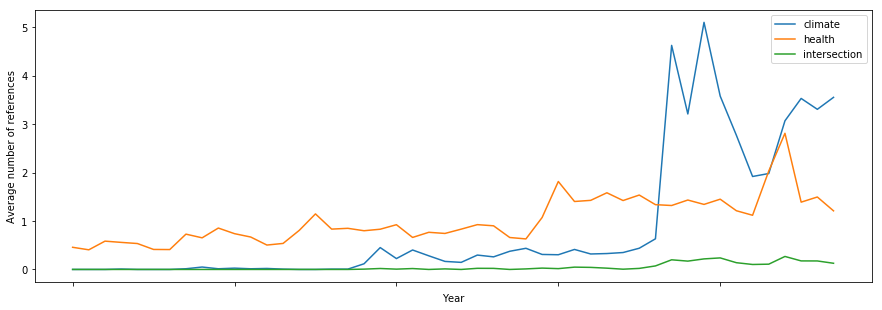

In [108]:
ax = df_average_per_year.plot.line(figsize=(15,5))
#ax.set_xticklabels(range(1970,2017))
ax.set_xlabel("Year")
ax.set_ylabel("Average number of references")
ax

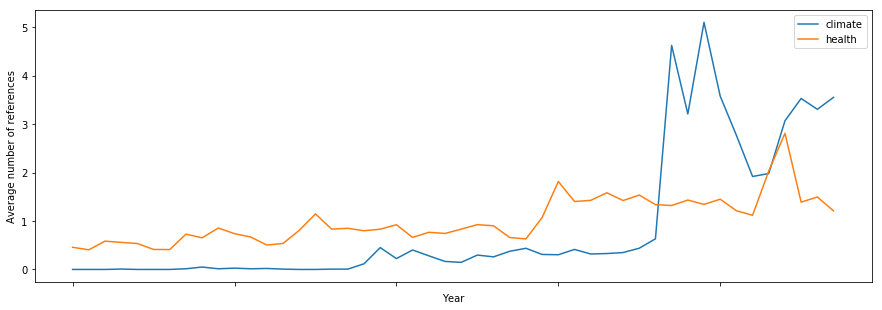

In [109]:
ax = df_average_per_year.filter(items=["climate","health"],axis=1).plot.line(figsize=(15,5))
#ax.set_xticklabels(range(1970,2017))
ax.set_xlabel("Year")
ax.set_ylabel("Average number of references")
ax

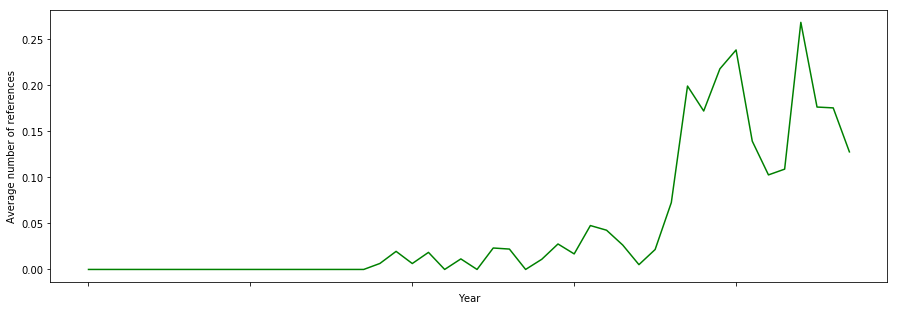

In [110]:
ax = df_average_per_year.filter(items=["intersection"],axis=1).plot.line(figsize=(15,5), color="green", legend=False)
#ax.set_xticklabels(range(1970,2017))
ax.set_xlabel("Year")
ax.set_ylabel("Average number of references")
ax

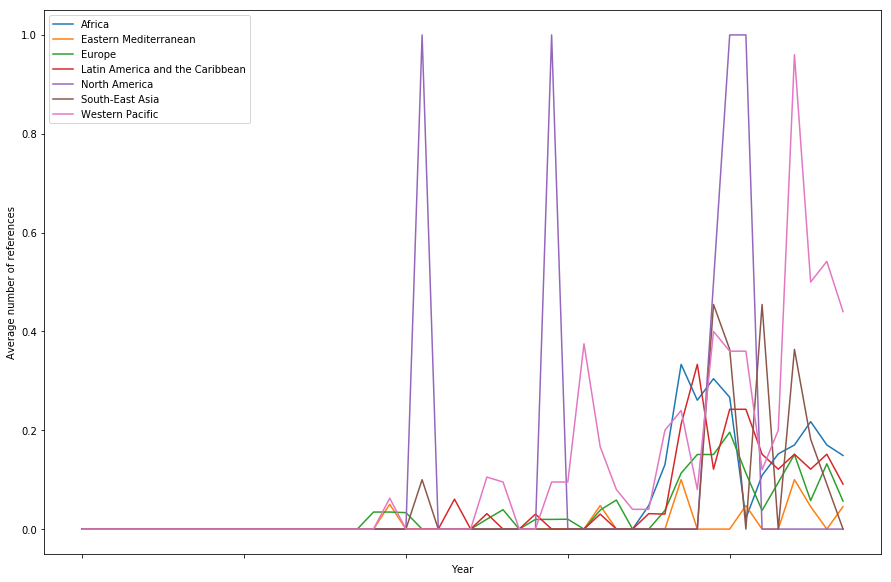

In [111]:
df_average_per_region_year_intersection = pd.DataFrame(data=average_per_region_year_intersection)
ax = df_average_per_region_year_intersection.plot.line(figsize=(15,10))
#ax.set_xticklabels(range(1970,2017))
ax.set_xlabel("Year")
ax.set_ylabel("Average number of references")
ax

In [112]:
df_proportion_per_year = pd.DataFrame(data=proportion_per_year)
df_proportion_per_year

climate     health  intersection
1970   0.000000  31.428571      0.000000
1971   0.000000  29.310345      0.000000
1972   0.000000  38.400000      0.000000
1973   0.833333  33.333333      0.000000
1974   0.000000  34.883721      0.000000
1975   0.000000  23.809524      0.000000
1976   0.000000  27.611940      0.000000
1977   1.428571  42.142857      0.000000
1978   2.836879  35.460993      0.000000
1979   1.388889  40.972222      0.000000
1980   2.684564  42.281879      0.000000
1981   1.379310  36.551724      0.000000
1982   1.360544  34.013605      0.000000
1983   0.671141  32.214765      0.000000
1984   0.000000  42.666667      0.000000
1985   0.000000  57.664234      0.000000
1986   0.671141  42.953020      0.000000
1987   0.657895  43.421053      0.000000
1988  10.389610  41.558442      0.649351
1989  21.568627  45.098039      1.960784
1990  14.102564  45.512821      0.641026
1991  18.518519  37.654321      1.234568
1992  16.766467  41.916168      0.000000
1993  10.285714  41.714286      0.571429
1994   6.179775  47.191011      0.000000
1995  12.209302  51.162791      2.325581
1996  13.259669  48.066298      1.104972
1997  17.613636  40.909091      0.000000
1998  16.022099  38.674033      1.104972
1999  10.497238  47.513812      1.657459
2000  18.539326  65.168539      1.123596
2001  16.931217  53.968254      1.587302
2002  15.957447  57.446809      4.255319
2003  12.698413  56.084656      2.116402
2004  14.583333  59.375000      0.520833
2005  17.297297  58.918919      1.621622
2006  18.652850  57.512953      4.145078
2007  84.293194  47.643979     13.612565
2008  81.770833  54.687500     12.500000
2009  89.119171  53.367876     14.507772
2010  80.952381  53.439153     15.873016
2011  70.618557  52.577320      9.278351
2012  56.410256  46.666667      7.179487
2013  51.813472  63.730570      8.290155
2014  69.072165  71.649485     19.072165
2015  76.165803  52.331606     12.435233
2016  79.896907  56.185567     13.917526
2017  81.122449  48.979592      9.183673

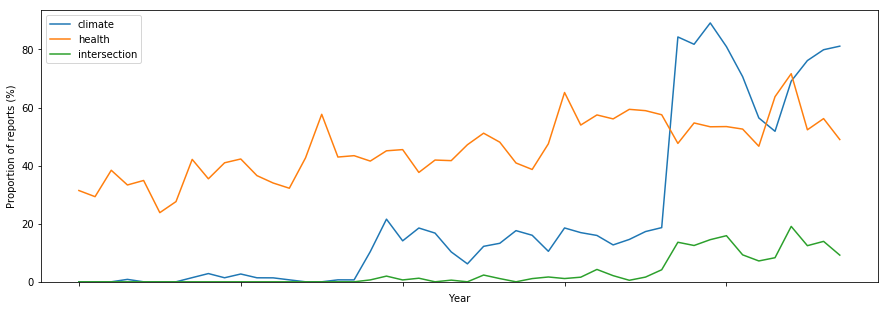

In [113]:
ax = df_proportion_per_year.plot.line(figsize=(15,5))
#ax.set_xticklabels(range(1970,2017))
ax.set_xlabel("Year")
ax.set_ylabel("Proportion of reports (%)")
ax.set_ylim(ymin=0)
ax

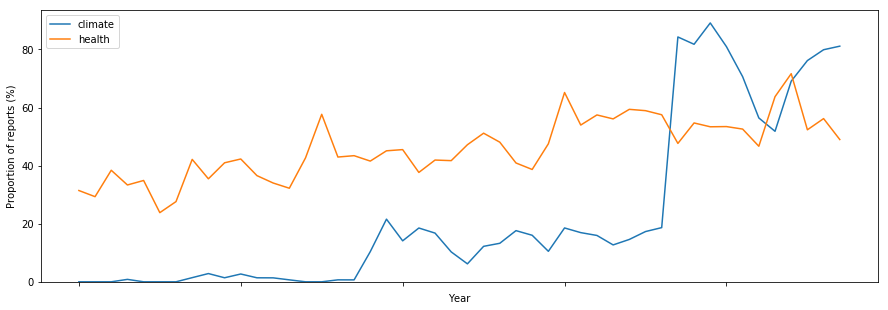

In [114]:
ax = df_proportion_per_year.filter(items=["climate","health"],axis=1).plot.line(figsize=(15,5))
#ax.set_xticklabels(range(1970,2017))
ax.set_xlabel("Year")
ax.set_ylabel("Proportion of reports (%)")
ax.set_ylim(ymin=0)
ax

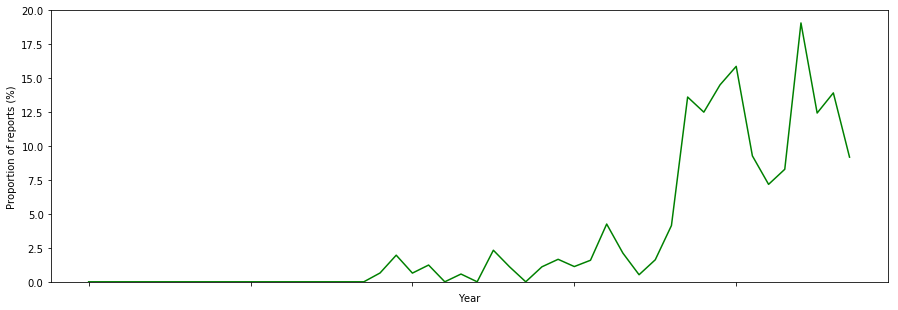

In [115]:
ax = df_proportion_per_year.filter(items=["intersection"],axis=1).plot.line(figsize=(15,5), color="green", legend=False)
#ax.set_xticklabels(range(1970,2017))
ax.set_xlabel("Year")
ax.set_ylabel("Proportion of reports (%)")
ax.set_ylim(ymin=0)
ax

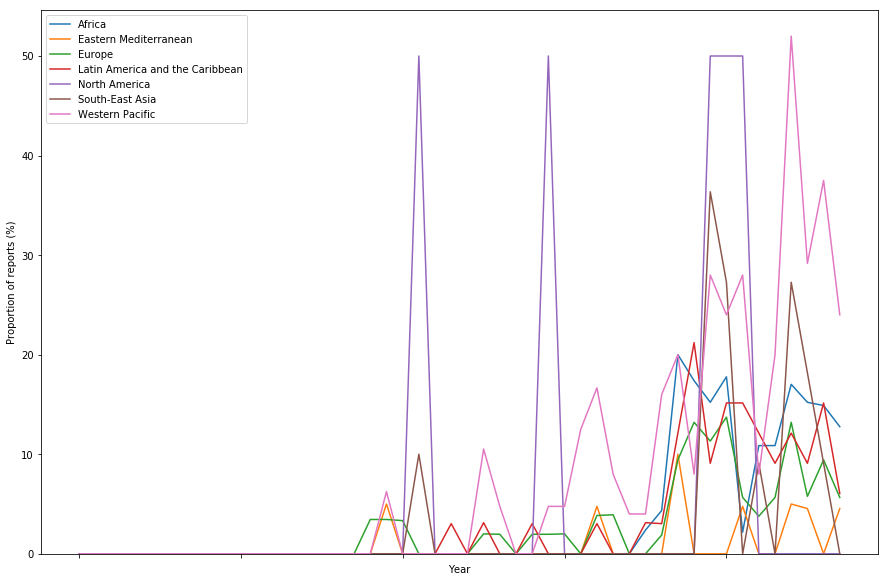

In [116]:
df_proportion_per_region_year_intersection = pd.DataFrame(data=proportion_per_region_year_intersection)
ax = df_proportion_per_region_year_intersection.plot.line(figsize=(15,10))
#ax.set_xticklabels(range(1970,2017))
ax.set_xlabel("Year")
ax.set_ylabel("Proportion of reports (%)")
ax.set_ylim(ymin=0)
ax

### References per country: total

In [117]:
df_per_country = pd.DataFrame(data=per_country)
df_per_country.loc[(df_per_country['climate'] > 0) | (df_per_country['health'] > 0)]


climate  health  intersection
Afghanistan                              3      33             0
Albania                                 16      16             1
Algeria                                 16      21             0
Andorra                                 55      34             2
Angola                                  24      35             0
Antigua and Barbuda                    107      67             6
Argentina                               16      33             0
Armenia                                  3       2             0
Australia                               69      50             6
Austria                                 35      16             2
Azerbaijan                               2       4             0
Bahamas                                 71      58             1
Bahrain                                 28      37             3
Bangladesh                              78     115             8
Barbados                                78      95             2
Belarus                                 31      34             0
Belgium                                 13      33             1
Belize                                  93      57             7
Benin                                   29      56             3
Bhutan                                  54      40             1
Bolivia, Plurinational State of         31      41             0
Bosnia and Herzegovina                  23      11             3
Botswana                                51      85             7
Brazil                                  51      34             1
Brunei Darussalam                       10      24             2
Bulgaria                                20      23             2
Burkina Faso                            29      59             0
Burundi                                 17     116             0
CSK                                      1       8             0
Cabo Verde                              62      40             4
...                                    ...     ...           ...
Swaziland                               35     108             6
Sweden                                  48      39             2
Switzerland                             30       8             3
Syrian Arab Republic                     4      13             0
Tajikistan                              62      15             1
Tanzania, United Republic of            32      75             1
Thailand                                34      65             2
Timor-Leste                             19      35             0
Togo                                    22      94             3
Tonga                                   79      27             1
Trinidad and Tobago                     78      82             6
Tunisia                                 26      18             0
Turkey                                  15      25             5
Turkmenistan                            22      12             0
Tuvalu                                 250      39            13
Uganda                                  18      56             4
Ukraine                                 16      37             3
United Arab Emirates                    16      19             0
United Kingdom                          64      42             3
United States                           25     130             5
Uruguay                                 24      75             0
Uzbekistan                               3      10             0
Vanuatu                                120      46             8
Venezuela, Bolivarian Republic of       17      50             0
Viet Nam                                28      14             1
YDYE                                     0       7             0
YUG                                     31      12             3
Yemen                                    9      25             0
Zambia                                  65      98             6
Zimbabwe                                23      56             0

[199

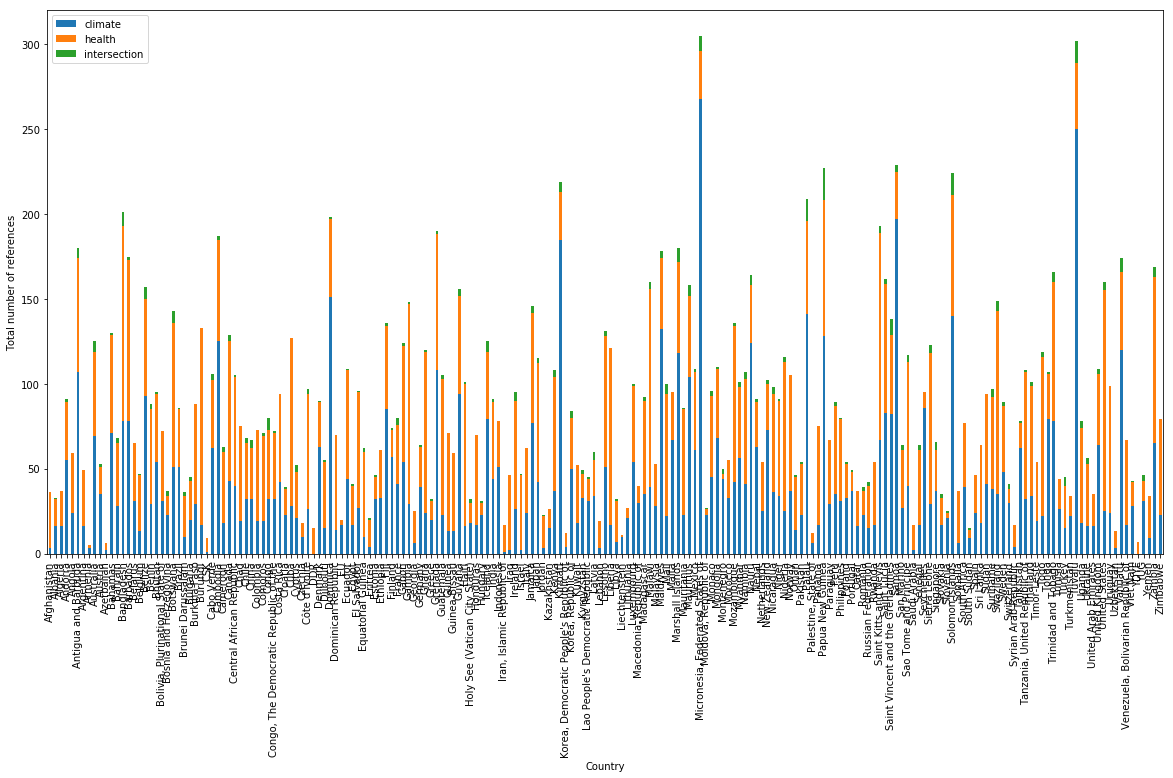

In [118]:
ax = df_per_country.loc[(df_per_country['climate'] > 0) | (df_per_country['health'] > 0)].plot.bar(stacked=True,figsize=(20,10))
ax.set_xlabel("Country")
ax.set_ylabel("Total number of references")
ax

### References per WHO region: total

In [119]:
df_per_region = pd.DataFrame(data=per_region)
df_per_region

climate  health  intersection
Africa                              1496    2933           107
Eastern Mediterranean                293     569             9
Europe                              1559    1180            82
Latin America and the Caribbean     1706    2035            71
North America                         68     212             9
South-East Asia                      553     491            22
Western Pacific                     2459     995           135

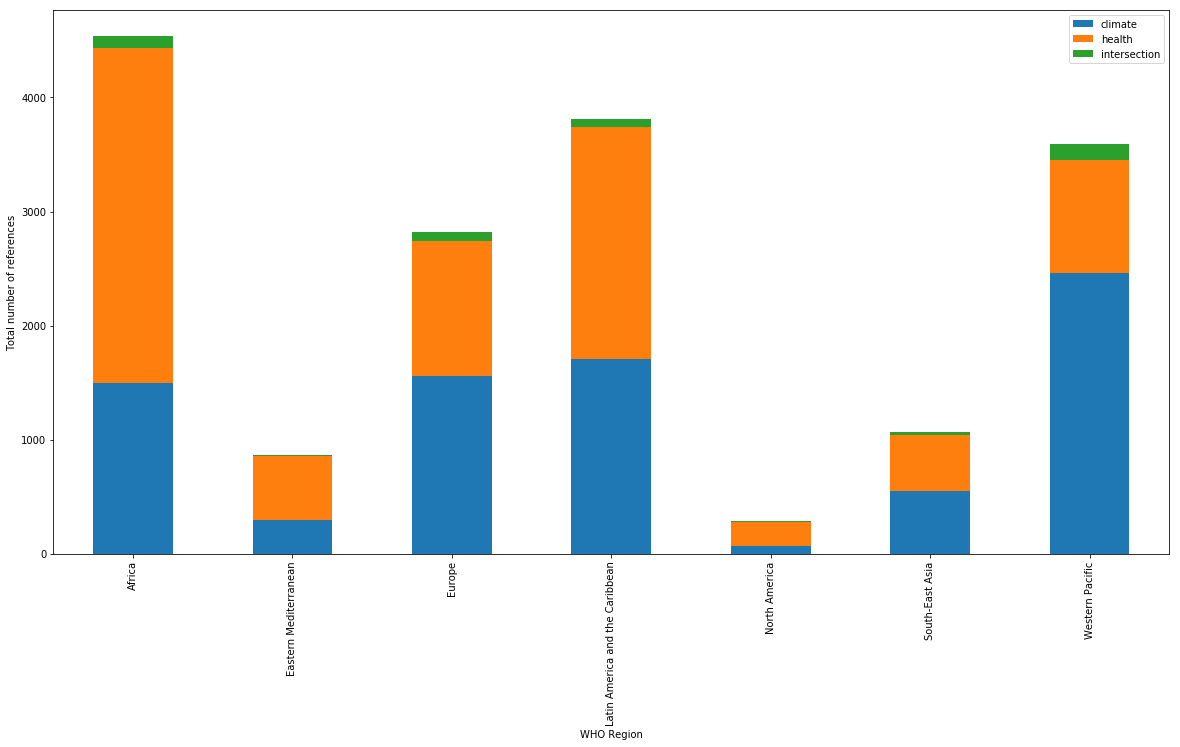

In [120]:
ax = df_per_region.plot.bar(stacked=True,figsize=(20,10))
ax.set_xlabel("WHO Region")
ax.set_ylabel("Total number of references")
ax

### References per country in 2017: total, average, proportion

Download shapefiles ne_110m_admin_0_countries.* from [here](https://github.com/nvkelso/natural-earth-vector/tree/master/110m_cultural)

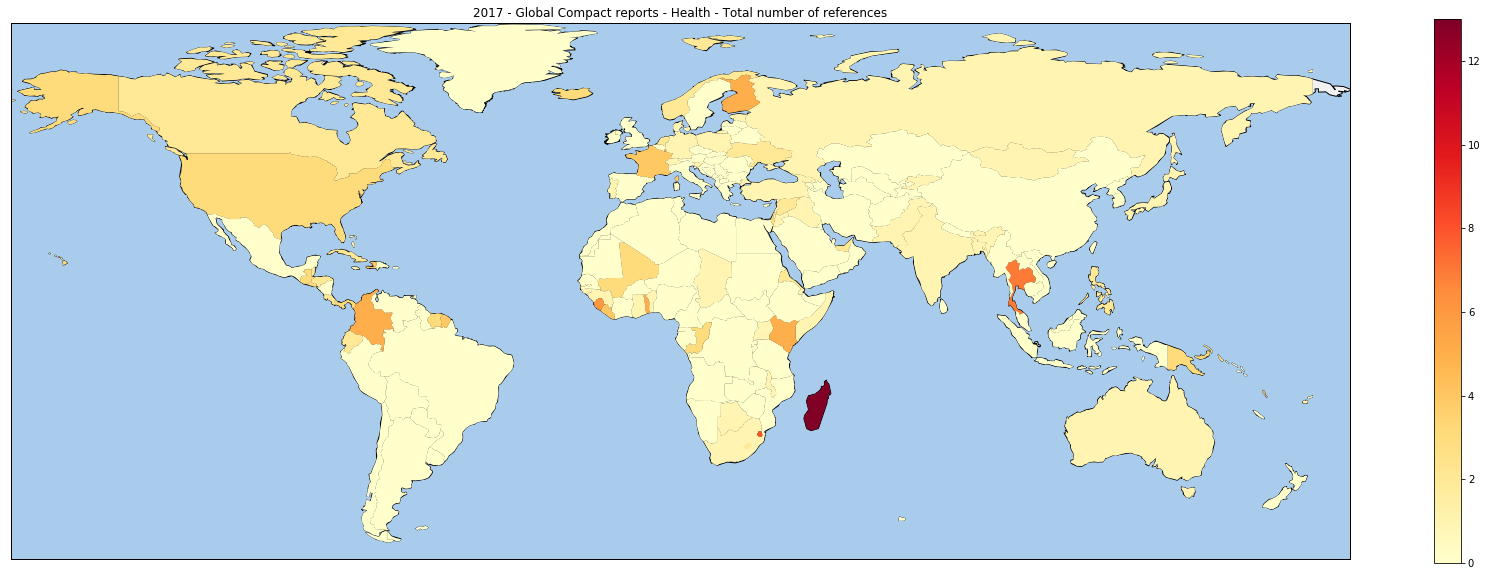

In [121]:
import matplotlib.pyplot as plt
import matplotlib.cm
import numpy as np

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

def create_map(per_country_counts, title, resolution='c'):

    mapped_country_names = {'Bosnia and Herzegovina' : 'Bosnia and Herz.',  
                            'Congo, The Democratic Republic of the' : 'Dem. Rep. Congo', 
                            'Dominican Republic' : 'Dominican Rep.', 'Iran, Islamic Republic of' : 'Iran', 
                            'Macedonia, Republic of' : 'Macedonia', 'Moldova, Republic of' : 'Moldova', 
                            'Palestine, State of' : 'Palestine', 'Russian Federation' : 'Russia', 
                            'South Sudan' : 'S. Sudan', 'Korea, Republic of' : 'South Korea' , 
                            'Syrian Arab Republic' : 'Syria',  'United States' : 'United States of America',
                            'Viet Nam' : 'Vietnam'}

    per_normalised_country_counts = []
    for country, count in per_country_counts.items():
        if country in mapped_country_names:
            per_normalised_country_counts.append((mapped_country_names[country], count))
        else:
            per_normalised_country_counts.append((country, count))
    df_per_normalised_country_counts = pd.DataFrame(per_normalised_country_counts, columns=["country", "count"])

    fig, ax = plt.subplots(figsize=(30,20))
    plt.title(title)

    m = Basemap(resolution=resolution, # c, l, i, h, f or None
                projection='cyl',
                lat_0=0, lon_0=0,
                llcrnrlon=-170, llcrnrlat=-60, urcrnrlon=190, urcrnrlat=84)

    m.drawmapboundary(fill_color='#aaccec')
    m.fillcontinents(color='#f2f2f2',lake_color='#aaccec')
    m.drawcoastlines()
    m.readshapefile("ne_110m_admin_0_countries", "countries")
    shapename_regex = re.compile(r'(?<=^)[\w \.\']+')

    df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.countries],
        'country': [shapename_regex.search(area['NAME'])[0] for area in m.countries_info]
    })
    df_poly = df_poly.merge(df_per_normalised_country_counts, on='country', how='left', validate="many_to_one")

    cmap = plt.get_cmap('YlOrRd')   
    pc = PatchCollection(df_poly.shapes, zorder=2)
    norm = Normalize()
 
    pc.set_facecolor(cmap(norm(df_poly['count'].fillna(0).values)))
    ax.add_collection(pc)

    mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
    mapper.set_array(df_poly['count'])

    plt.colorbar(mapper, shrink=0.5)


create_map(per_country_focusyear["health"], "2017 - Global Compact reports - Health - Total number of references")

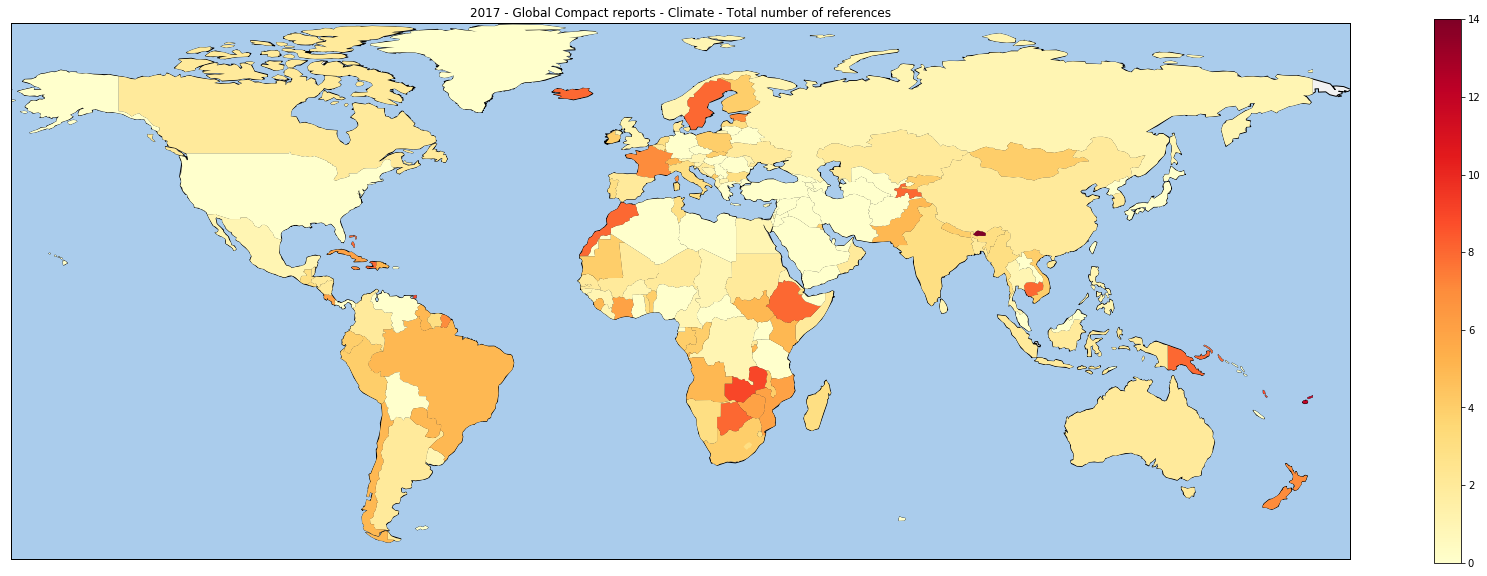

In [122]:
create_map(per_country_focusyear["climate"], "2017 - Global Compact reports - Climate - Total number of references")

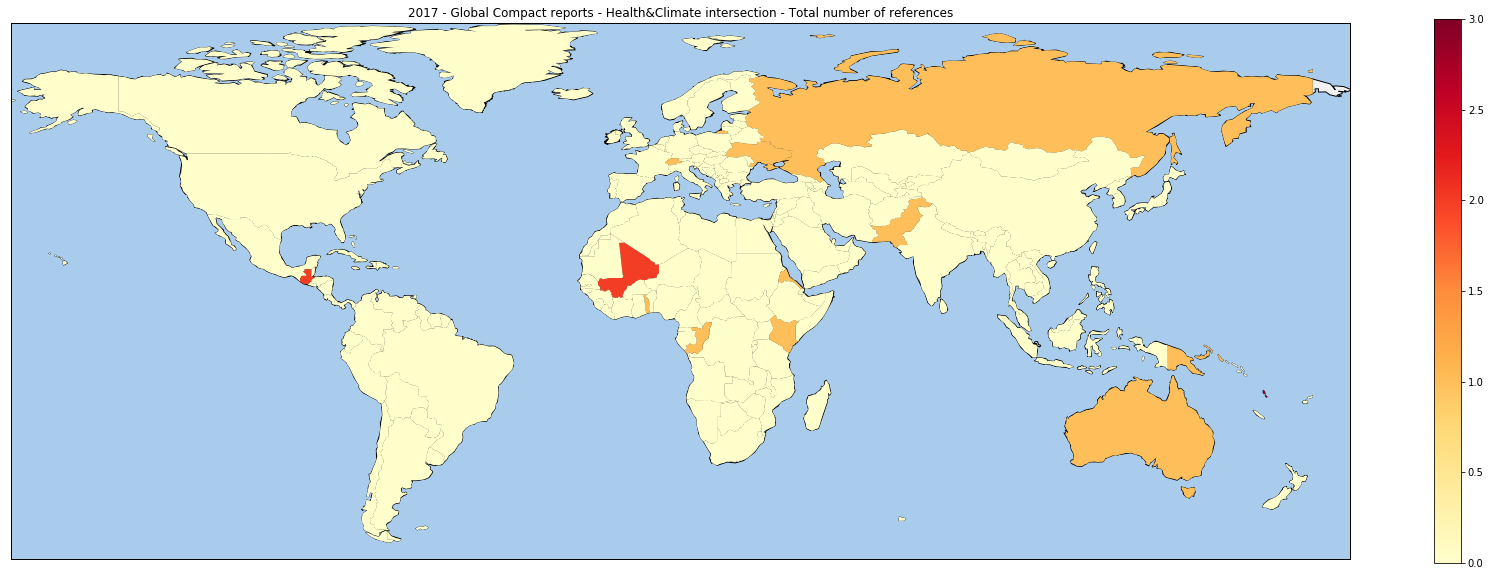

In [123]:
create_map(per_country_focusyear["intersection"], "2017 - Global Compact reports - Health&Climate intersection - Total number of references")


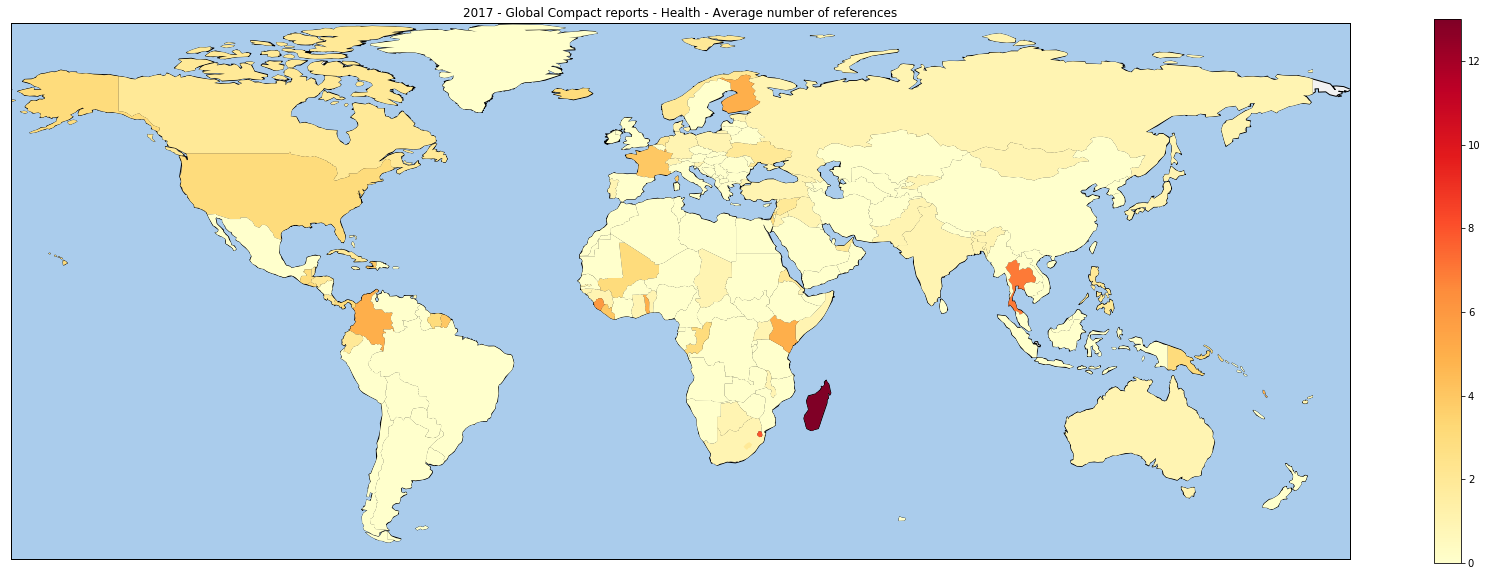

In [124]:
create_map(average_per_country_focusyear["health"], "2017 - Global Compact reports - Health - Average number of references")

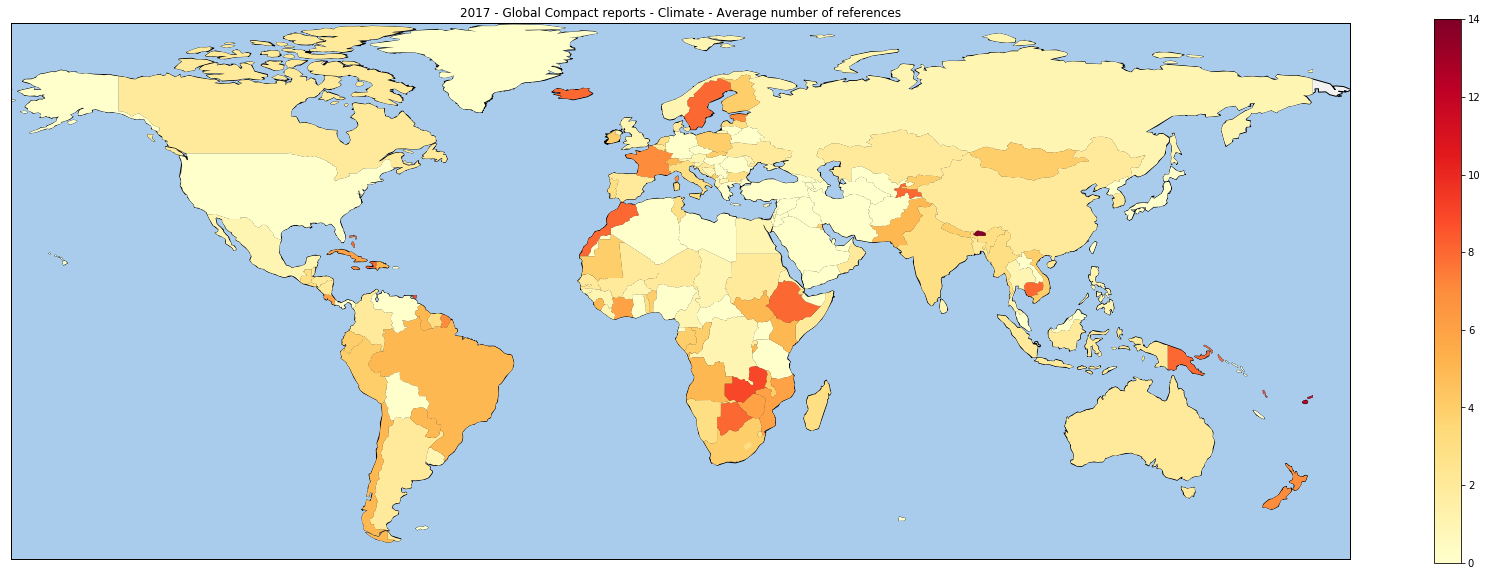

In [125]:
create_map(average_per_country_focusyear["climate"], "2017 - Global Compact reports - Climate - Average number of references")

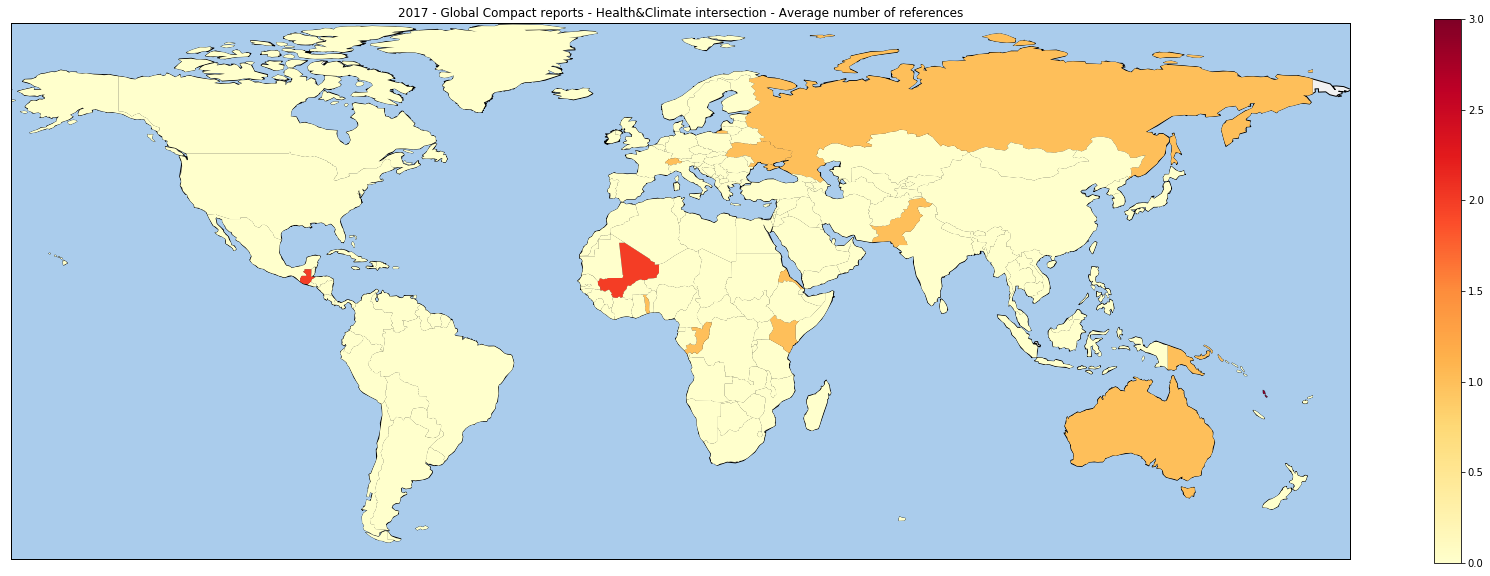

In [126]:
create_map(average_per_country_focusyear["intersection"], "2017 - Global Compact reports - Health&Climate intersection - Average number of references")

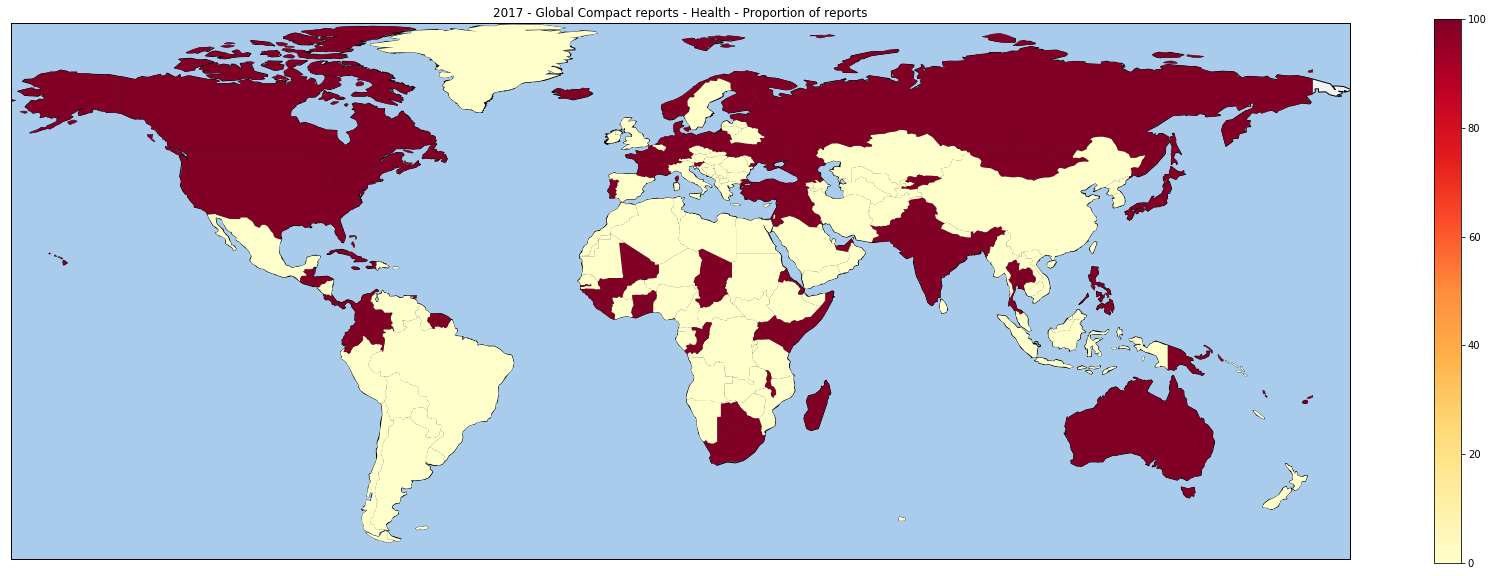

In [127]:
create_map(proportion_per_country_focusyear["health"], "2017 - Global Compact reports - Health - Proportion of reports")

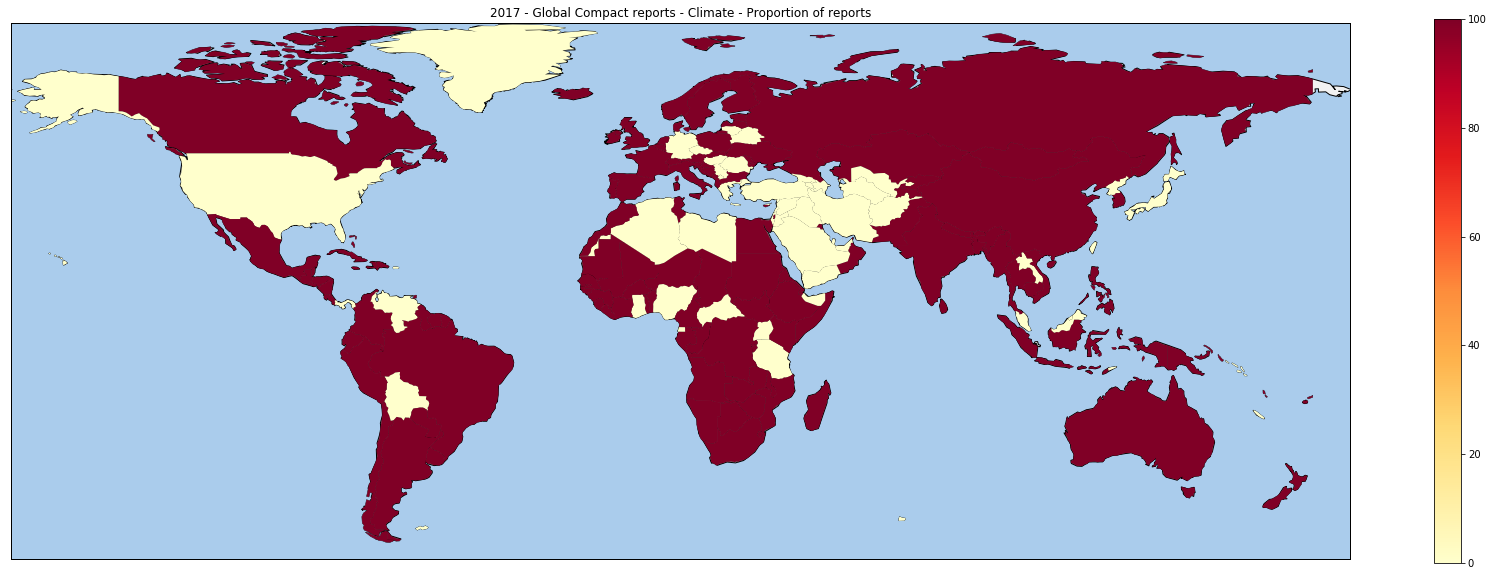

In [128]:
create_map(proportion_per_country_focusyear["climate"], "2017 - Global Compact reports - Climate - Proportion of reports")

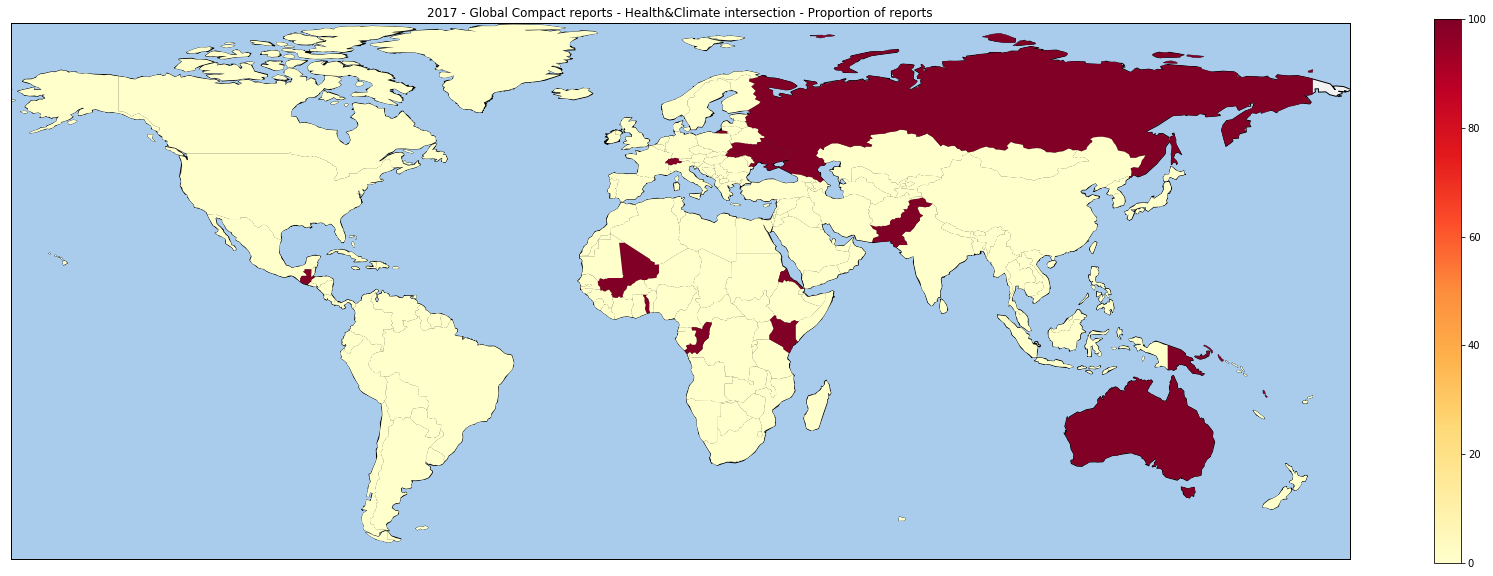

In [129]:
create_map(proportion_per_country_focusyear["intersection"], "2017 - Global Compact reports - Health&Climate intersection - Proportion of reports")

### Frenquency of keywords: health and climate

In [130]:
df_health_keywords = pd.DataFrame(sorted(global_count_health_keywords.items(), key=lambda k: k[1], reverse=True), columns=["Keyword", "Number of mentions"])
df_health_keywords

Keyword  Number of mentions
0                 health                3233
1                disease                1605
2            health_care                 714
3           malnutrition                 543
4                malaria                 523
5              mortality                 439
6               pandemic                 408
7               epidemic                 265
8              nutrition                 195
9          public_health                 187
10            infectious                 122
11               illness                  76
12             infection                  45
13                  sars                  25
14         air_pollution                  23
15             morbidity                  17
16             diarrhoea                  15
17               measles                  12
18             pneumonia                   6
19              stunting                   6
20            healthcare                   6
21  communicable_disease                   5
22          epidemiology                   2

In [131]:
df_climate_keywords = pd.DataFrame(sorted(global_count_climate_keywords.items(), key=lambda k: k[1], reverse=True), columns=["Keyword", "Number of mentions"])
df_climate_keywords

Keyword  Number of mentions
0       climate_change                6355
1           greenhouse                 592
2       global_warming                 586
3     renewable_energy                 364
4          temperature                 141
5           low_carbon                  87
6      extreme_weather                  60
7  climate_variability                   9
8      carbon_emission                   7

### Word clouds: health, climate, intersection

Up to 200 most frequent words that appear in the context of our health or climate keywords or both

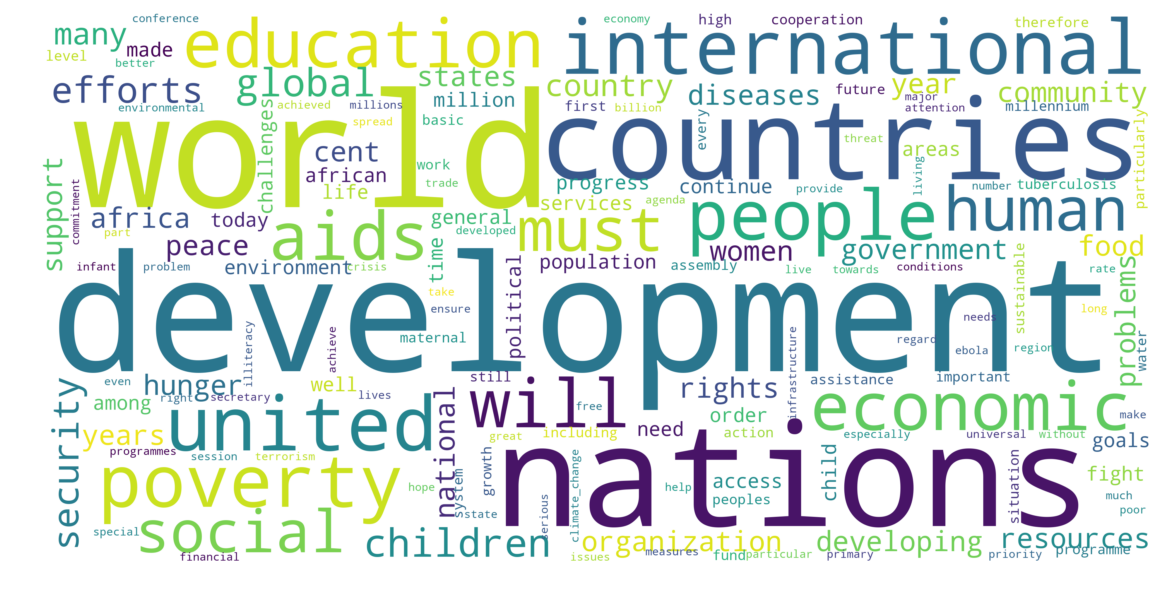

In [132]:
import collections
from wordcloud import WordCloud, STOPWORDS

threshold = 200

def create_wordcloud(contexts, stopwords=[]):
    most_frequent_words = {}
    stopwords = stopwords + list(STOPWORDS)

    context_unigrams = collections.Counter(contexts)
    for word, freq in sorted(context_unigrams.items(), key=lambda k: k[1], reverse=True)[0:threshold]:
        if word not in stopwords:
            most_frequent_words[word] = freq

    wordcloud = WordCloud(background_color="white", scale=10).generate_from_frequencies(most_frequent_words)

    fig = plt.figure(1, figsize=(20, 12))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()
    

create_wordcloud(global_health_contexts, health_dict)

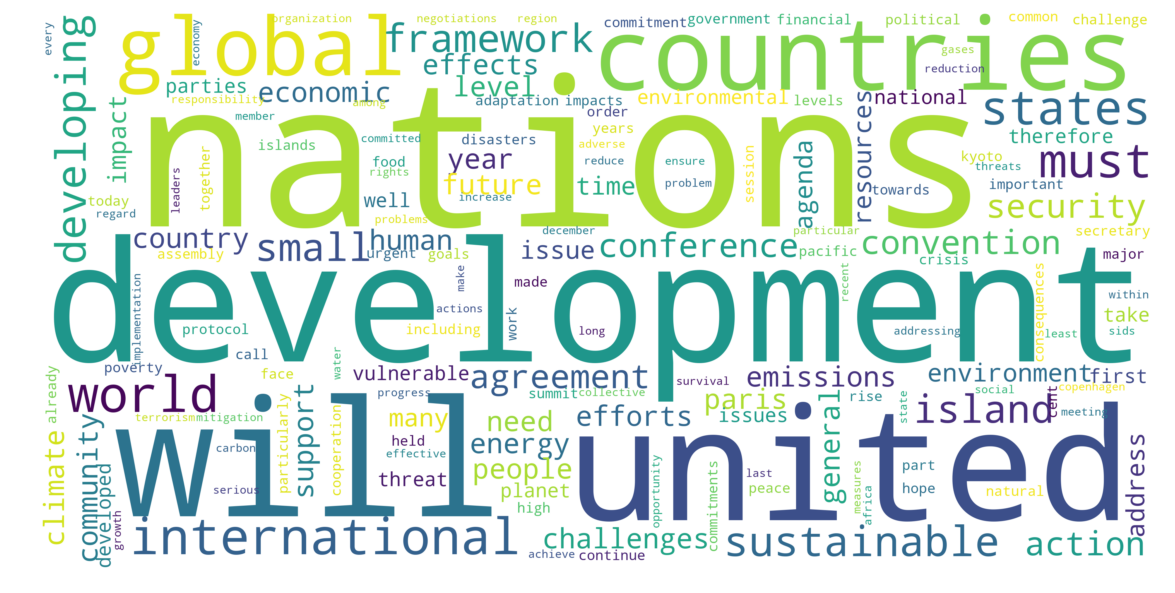

In [133]:
create_wordcloud(global_climate_contexts, climate_dict)

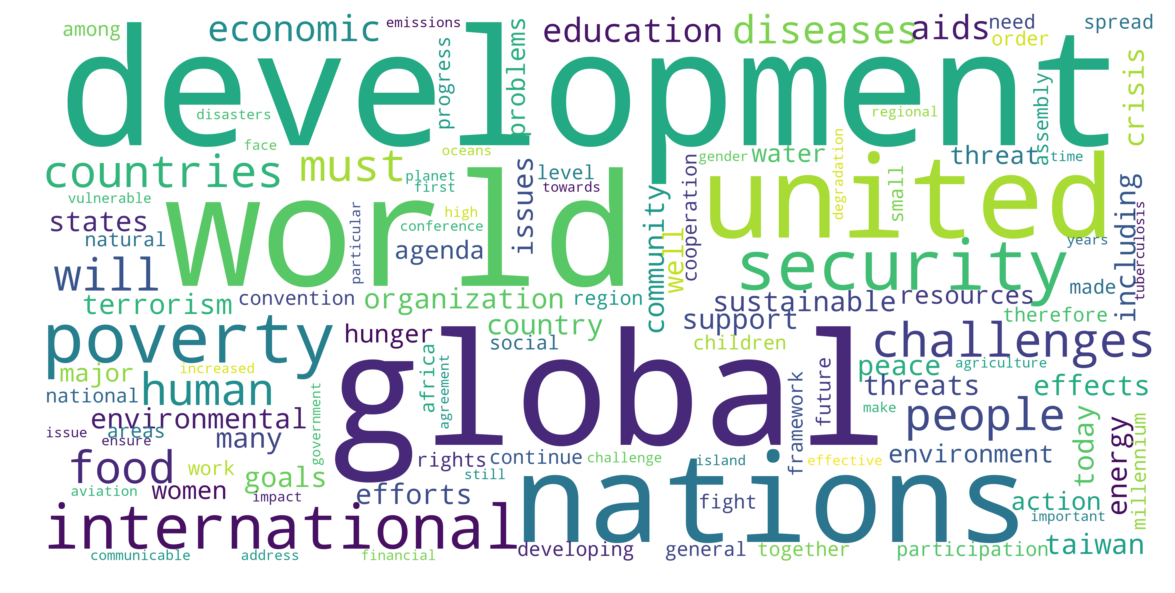

In [134]:
create_wordcloud(global_intersection_contexts, climate_dict + health_dict)

### Network graphs: intersection
Blue nodes are health keywords and green nodes are climate keywords. The closer the nodes are to each other, the more often the words co-occur. The graph only shows links between words that co-occurred more than once in the whole corpus.

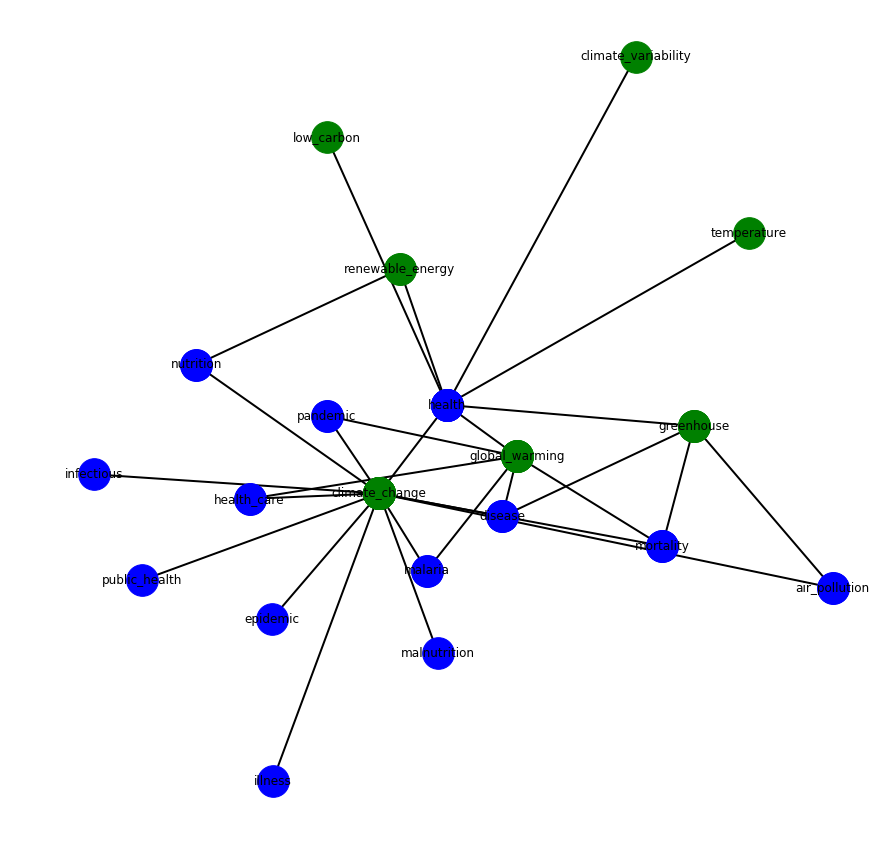

In [135]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

G = nx.Graph()

health_nodes = []
climate_nodes = []

for word1 in cooccurrence_matrix.keys():
    for word2 in cooccurrence_matrix[word1].keys():
        if cooccurrence_matrix[word1][word2] > 1:
            G.add_edge(word1, word2, weight=cooccurrence_matrix[word1][word2])
            health_nodes.append(word1)
            climate_nodes.append(word2)

plt.figure(figsize=(15,15))

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=health_nodes, node_size=1000, node_color='b')
nx.draw_networkx_nodes(G, pos, nodelist=climate_nodes, node_size=1000, node_color='g')
nx.draw_networkx_edges(G, pos, edgelist=G.edges(data=True), width=2)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
#edge_labels = nx.get_edge_attributes(G,'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

---
## Word2Vec experiment

I've trained a model on the whole of the UNGD corpus and generated the word embeddings using gensim's word2vec.
The similarity/distance between words based on their embeddings ended up not making much sense as a way to identify the relationship between health and climate topics/keywords. The model was useful though as a way to extend the list of health and climate keywords with other words that were found to be similar to the original ones.

#### Train Word2Vec model from the whole of UNGD corpus

In [ ]:
import gensim
from nltk.tokenize import sent_tokenize, word_tokenize, MWETokenizer

MWEtokenizer = MWETokenizer(compound_terms)

corpus = '../data/ungd/full_corpus.txt'
model_file = '../data/ungd/ungd_word2vec.model'

txtFileObj = open(corpus, 'r')

tokenised_sentences = [word_tokenize(sentence) for sentence in sent_tokenize(txtFileObj.read().lower())]
compound_tokenised_sentences =  [MWEtokenizer.tokenize(wordlist) for wordlist in tokenised_sentences]

model = gensim.models.Word2Vec(compound_tokenised_sentences, min_count=2)
model_file = '../data/un/ungd_word2vec.model'
model.save(model_file)

#### Load previously-trained Word2Vec model

In [136]:
model_file = '../data/ungd/ungd_word2vec.model'
model = gensim.models.Word2Vec.load(model_file)

In [137]:
model.wv.distance('malaria', 'measles')

0.4381895723182161

In [138]:
distances_health = {}

for word1 in health_dict:
    distances_health[word1] = {}
    for word2 in health_dict:
        try:
            distances_health[word1][word2] = model.wv.distance(word1, word2)
        except:
            pass

df_distances_health = pd.DataFrame(data=distances_health)
df_distances_health

air_pollution  communicable_disease  diarrhoea  \
air_pollution              1.110223e-16                   NaN   0.464605   
diarrhoea                  4.646048e-01                   NaN   0.000000   
disease                    5.383973e-01                   NaN   0.312476   
epidemic                   5.962947e-01                   NaN   0.445597   
epidemiology               9.369701e-01                   NaN   0.934163   
health                     7.906819e-01                   NaN   0.675777   
health_care                7.054794e-01                   NaN   0.667927   
healthcare                 7.756007e-01                   NaN   0.649029   
illness                    5.337002e-01                   NaN   0.295369   
infection                  6.688068e-01                   NaN   0.495042   
infectious                 4.009264e-01                   NaN   0.228702   
malaria                    5.844931e-01                   NaN   0.224303   
malnutrition               5.338495e-01                   NaN   0.314058   
measles                    5.192299e-01                   NaN   0.305953   
morbidity                  6.147021e-01                   NaN   0.415090   
mortality                  7.209416e-01                   NaN   0.540820   
ncd                        7.682351e-01                   NaN   0.910350   
non-communicable_disease   6.753132e-01                   NaN   0.537606   
nutrition                  6.456339e-01                   NaN   0.637992   
pandemic                   6.008986e-01                   NaN   0.453699   
pneumonia                  6.863924e-01                   NaN   0.278380   
public_health              5.921331e-01                   NaN   0.648273   
sars                       5.217202e-01                   NaN   0.379655   
stunting                   6.660316e-01                   NaN   0.467663   

                           disease  epidemic  epidemiology        health  \
air_pollution             0.538397  0.596295  9.369701e-01  7.906819e-01   
diarrhoea                 0.312476  0.445597  9.341630e-01  6.757772e-01   
disease                   0.000000  0.317529  9.936304e-01  6.299099e-01   
epidemic                  0.317529  0.000000  1.018119e+00  8.197529e-01   
epidemiology              0.993630  1.018119  2.220446e-16  6.929460e-01   
health                    0.629910  0.819753  6.929460e-01 -2.220446e-16   
health_care               0.582130  0.876482  6.699775e-01  2.587143e-01   
healthcare                0.868463  0.944735  8.212843e-01  7.375798e-01   
illness                   0.152064  0.292543  9.544256e-01  7.051077e-01   
infection                 0.521682  0.488212  8.359218e-01  6.753357e-01   
infectious                0.270805  0.274727  9.547961e-01  6.327371e-01   
malaria                   0.252609  0.399972  9.431138e-01  5.555433e-01   
malnutrition              0.135623  0.450456  8.662203e-01  4.923967e-01   
measles                   0.472972  0.548917  9.210096e-01  8.381211e-01   
morbidity                 0.457727  0.500067  8.670945e-01  6.336195e-01   
mortality                 0.533874  0.602053  6.894856e-01  5.301049e-01   
ncd                       0.975691  0.815243  8.004506e-01  8.979222e-01   
non-communicable_disease  0.732696  0.751077  7.720842e-01  8.243463e-01   
nutrition                 0.544294  0.749472  6.563026e-01  2.891485e-01   
pandemic                  0.287652  0.129780  1.022189e+00  7.121814e-01   
pneumonia                 0.564173  0.657876  9.228335e-01  8.588555e-01   
public_health             0.585265  0.687382  6.898661e-01  2.724797e-01   
sars                      0.454439  0.351253  9.423196e-01  8.367348e-01   
stunting                  0.748004  0.731580  8.741017e-01  9.948307e-01   

                          health_care  healthcare       illness    ...     \
air_pollution                0.705479    0.775601  5.337002e-01    ...      
diarrhoea                    0.667927    0.649029  2.953693e-01    ...

In [139]:
distances_climate = {}

for word1 in climate_dict:
    distances_climate[word1] = {}
    for word2 in climate_dict:
        try:
            distances_climate[word1][word2] = model.wv.distance(word1, word2)
        except:
            pass

df_distances_climate = pd.DataFrame(data=distances_climate)
df_distances_climate

carbon_emission  climate_change  climate_pollutant  \
carbon_emission         2.220446e-16    8.795947e-01                NaN   
climate_change          8.795947e-01   -2.220446e-16                NaN   
climate_variability     8.111428e-01    6.581460e-01                NaN   
extreme_weather         8.232387e-01    6.770949e-01                NaN   
global_warming          6.950366e-01    2.417262e-01                NaN   
greenhouse              4.537448e-01    5.979819e-01                NaN   
low_carbon              8.232356e-01    9.169004e-01                NaN   
renewable_energy        8.313741e-01    7.357337e-01                NaN   
temperature             5.867285e-01    7.284044e-01                NaN   

                     climate_variability  co2_emission  extreme_weather  ghge  \
carbon_emission             8.111428e-01           NaN         0.823239   NaN   
climate_change              6.581460e-01           NaN         0.677095   NaN   
climate_variability        -2.220446e-16           NaN         0.654831   NaN   
extreme_weather             6.548315e-01           NaN         0.000000   NaN   
global_warming              4.844595e-01           NaN         0.523298   NaN   
greenhouse                  7.542061e-01           NaN         0.705258   NaN   
low_carbon                  8.066942e-01           NaN         0.980277   NaN   
renewable_energy            1.017182e+00           NaN         1.007547   NaN   
temperature                 7.154864e-01           NaN         0.726344   NaN   

                     global_environmental_change  global_warming  green_house  \
carbon_emission                              NaN        0.695037          NaN   
climate_change                               NaN        0.241726          NaN   
climate_variability                          NaN        0.484459          NaN   
extreme_weather                              NaN        0.523298          NaN   
global_warming                               NaN        0.000000          NaN   
greenhouse                                   NaN        0.376727          NaN   
low_carbon                                   NaN        0.894783          NaN   
renewable_energy                             NaN        0.730969          NaN   
temperature                                  NaN        0.475534          NaN   

                     greenhouse  low_carbon  renewable_energy   temperature  
carbon_emission        0.453745    0.823236          0.831374  5.867285e-01  
climate_change         0.597982    0.916900          0.735734  7.284044e-01  
climate_variability    0.754206    0.806694          1.017182  7.154864e-01  
extreme_weather        0.705258    0.980277          1.007547  7.263439e-01  
global_warming         0.376727    0.894783          0.730969  4.755336e-01  
greenhouse             0.000000    0.768587          0.641354  4.147983e-01  
low_carbon             0.768587    0.000000          0.736987  8.718649e-01  
renewable_energy       0.641354    0.736987          0.000000  7.831034e-01  
temperature            0.414798    0.871865          0.783103  1.110223e-16

In [140]:
distances_health_climate = {}

for word1 in health_dict:
    distances_health_climate[word1] = {}
    for word2 in climate_dict:
        try:
            distances_health_climate[word1][word2] = model.wv.distance(word1, word2)
        except:
            pass

df_distances_health_climate = pd.DataFrame(data=distances_health_climate)
df_distances_health_climate
#df_distances_health_climate.plot.box(figsize=[15,10], rot=90)

air_pollution  communicable_disease  diarrhoea   disease  \
carbon_emission           0.847718                   NaN   0.948683  0.939651   
climate_change            0.659394                   NaN   0.833068  0.676517   
climate_variability       0.528134                   NaN   0.552119  0.752575   
extreme_weather           0.766682                   NaN   0.790124  0.853970   
global_warming            0.459948                   NaN   0.620545  0.482317   
greenhouse                0.622549                   NaN   0.830065  0.856613   
low_carbon                0.728154                   NaN   0.830628  0.831437   
renewable_energy          0.566408                   NaN   0.884278  0.815530   
temperature               0.727418                   NaN   0.769630  0.819319   

                     epidemic  epidemiology    health  health_care  \
carbon_emission      0.888356      0.787398  0.957522     0.962274   
climate_change       0.579937      0.997444  0.765201     0.950029   
climate_variability  0.620022      1.012384  0.959787     1.021301   
extreme_weather      0.699639      0.958242  0.898265     1.054078   
global_warming       0.420086      1.063700  0.805500     0.911617   
greenhouse           0.732754      0.907368  0.918833     0.918213   
low_carbon           0.862111      0.779402  0.939985     0.870659   
renewable_energy     0.880604      0.783582  0.681427     0.530232   
temperature          0.713105      0.836981  0.839514     0.875462   

                     healthcare   illness    ...     mortality       ncd  \
carbon_emission        0.751003  0.880025    ...      0.591391  0.853732   
climate_change         1.087824  0.710761    ...      0.822084  0.797991   
climate_variability    0.673280  0.613163    ...      0.881198  0.935233   
extreme_weather        0.840727  0.783972    ...      0.865237  0.948616   
global_warming         0.982218  0.514010    ...      0.621665  0.851030   
greenhouse             0.901614  0.849723    ...      0.551344  0.740168   
low_carbon             0.690075  0.748428    ...      0.856053  0.715120   
renewable_energy       0.937053  0.903692    ...      0.764177  0.599578   
temperature            0.874931  0.803013    ...      0.406390  0.979816   

                     non-communicable_disease  noncommunicable_disease  \
carbon_emission                      0.777292                      NaN   
climate_change                       0.841766                      NaN   
climate_variability                  0.531483                      NaN   
extreme_weather                      0.876626                      NaN   
global_warming                       0.794027                      NaN   
greenhouse                           0.829982                      NaN   
low_carbon                           0.761356                      NaN   
renewable_energy                     0.943086                      NaN   
temperature                          0.826208                      NaN   

                     nutrition  pandemic  pneumonia  public_health      sars  \
carbon_emission       0.891924  0.897565   0.870504       0.878659  0.841471   
climate_change        0.863932  0.501899   0.974038       0.712340  0.709455   
climate_variability   0.970975  0.615372   0.557284       0.942750  0.511526   
extreme_weather       0.937074  0.768627   0.958812       0.854453  0.719879   
global_warming        0.798100  0.401905   0.827095       0.713544  0.578825   
greenhouse            0.781967  0.743513   0.954393       0.844900  0.820038   
low_carbon            0.798432  0.822486   0.703518       0.820757  0.789522   
renewable_energy      0.501790  0.870116   0.932036       0.465982  0.953119   
temperature           0.748759  0.703763   0.945078       0.818912  0.762431   

                     stunting  
carbon_emission      0.838913  
climate_change       1.021681  
climate_variability  0.391212  
extreme_weather      0.864484  
global_warming       0.852271  
greenhouse    

In [141]:
for word in health_dict:
    try:
        print(word)
        print(model.wv.most_similar(positive=[word]))
    except:
        pass

for word in climate_dict:
    try:
        print(word)
        print(model.wv.most_similar(positive=[word]))
    except:
        pass

malaria
[('tuberculosis', 0.945875883102417), ('aids', 0.8667407631874084), ('diseases', 0.8549652099609375), ('hiv/aids', 0.8486270904541016), ('diarrhoea', 0.7756973505020142), ('pandemics', 0.7655789256095886), ('disease', 0.747390866279602), ('epidemics', 0.7457152009010315), ('communicable', 0.7389248609542847), ('infectious', 0.7368791103363037)]
diarrhoea
[('typhoid', 0.8143959641456604), ('treatable', 0.7921310663223267), ('cardiovascular', 0.788577139377594), ('poliomyelitis', 0.7840721607208252), ('tuberculosis', 0.7800011038780212), ('malaria', 0.7756973505020142), ('infectious', 0.7712974548339844), ('communicable', 0.7675786018371582), ('curable', 0.7590945959091187), ('hypertension', 0.7570716738700867)]
infection
[('homicide', 0.8397904634475708), ('mortality', 0.7738046050071716), ('infant', 0.7727065086364746), ('infant-mortality', 0.73345947265625), ('hiv', 0.7299437522888184), ('underemployment', 0.7183519005775452), ('under-five', 0.715153157711029), ('unemployment'

#### Expanding dictionary of keywords based on most-similar words, manually filtered

In [142]:
expanded_health_dict = ['aids', 'avian', 'cardiovascular', 'cholera', 'contagious', 
                        'contamination', 'cough', 'curable', 'diseases', 'drinking', 'ebola', 'epidemics', 
                        'famine', 'flu', 'food', 'h1n1', 'hemorrhagic', 'hiv', 'hiv/aids', 'hunger', 'hygiene', 
                        'hypertension', 'immunodeficiency', 'incurable', 'infant-mortality', 'infectious', 
                        'influenza', 'medicine', 'medicines', 'meningitis', 'pandemics', 'poliomyelitis', 
                        'respiratory', 'sickness', 'starvation', 'syndrome', 'tetanus', 'treatable', 
                        'tuberculosis', 'typhoid', 'undernourishment', 'virus']

expanded_climate_dict = ['1.5°c', '2°c', 'bio-fuels', 'biofuels', 'bleach', 'carbon', 'celsius', 'climate-change', 
                         'climate-induced', 'climate-resilient', 'climate-smart', 'climatic', 'co2', 
                         'desertification', 'dioxide', 'emission', 'emissions', 'environmental', 'fossil-fuel', 
                         'gases', 'geothermal', 'global_warming', 'greenhouse', 'greenhouse-gas', 'low-carbon', 
                         'pollution', 'precipitation', 'renewable', 'sea-level', 'solar', 'temperatures', 
                         'tornadoes', 'typhoons', 'warming', 'weather']

#### Recomputing stats again considering expanded health and climate dictionaries

In [143]:
per_country = {}
per_country_focusyear = {}
average_per_country_focusyear = {}
proportion_per_country_focusyear = {}
per_year = {}
average_per_year = {}
proportion_per_year = {}
per_region = {}
per_region_year_intersection = {}
average_per_region_year_intersection = {}
proportion_per_region_year_intersection = {}
histogram_number_of_mentions = {}

global_count_health_keywords = {}
global_health_contexts = []
global_count_climate_keywords = {}
global_climate_contexts = []
global_intersection_contexts = []

cooccurrence_matrix = {}

for termset in ["health", "climate", "intersection"]:
    per_country[termset] = {}
    per_country_focusyear[termset] = {}
    average_per_country_focusyear[termset] = {}
    proportion_per_country_focusyear[termset] = {}
    per_year[termset] = {}
    average_per_year[termset] = {}
    proportion_per_year[termset] = {}
    per_region[termset] = {}
    histogram_number_of_mentions[termset] = {}
    
for region in who_regions.keys():
    per_region_year_intersection[region] = {}
    average_per_region_year_intersection[region] = {}
    proportion_per_region_year_intersection[region] = {}

for file in files.keys():
    print("Loading %s" % (file))

    try:
        txtFileObj = open(file, 'r')
    except:
        print('Could not open file %s' % file)

    wordlist = re.split(r'[\W0-9]+', txtFileObj.read().lower())
    compounds_wordlist = tokenizer.tokenize(wordlist)
    filtered_compounds_wordlist = [w for w in compounds_wordlist if (len(w) > 3)]

    health_contexts = []
    climate_contexts = []
    health_words = []
    
    for i in range(0,len(filtered_compounds_wordlist)):
        word = filtered_compounds_wordlist[i]
        if word in health_dict + expanded_health_dict:
            context = get_context(i, filtered_compounds_wordlist)
            health_contexts.append(context)
            health_words.append(word)            
            global_count_health_keywords[word] = global_count_health_keywords.get(word, 0) + 1
            global_health_contexts.extend(context)
            
        if word in climate_dict + expanded_climate_dict:
            context = get_context(i, filtered_compounds_wordlist)
            climate_contexts.append(context)
            global_count_climate_keywords[word] = global_count_climate_keywords.get(word, 0) + 1
            global_climate_contexts.extend(context)

    total_health_mentions = len(health_contexts)
    
    total_climate_mentions = len(climate_contexts)
        
    total_intersection_mentions = 0
    for i in range(0, len(health_contexts)):
        mention = health_contexts[i]
        hword = health_words[i]
        if hword not in cooccurrence_matrix.keys():
            cooccurrence_matrix[hword] = {}        
        for cword in climate_dict + expanded_climate_dict:
            if cword in mention:
                total_intersection_mentions += 1
                global_intersection_contexts.extend(mention)
                cooccurrence_matrix[hword][cword] = cooccurrence_matrix[hword].get(cword, 0) + 1                
        
    year = files[file]["year"]
    country = files[file]["country"]
    region = get_who_region(country)
    
    histogram_number_of_mentions["health"][total_health_mentions] = histogram_number_of_mentions["health"].get(total_health_mentions, 0) + 1
    histogram_number_of_mentions["climate"][total_climate_mentions] = histogram_number_of_mentions["climate"].get(total_climate_mentions, 0) + 1
    histogram_number_of_mentions["intersection"][total_intersection_mentions] = histogram_number_of_mentions["intersection"].get(total_intersection_mentions, 0) + 1
    
    per_country["health"][country] = per_country["health"].get(country,0) + total_health_mentions
    per_country["climate"][country] = per_country["climate"].get(country,0) + total_climate_mentions
    per_country["intersection"][country] = per_country["intersection"].get(country,0) + total_intersection_mentions

    if year == focus_year:
        per_country_focusyear["health"][country] = per_country_focusyear["health"].get(country,0) + total_health_mentions
        per_country_focusyear["climate"][country] = per_country_focusyear["climate"].get(country,0) + total_climate_mentions
        per_country_focusyear["intersection"][country] = per_country_focusyear["intersection"].get(country,0) + total_intersection_mentions

    if region != False:
        per_region["health"][region] = per_region["health"].get(region,0) + total_health_mentions
        per_region["climate"][region] = per_region["climate"].get(region,0) + total_climate_mentions
        per_region["intersection"][region] = per_region["intersection"].get(region,0) + total_intersection_mentions
        per_region_year_intersection[region][year] = per_region_year_intersection[region].get(year,0) + total_intersection_mentions

    per_year["health"][year] = per_year["health"].get(year,0) + total_health_mentions
    per_year["climate"][year] = per_year["climate"].get(year,0) + total_climate_mentions
    per_year["intersection"][year] = per_year["intersection"].get(year,0) + total_intersection_mentions

    if total_health_mentions > 0:
        proportion_per_year["health"][year] = proportion_per_year["health"].get(year,0) + 1
        if year == focus_year:
            proportion_per_country_focusyear["health"][country] = proportion_per_country_focusyear["health"].get(country,0) + 1

    if total_climate_mentions > 0:
        proportion_per_year["climate"][year] = proportion_per_year["climate"].get(year,0) + 1
        if year == focus_year:
            proportion_per_country_focusyear["climate"][country] = proportion_per_country_focusyear["climate"].get(country,0) + 1

    if total_intersection_mentions > 0:
        proportion_per_year["intersection"][year] = proportion_per_year["intersection"].get(year,0) + 1        
        if year == focus_year:
            proportion_per_country_focusyear["intersection"][country] = proportion_per_country_focusyear["intersection"].get(country,0) + 1
        if region != False:
            proportion_per_region_year_intersection[region][year] = proportion_per_region_year_intersection[region].get(year,0) + 1

for year in years.keys():
    average_per_year["health"][year] = per_year["health"][year]/years[year]
    average_per_year["climate"][year] = per_year["climate"][year]/years[year]
    average_per_year["intersection"][year] = per_year["intersection"][year]/years[year]

    proportion_per_year["health"][year] = proportion_per_year["health"].get(year,0)/years[year] * 100
    proportion_per_year["climate"][year] = proportion_per_year["climate"].get(year,0)/years[year] * 100
    proportion_per_year["intersection"][year] = proportion_per_year["intersection"].get(year,0)/years[year] * 100

for country in countries_years.keys():
    if focus_year in countries_years[country].keys():
        average_per_country_focusyear["health"][country] = per_country_focusyear["health"].get(country, 0)/countries_years[country][focus_year]
        average_per_country_focusyear["climate"][country] = per_country_focusyear["climate"].get(country, 0)/countries_years[country][focus_year]
        average_per_country_focusyear["intersection"][country] = per_country_focusyear["intersection"].get(country, 0)/countries_years[country][focus_year]

        proportion_per_country_focusyear["health"][country] = proportion_per_country_focusyear["health"].get(country,0)/countries_years[country][focus_year] * 100
        proportion_per_country_focusyear["climate"][country] = proportion_per_country_focusyear["climate"].get(country,0)/countries_years[country][focus_year] * 100
        proportion_per_country_focusyear["intersection"][country] = proportion_per_country_focusyear["intersection"].get(country,0)/countries_years[country][focus_year] * 100
    
for region in regions_years.keys():
    for year in regions_years[region].keys():
        average_per_region_year_intersection[region][year] = per_region_year_intersection[region].get(year,0)/regions_years[region][year]
        proportion_per_region_year_intersection[region][year] = proportion_per_region_year_intersection[region].get(year,0)/regions_years[region][year] * 100        


Loading ../data/ungd/Converted sessions/Session 61 - 2006/TZA_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/GNB_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/YEM_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/GMB_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/SWZ_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/VCT_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/UZB_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/SGP_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/GRC_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/SDN_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/SAU_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/ROU_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/JOR_61_2006.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 61 - 2006/SWE_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/BHS_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/FRA_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/RUS_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/EGY_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/RWA_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/IND_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/ISL_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/GHA_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/DEU_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/CRI_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/TLS_61_2006.txt
Loading ../data/ungd/Converted sessions/Session 61 - 2006/SYR_61_2006.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 67 - 2012/LTU_67_2012.txt
Loading ../data/ungd/Converted sessions/Session 67 - 2012/SLE_67_2012.txt
Loading ../data/ungd/Converted sessions/Session 67 - 2012/LBN_67_2012.txt
Loading ../data/ungd/Converted sessions/Session 67 - 2012/BRN_67_2012.txt
Loading ../data/ungd/Converted sessions/Session 67 - 2012/MYS_67_2012.txt
Loading ../data/ungd/Converted sessions/Session 67 - 2012/CHL_67_2012.txt
Loading ../data/ungd/Converted sessions/Session 67 - 2012/CHE_67_2012.txt
Loading ../data/ungd/Converted sessions/Session 67 - 2012/SWZ_67_2012.txt
Loading ../data/ungd/Converted sessions/Session 67 - 2012/BRB_67_2012.txt
Loading ../data/ungd/Converted sessions/Session 67 - 2012/TON_67_2012.txt
Loading ../data/ungd/Converted sessions/Session 67 - 2012/WSM_67_2012.txt
Loading ../data/ungd/Converted sessions/Session 67 - 2012/HND_67_2012.txt
Loading ../data/ungd/Converted sessions/Session 67 - 2012/SYC_67_2012.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 26 - 1971/SAU_26_1971.txt
Loading ../data/ungd/Converted sessions/Session 26 - 1971/MMR_26_1971.txt
Loading ../data/ungd/Converted sessions/Session 26 - 1971/CYP_26_1971.txt
Loading ../data/ungd/Converted sessions/Session 26 - 1971/CHL_26_1971.txt
Loading ../data/ungd/Converted sessions/Session 26 - 1971/MRT_26_1971.txt
Loading ../data/ungd/Converted sessions/Session 26 - 1971/SGP_26_1971.txt
Loading ../data/ungd/Converted sessions/Session 26 - 1971/MEX_26_1971.txt
Loading ../data/ungd/Converted sessions/Session 26 - 1971/SOM_26_1971.txt
Loading ../data/ungd/Converted sessions/Session 26 - 1971/LBR_26_1971.txt
Loading ../data/ungd/Converted sessions/Session 26 - 1971/SEN_26_1971.txt
Loading ../data/ungd/Converted sessions/Session 26 - 1971/NIC_26_1971.txt
Loading ../data/ungd/Converted sessions/Session 26 - 1971/CIV_26_1971.txt
Loading ../data/ungd/Converted sessions/Session 26 - 1971/EGY_26_1971.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 35 - 1980/MDV_35_1980.txt
Loading ../data/ungd/Converted sessions/Session 35 - 1980/LBN_35_1980.txt
Loading ../data/ungd/Converted sessions/Session 35 - 1980/TUN_35_1980.txt
Loading ../data/ungd/Converted sessions/Session 35 - 1980/PNG_35_1980.txt
Loading ../data/ungd/Converted sessions/Session 35 - 1980/MYS_35_1980.txt
Loading ../data/ungd/Converted sessions/Session 35 - 1980/CYP_35_1980.txt
Loading ../data/ungd/Converted sessions/Session 35 - 1980/YUG_35_1980.txt
Country not found among WHO regions: YUG
Loading ../data/ungd/Converted sessions/Session 35 - 1980/ETH_35_1980.txt
Loading ../data/ungd/Converted sessions/Session 35 - 1980/DJI_35_1980.txt
Loading ../data/ungd/Converted sessions/Session 35 - 1980/YDYE_35_1980.txt
Country not found among WHO regions: YDYE
Loading ../data/ungd/Converted sessions/Session 35 - 1980/TTO_35_1980.txt
Loading ../data/ungd/Converted sessions/Session 35 - 1980/SWZ_35_1980.txt
Loading ../data/ungd/Convert

Loading ../data/ungd/Converted sessions/Session 46 - 1991/EST_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/BEN_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/PNG_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/SUR_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/BWA_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/DJI_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/ZWE_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/MWI_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/LCA_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/FRA_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/DNK_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/COG_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/FIN_46_1991.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 46 - 1991/ECU_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/KNA_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/GBR_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/ISL_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/LBN_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/TUN_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/YEM_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/SLV_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/TUR_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/FJI_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/LIE_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/DMA_46_1991.txt
Loading ../data/ungd/Converted sessions/Session 46 - 1991/JAM_46_1991.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 39 - 1984/MNG_39_1984.txt
Loading ../data/ungd/Converted sessions/Session 39 - 1984/TZA_39_1984.txt
Loading ../data/ungd/Converted sessions/Session 39 - 1984/TCD_39_1984.txt
Loading ../data/ungd/Converted sessions/Session 39 - 1984/LAO_39_1984.txt
Loading ../data/ungd/Converted sessions/Session 39 - 1984/GNB_39_1984.txt
Loading ../data/ungd/Converted sessions/Session 39 - 1984/MMR_39_1984.txt
Loading ../data/ungd/Converted sessions/Session 39 - 1984/CPV_39_1984.txt
Loading ../data/ungd/Converted sessions/Session 39 - 1984/GHA_39_1984.txt
Loading ../data/ungd/Converted sessions/Session 39 - 1984/BEN_39_1984.txt
Loading ../data/ungd/Converted sessions/Session 39 - 1984/MLT_39_1984.txt
Loading ../data/ungd/Converted sessions/Session 39 - 1984/SAU_39_1984.txt
Loading ../data/ungd/Converted sessions/Session 39 - 1984/BOL_39_1984.txt
Loading ../data/ungd/Converted sessions/Session 39 - 1984/TGO_39_1984.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 72 - 2017/TUN_72_2017.txt
Loading ../data/ungd/Converted sessions/Session 72 - 2017/BOL_72_2017.txt
Loading ../data/ungd/Converted sessions/Session 72 - 2017/NIC_72_2017.txt
Loading ../data/ungd/Converted sessions/Session 72 - 2017/MCO_72_2017.txt
Loading ../data/ungd/Converted sessions/Session 72 - 2017/THA_72_2017.txt
Loading ../data/ungd/Converted sessions/Session 72 - 2017/ISR_72_2017.txt
Loading ../data/ungd/Converted sessions/Session 72 - 2017/EGY_72_2017.txt
Loading ../data/ungd/Converted sessions/Session 72 - 2017/SDN_72_2017.txt
Loading ../data/ungd/Converted sessions/Session 72 - 2017/WSM_72_2017.txt
Loading ../data/ungd/Converted sessions/Session 72 - 2017/FIN_72_2017.txt
Loading ../data/ungd/Converted sessions/Session 72 - 2017/TON_72_2017.txt
Loading ../data/ungd/Converted sessions/Session 72 - 2017/NOR_72_2017.txt
Loading ../data/ungd/Converted sessions/Session 72 - 2017/KAZ_72_2017.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 34 - 1979/GUY_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/IRN_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/MYS_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/AFG_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/CYP_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/DZA_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/CIV_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/SAU_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/GAB_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/GNB_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/FJI_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/SLE_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/TZA_34_1979.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 34 - 1979/STP_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/SLV_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/DJI_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/LBR_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 34 - 1979/JAM_34_1979.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/IRL_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/KEN_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/ARG_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/BGR_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/IND_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/USA_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/CMR_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/KWT_27_1972.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 27 - 1972/BDI_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/JOR_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/EGY_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/YEM_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/NGA_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/URY_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/CAF_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/PAK_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/PER_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/TUR_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/GMB_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 27 - 1972/SGP_27_1972.txt
Loading ../data/ungd/Converted sessions/Session 25 - 1970/BEL_25_1970.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 33 - 1978/MDV_33_1978.txt
Loading ../data/ungd/Converted sessions/Session 33 - 1978/PHL_33_1978.txt
Loading ../data/ungd/Converted sessions/Session 33 - 1978/ITA_33_1978.txt
Loading ../data/ungd/Converted sessions/Session 33 - 1978/JAM_33_1978.txt
Loading ../data/ungd/Converted sessions/Session 33 - 1978/ISR_33_1978.txt
Loading ../data/ungd/Converted sessions/Session 33 - 1978/IRQ_33_1978.txt
Loading ../data/ungd/Converted sessions/Session 33 - 1978/DNK_33_1978.txt
Loading ../data/ungd/Converted sessions/Session 33 - 1978/NLD_33_1978.txt
Loading ../data/ungd/Converted sessions/Session 33 - 1978/SDN_33_1978.txt
Loading ../data/ungd/Converted sessions/Session 33 - 1978/DOM_33_1978.txt
Loading ../data/ungd/Converted sessions/Session 33 - 1978/BOL_33_1978.txt
Loading ../data/ungd/Converted sessions/Session 33 - 1978/FJI_33_1978.txt
Loading ../data/ungd/Converted sessions/Session 33 - 1978/EGY_33_1978.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 37 - 1982/PRT_37_1982.txt
Loading ../data/ungd/Converted sessions/Session 37 - 1982/AGO_37_1982.txt
Loading ../data/ungd/Converted sessions/Session 37 - 1982/CPV_37_1982.txt
Loading ../data/ungd/Converted sessions/Session 37 - 1982/SLV_37_1982.txt
Loading ../data/ungd/Converted sessions/Session 37 - 1982/MRT_37_1982.txt
Loading ../data/ungd/Converted sessions/Session 37 - 1982/LAO_37_1982.txt
Loading ../data/ungd/Converted sessions/Session 37 - 1982/MEX_37_1982.txt
Loading ../data/ungd/Converted sessions/Session 37 - 1982/BFA_37_1982.txt
Loading ../data/ungd/Converted sessions/Session 37 - 1982/MDV_37_1982.txt
Loading ../data/ungd/Converted sessions/Session 37 - 1982/JOR_37_1982.txt
Loading ../data/ungd/Converted sessions/Session 37 - 1982/ZMB_37_1982.txt
Loading ../data/ungd/Converted sessions/Session 37 - 1982/HTI_37_1982.txt
Loading ../data/ungd/Converted sessions/Session 37 - 1982/IRQ_37_1982.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 51 - 1996/CYP_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/KOR_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/FJI_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/MUS_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/PHL_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/EST_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/ISR_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/BOL_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/BIH_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/AZE_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/CPV_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/MLT_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/SVK_51_1996.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 51 - 1996/IND_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/BFA_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/POL_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/GEO_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/UGA_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/PLW_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/BGR_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/MYS_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/DJI_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/KNA_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/GIN_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/GAB_51_1996.txt
Loading ../data/ungd/Converted sessions/Session 51 - 1996/TZA_51_1996.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 54 - 1999/RWA_54_1999.txt
Loading ../data/ungd/Converted sessions/Session 54 - 1999/SWZ_54_1999.txt
Loading ../data/ungd/Converted sessions/Session 54 - 1999/GAB_54_1999.txt
Loading ../data/ungd/Converted sessions/Session 54 - 1999/AND_54_1999.txt
Loading ../data/ungd/Converted sessions/Session 54 - 1999/COG_54_1999.txt
Loading ../data/ungd/Converted sessions/Session 54 - 1999/KHM_54_1999.txt
Loading ../data/ungd/Converted sessions/Session 54 - 1999/NGA_54_1999.txt
Loading ../data/ungd/Converted sessions/Session 54 - 1999/CHN_54_1999.txt
Loading ../data/ungd/Converted sessions/Session 54 - 1999/SGP_54_1999.txt
Loading ../data/ungd/Converted sessions/Session 54 - 1999/MHL_54_1999.txt
Loading ../data/ungd/Converted sessions/Session 54 - 1999/DMA_54_1999.txt
Loading ../data/ungd/Converted sessions/Session 54 - 1999/TUR_54_1999.txt
Loading ../data/ungd/Converted sessions/Session 54 - 1999/SAU_54_1999.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 59 - 2004/IRQ_59_2004.txt
Loading ../data/ungd/Converted sessions/Session 59 - 2004/MDV_59_2004.txt
Loading ../data/ungd/Converted sessions/Session 59 - 2004/VNM_59_2004.txt
Loading ../data/ungd/Converted sessions/Session 59 - 2004/MNG_59_2004.txt
Loading ../data/ungd/Converted sessions/Session 59 - 2004/NRU_59_2004.txt
Loading ../data/ungd/Converted sessions/Session 59 - 2004/CHL_59_2004.txt
Loading ../data/ungd/Converted sessions/Session 59 - 2004/GUY_59_2004.txt
Loading ../data/ungd/Converted sessions/Session 59 - 2004/BLZ_59_2004.txt
Loading ../data/ungd/Converted sessions/Session 59 - 2004/KGZ_59_2004.txt
Loading ../data/ungd/Converted sessions/Session 59 - 2004/PSE_59_2004.txt
Loading ../data/ungd/Converted sessions/Session 59 - 2004/CUB_59_2004.txt
Loading ../data/ungd/Converted sessions/Session 59 - 2004/COM_59_2004.txt
Loading ../data/ungd/Converted sessions/Session 59 - 2004/CAF_59_2004.txt
Loading ../data/ungd/Converted session

Country not found among WHO regions: CSK
Loading ../data/ungd/Converted sessions/Session 31 - 1976/GNB_31_1976.txt
Loading ../data/ungd/Converted sessions/Session 31 - 1976/MDV_31_1976.txt
Loading ../data/ungd/Converted sessions/Session 31 - 1976/ECU_31_1976.txt
Loading ../data/ungd/Converted sessions/Session 31 - 1976/LAO_31_1976.txt
Loading ../data/ungd/Converted sessions/Session 31 - 1976/GHA_31_1976.txt
Loading ../data/ungd/Converted sessions/Session 31 - 1976/MUS_31_1976.txt
Loading ../data/ungd/Converted sessions/Session 31 - 1976/YUG_31_1976.txt
Country not found among WHO regions: YUG
Loading ../data/ungd/Converted sessions/Session 31 - 1976/IRN_31_1976.txt
Loading ../data/ungd/Converted sessions/Session 31 - 1976/GRD_31_1976.txt
Loading ../data/ungd/Converted sessions/Session 31 - 1976/BEL_31_1976.txt
Loading ../data/ungd/Converted sessions/Session 31 - 1976/ZMB_31_1976.txt
Loading ../data/ungd/Converted sessions/Session 31 - 1976/ROU_31_1976.txt
Loading ../data/ungd/Converted

Loading ../data/ungd/Converted sessions/Session 57 - 2002/ZAF_57_2002.txt
Loading ../data/ungd/Converted sessions/Session 57 - 2002/CHN_57_2002.txt
Loading ../data/ungd/Converted sessions/Session 57 - 2002/VEN_57_2002.txt
Loading ../data/ungd/Converted sessions/Session 57 - 2002/GTM_57_2002.txt
Loading ../data/ungd/Converted sessions/Session 57 - 2002/ALB_57_2002.txt
Loading ../data/ungd/Converted sessions/Session 57 - 2002/RWA_57_2002.txt
Loading ../data/ungd/Converted sessions/Session 57 - 2002/TGO_57_2002.txt
Loading ../data/ungd/Converted sessions/Session 57 - 2002/NOR_57_2002.txt
Loading ../data/ungd/Converted sessions/Session 57 - 2002/TUV_57_2002.txt
Loading ../data/ungd/Converted sessions/Session 57 - 2002/CYP_57_2002.txt
Loading ../data/ungd/Converted sessions/Session 57 - 2002/IND_57_2002.txt
Loading ../data/ungd/Converted sessions/Session 57 - 2002/VCT_57_2002.txt
Loading ../data/ungd/Converted sessions/Session 57 - 2002/LCA_57_2002.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 57 - 2002/KWT_57_2002.txt
Loading ../data/ungd/Converted sessions/Session 57 - 2002/GRC_57_2002.txt
Loading ../data/ungd/Converted sessions/Session 57 - 2002/TZA_57_2002.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/AFG_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/MLI_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/ISL_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/EGY_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/CMR_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/SWE_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/LBY_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/IRL_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/TGO_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/YDYE_32_1977.txt
Country not found among WHO regions: 

Loading ../data/ungd/Converted sessions/Session 32 - 1977/ECU_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/DZA_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/MRT_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/LSO_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/MMR_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/BDI_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/TZA_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/HTI_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/GTM_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/GNB_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/FJI_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/CIV_32_1977.txt
Loading ../data/ungd/Converted sessions/Session 32 - 1977/FRA_32_1977.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 30 - 1975/PRT_30_1975.txt
Loading ../data/ungd/Converted sessions/Session 30 - 1975/NGA_30_1975.txt
Loading ../data/ungd/Converted sessions/Session 30 - 1975/COL_30_1975.txt
Loading ../data/ungd/Converted sessions/Session 30 - 1975/ESP_30_1975.txt
Loading ../data/ungd/Converted sessions/Session 30 - 1975/BRA_30_1975.txt
Loading ../data/ungd/Converted sessions/Session 30 - 1975/SLV_30_1975.txt
Loading ../data/ungd/Converted sessions/Session 30 - 1975/BOL_30_1975.txt
Loading ../data/ungd/Converted sessions/Session 30 - 1975/LBY_30_1975.txt
Loading ../data/ungd/Converted sessions/Session 30 - 1975/SWE_30_1975.txt
Loading ../data/ungd/Converted sessions/Session 30 - 1975/HND_30_1975.txt
Loading ../data/ungd/Converted sessions/Session 30 - 1975/SEN_30_1975.txt
Loading ../data/ungd/Converted sessions/Session 30 - 1975/MOZ_30_1975.txt
Loading ../data/ungd/Converted sessions/Session 30 - 1975/DNK_30_1975.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 49 - 1994/UGA_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/BOL_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/SMR_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/ISR_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/ARG_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/IND_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/NER_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/GMB_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/FIN_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/KHM_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/DEU_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/YEM_49_1994.txt
Loading ../data/ungd/Converted sessions/Session 49 - 1994/NIC_49_1994.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 28 - 1973/NOR_28_1973.txt
Loading ../data/ungd/Converted sessions/Session 28 - 1973/KWT_28_1973.txt
Loading ../data/ungd/Converted sessions/Session 28 - 1973/BHR_28_1973.txt
Loading ../data/ungd/Converted sessions/Session 28 - 1973/SGP_28_1973.txt
Loading ../data/ungd/Converted sessions/Session 28 - 1973/MLI_28_1973.txt
Loading ../data/ungd/Converted sessions/Session 28 - 1973/ITA_28_1973.txt
Loading ../data/ungd/Converted sessions/Session 28 - 1973/CHN_28_1973.txt
Loading ../data/ungd/Converted sessions/Session 28 - 1973/ZMB_28_1973.txt
Loading ../data/ungd/Converted sessions/Session 28 - 1973/MEX_28_1973.txt
Loading ../data/ungd/Converted sessions/Session 28 - 1973/ISL_28_1973.txt
Loading ../data/ungd/Converted sessions/Session 28 - 1973/NPL_28_1973.txt
Loading ../data/ungd/Converted sessions/Session 28 - 1973/FJI_28_1973.txt
Loading ../data/ungd/Converted sessions/Session 28 - 1973/BRA_28_1973.txt
Loading ../data/ungd/Converted session

Country not found among WHO regions: YUG
Loading ../data/ungd/Converted sessions/Session 69 - 2014/LBY_69_2014.txt
Loading ../data/ungd/Converted sessions/Session 69 - 2014/LSO_69_2014.txt
Loading ../data/ungd/Converted sessions/Session 69 - 2014/ISR_69_2014.txt
Loading ../data/ungd/Converted sessions/Session 69 - 2014/BEN_69_2014.txt
Loading ../data/ungd/Converted sessions/Session 69 - 2014/LUX_69_2014.txt
Loading ../data/ungd/Converted sessions/Session 69 - 2014/ATG_69_2014.txt
Loading ../data/ungd/Converted sessions/Session 69 - 2014/GRD_69_2014.txt
Loading ../data/ungd/Converted sessions/Session 69 - 2014/EST_69_2014.txt
Loading ../data/ungd/Converted sessions/Session 69 - 2014/MLI_69_2014.txt
Loading ../data/ungd/Converted sessions/Session 69 - 2014/FIN_69_2014.txt
Loading ../data/ungd/Converted sessions/Session 69 - 2014/RUS_69_2014.txt
Loading ../data/ungd/Converted sessions/Session 69 - 2014/LAO_69_2014.txt
Loading ../data/ungd/Converted sessions/Session 69 - 2014/AUT_69_2014.t

Loading ../data/ungd/Converted sessions/Session 29 - 1974/RWA_29_1974.txt
Loading ../data/ungd/Converted sessions/Session 29 - 1974/NGA_29_1974.txt
Loading ../data/ungd/Converted sessions/Session 29 - 1974/KWT_29_1974.txt
Loading ../data/ungd/Converted sessions/Session 29 - 1974/CUB_29_1974.txt
Loading ../data/ungd/Converted sessions/Session 29 - 1974/DNK_29_1974.txt
Loading ../data/ungd/Converted sessions/Session 29 - 1974/URY_29_1974.txt
Loading ../data/ungd/Converted sessions/Session 29 - 1974/HND_29_1974.txt
Loading ../data/ungd/Converted sessions/Session 29 - 1974/ALB_29_1974.txt
Loading ../data/ungd/Converted sessions/Session 29 - 1974/SOM_29_1974.txt
Loading ../data/ungd/Converted sessions/Session 29 - 1974/FIN_29_1974.txt
Loading ../data/ungd/Converted sessions/Session 29 - 1974/HUN_29_1974.txt
Loading ../data/ungd/Converted sessions/Session 29 - 1974/SAU_29_1974.txt
Loading ../data/ungd/Converted sessions/Session 29 - 1974/KHM_29_1974.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 43 - 1988/GNQ_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/FJI_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/BDI_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/TCD_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/YUG_43_1988.txt
Country not found among WHO regions: YUG
Loading ../data/ungd/Converted sessions/Session 43 - 1988/NER_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/SOM_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/SAU_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/ITA_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/BTN_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/PAK_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/CHN_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/MLT_43_1988.t

Loading ../data/ungd/Converted sessions/Session 43 - 1988/KHM_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/BRN_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/MNG_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/CHL_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/TZA_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/GIN_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/FRA_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/THA_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/GAB_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/MLI_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/POL_43_1988.txt
Loading ../data/ungd/Converted sessions/Session 43 - 1988/CSK_43_1988.txt
Country not found among WHO regions: CSK
Loading ../data/ungd/Converted sessions/Session 43 - 1988/BEL_43_1988.t

Loading ../data/ungd/Converted sessions/Session 63 - 2008/GMB_63_2008.txt
Loading ../data/ungd/Converted sessions/Session 63 - 2008/ARM_63_2008.txt
Loading ../data/ungd/Converted sessions/Session 63 - 2008/BEL_63_2008.txt
Loading ../data/ungd/Converted sessions/Session 63 - 2008/VNM_63_2008.txt
Loading ../data/ungd/Converted sessions/Session 63 - 2008/THA_63_2008.txt
Loading ../data/ungd/Converted sessions/Session 63 - 2008/COD_63_2008.txt
Loading ../data/ungd/Converted sessions/Session 63 - 2008/MYS_63_2008.txt
Loading ../data/ungd/Converted sessions/Session 63 - 2008/MWI_63_2008.txt
Loading ../data/ungd/Converted sessions/Session 63 - 2008/IND_63_2008.txt
Loading ../data/ungd/Converted sessions/Session 63 - 2008/NER_63_2008.txt
Loading ../data/ungd/Converted sessions/Session 63 - 2008/LIE_63_2008.txt
Loading ../data/ungd/Converted sessions/Session 63 - 2008/HND_63_2008.txt
Loading ../data/ungd/Converted sessions/Session 63 - 2008/JPN_63_2008.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 41 - 1986/TGO_41_1986.txt
Loading ../data/ungd/Converted sessions/Session 41 - 1986/SAU_41_1986.txt
Loading ../data/ungd/Converted sessions/Session 41 - 1986/RUS_41_1986.txt
Loading ../data/ungd/Converted sessions/Session 41 - 1986/FRA_41_1986.txt
Loading ../data/ungd/Converted sessions/Session 41 - 1986/RWA_41_1986.txt
Loading ../data/ungd/Converted sessions/Session 41 - 1986/CPV_41_1986.txt
Loading ../data/ungd/Converted sessions/Session 41 - 1986/BGD_41_1986.txt
Loading ../data/ungd/Converted sessions/Session 41 - 1986/NZL_41_1986.txt
Loading ../data/ungd/Converted sessions/Session 41 - 1986/DOM_41_1986.txt
Loading ../data/ungd/Converted sessions/Session 41 - 1986/BOL_41_1986.txt
Loading ../data/ungd/Converted sessions/Session 41 - 1986/BHS_41_1986.txt
Loading ../data/ungd/Converted sessions/Session 41 - 1986/SDN_41_1986.txt
Loading ../data/ungd/Converted sessions/Session 41 - 1986/URY_41_1986.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 45 - 1990/VUT_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/JPN_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/BDI_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/GRD_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/ISL_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/AUS_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/ITA_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/UGA_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/CSK_45_1990.txt
Country not found among WHO regions: CSK
Loading ../data/ungd/Converted sessions/Session 45 - 1990/HND_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/AUT_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/BFA_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/DNK_45_1990.t

Loading ../data/ungd/Converted sessions/Session 45 - 1990/CUB_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/DJI_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/MYS_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/FJI_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/MEX_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/MLT_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/USA_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/MAR_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/GTM_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 45 - 1990/EGY_45_1990.txt
Loading ../data/ungd/Converted sessions/Session 68 - 2013/AND_68_2013.txt
Loading ../data/ungd/Converted sessions/Session 68 - 2013/NER_68_2013.txt
Loading ../data/ungd/Converted sessions/Session 68 - 2013/ARM_68_2013.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 68 - 2013/VNM_68_2013.txt
Loading ../data/ungd/Converted sessions/Session 68 - 2013/SVN_68_2013.txt
Loading ../data/ungd/Converted sessions/Session 68 - 2013/VCT_68_2013.txt
Loading ../data/ungd/Converted sessions/Session 68 - 2013/VUT_68_2013.txt
Loading ../data/ungd/Converted sessions/Session 68 - 2013/PAK_68_2013.txt
Loading ../data/ungd/Converted sessions/Session 68 - 2013/SUR_68_2013.txt
Loading ../data/ungd/Converted sessions/Session 68 - 2013/BTN_68_2013.txt
Loading ../data/ungd/Converted sessions/Session 68 - 2013/JAM_68_2013.txt
Loading ../data/ungd/Converted sessions/Session 68 - 2013/CZE_68_2013.txt
Loading ../data/ungd/Converted sessions/Session 68 - 2013/PRT_68_2013.txt
Loading ../data/ungd/Converted sessions/Session 68 - 2013/SOM_68_2013.txt
Loading ../data/ungd/Converted sessions/Session 68 - 2013/KHM_68_2013.txt
Loading ../data/ungd/Converted sessions/Session 68 - 2013/PLW_68_2013.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 50 - 1995/HUN_50_1995.txt
Loading ../data/ungd/Converted sessions/Session 50 - 1995/DEU_50_1995.txt
Loading ../data/ungd/Converted sessions/Session 50 - 1995/SWE_50_1995.txt
Loading ../data/ungd/Converted sessions/Session 50 - 1995/CUB_50_1995.txt
Loading ../data/ungd/Converted sessions/Session 50 - 1995/COD_50_1995.txt
Loading ../data/ungd/Converted sessions/Session 50 - 1995/ROU_50_1995.txt
Loading ../data/ungd/Converted sessions/Session 50 - 1995/YEM_50_1995.txt
Loading ../data/ungd/Converted sessions/Session 50 - 1995/KHM_50_1995.txt
Loading ../data/ungd/Converted sessions/Session 50 - 1995/ATG_50_1995.txt
Loading ../data/ungd/Converted sessions/Session 50 - 1995/MDA_50_1995.txt
Loading ../data/ungd/Converted sessions/Session 50 - 1995/ARM_50_1995.txt
Loading ../data/ungd/Converted sessions/Session 50 - 1995/BRB_50_1995.txt
Loading ../data/ungd/Converted sessions/Session 50 - 1995/UKR_50_1995.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 66 - 2011/STP_66_2011.txt
Loading ../data/ungd/Converted sessions/Session 66 - 2011/PRY_66_2011.txt
Loading ../data/ungd/Converted sessions/Session 66 - 2011/ZWE_66_2011.txt
Loading ../data/ungd/Converted sessions/Session 66 - 2011/PSE_66_2011.txt
Loading ../data/ungd/Converted sessions/Session 66 - 2011/MDV_66_2011.txt
Loading ../data/ungd/Converted sessions/Session 66 - 2011/VNM_66_2011.txt
Loading ../data/ungd/Converted sessions/Session 66 - 2011/SUR_66_2011.txt
Loading ../data/ungd/Converted sessions/Session 66 - 2011/SLV_66_2011.txt
Loading ../data/ungd/Converted sessions/Session 66 - 2011/KEN_66_2011.txt
Loading ../data/ungd/Converted sessions/Session 66 - 2011/TKM_66_2011.txt
Loading ../data/ungd/Converted sessions/Session 66 - 2011/GRC_66_2011.txt
Loading ../data/ungd/Converted sessions/Session 66 - 2011/HTI_66_2011.txt
Loading ../data/ungd/Converted sessions/Session 66 - 2011/BEN_66_2011.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 47 - 1992/CSK_47_1992.txt
Country not found among WHO regions: CSK
Loading ../data/ungd/Converted sessions/Session 47 - 1992/CMR_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/FIN_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/NER_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/QAT_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/ROU_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/GMB_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/KNA_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/GRD_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/BGR_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/CPV_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/AZE_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/MRT_47_1992.t

Loading ../data/ungd/Converted sessions/Session 47 - 1992/VUT_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/MNG_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/LAO_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/ATG_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/COL_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/NIC_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/RUS_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 47 - 1992/NLD_47_1992.txt
Loading ../data/ungd/Converted sessions/Session 60 - 2005/TKM_60_2005.txt
Loading ../data/ungd/Converted sessions/Session 60 - 2005/BGR_60_2005.txt
Loading ../data/ungd/Converted sessions/Session 60 - 2005/KAZ_60_2005.txt
Loading ../data/ungd/Converted sessions/Session 60 - 2005/BOL_60_2005.txt
Loading ../data/ungd/Converted sessions/Session 60 - 2005/MYS_60_2005.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 60 - 2005/RWA_60_2005.txt
Loading ../data/ungd/Converted sessions/Session 60 - 2005/GNB_60_2005.txt
Loading ../data/ungd/Converted sessions/Session 60 - 2005/LBY_60_2005.txt
Loading ../data/ungd/Converted sessions/Session 60 - 2005/SVK_60_2005.txt
Loading ../data/ungd/Converted sessions/Session 60 - 2005/ZAF_60_2005.txt
Loading ../data/ungd/Converted sessions/Session 60 - 2005/LKA_60_2005.txt
Loading ../data/ungd/Converted sessions/Session 60 - 2005/ISL_60_2005.txt
Loading ../data/ungd/Converted sessions/Session 60 - 2005/CAF_60_2005.txt
Loading ../data/ungd/Converted sessions/Session 60 - 2005/FSM_60_2005.txt
Loading ../data/ungd/Converted sessions/Session 60 - 2005/CYP_60_2005.txt
Loading ../data/ungd/Converted sessions/Session 60 - 2005/AND_60_2005.txt
Loading ../data/ungd/Converted sessions/Session 60 - 2005/UGA_60_2005.txt
Loading ../data/ungd/Converted sessions/Session 60 - 2005/PRY_60_2005.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 53 - 1998/PHL_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/THA_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/ESP_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/MNG_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/PSE_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/TCD_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/BEL_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/CHN_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/ECU_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/ARG_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/KAZ_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/USA_53_1998.txt
Loading ../data/ungd/Converted sessions/Session 53 - 1998/CPV_53_1998.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 44 - 1989/KNA_44_1989.txt
Loading ../data/ungd/Converted sessions/Session 44 - 1989/MEX_44_1989.txt
Loading ../data/ungd/Converted sessions/Session 44 - 1989/JOR_44_1989.txt
Loading ../data/ungd/Converted sessions/Session 44 - 1989/SOM_44_1989.txt
Loading ../data/ungd/Converted sessions/Session 44 - 1989/GUY_44_1989.txt
Loading ../data/ungd/Converted sessions/Session 44 - 1989/ITA_44_1989.txt
Loading ../data/ungd/Converted sessions/Session 44 - 1989/UGA_44_1989.txt
Loading ../data/ungd/Converted sessions/Session 44 - 1989/VUT_44_1989.txt
Loading ../data/ungd/Converted sessions/Session 44 - 1989/BGD_44_1989.txt
Loading ../data/ungd/Converted sessions/Session 44 - 1989/MYS_44_1989.txt
Loading ../data/ungd/Converted sessions/Session 44 - 1989/NZL_44_1989.txt
Loading ../data/ungd/Converted sessions/Session 44 - 1989/MDG_44_1989.txt
Loading ../data/ungd/Converted sessions/Session 44 - 1989/VNM_44_1989.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 58 - 2003/AFG_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/LSO_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/MMR_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/BRN_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/NOR_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/VCT_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/CHE_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/BRA_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/LTU_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/DOM_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/BEN_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/HUN_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/ZWE_58_2003.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 58 - 2003/RWA_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/SOM_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/ITA_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/KWT_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/ESP_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/FSM_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/TCD_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/RUS_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/ARM_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/GTM_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/MCO_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/IRQ_58_2003.txt
Loading ../data/ungd/Converted sessions/Session 58 - 2003/GNQ_58_2003.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 70 - 2015/IRQ_70_2015.txt
Loading ../data/ungd/Converted sessions/Session 70 - 2015/ISL_70_2015.txt
Loading ../data/ungd/Converted sessions/Session 70 - 2015/SVK_70_2015.txt
Loading ../data/ungd/Converted sessions/Session 70 - 2015/LSO_70_2015.txt
Loading ../data/ungd/Converted sessions/Session 70 - 2015/GNQ_70_2015.txt
Loading ../data/ungd/Converted sessions/Session 70 - 2015/GRC_70_2015.txt
Loading ../data/ungd/Converted sessions/Session 70 - 2015/LIE_70_2015.txt
Loading ../data/ungd/Converted sessions/Session 70 - 2015/SLV_70_2015.txt
Loading ../data/ungd/Converted sessions/Session 70 - 2015/TUN_70_2015.txt
Loading ../data/ungd/Converted sessions/Session 70 - 2015/FJI_70_2015.txt
Loading ../data/ungd/Converted sessions/Session 70 - 2015/IRL_70_2015.txt
Loading ../data/ungd/Converted sessions/Session 70 - 2015/TZA_70_2015.txt
Loading ../data/ungd/Converted sessions/Session 70 - 2015/NRU_70_2015.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 56 - 2001/DNK_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/HTI_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/ZWE_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/COD_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/NIC_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/JPN_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/ISL_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/TGO_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/ROU_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/STP_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/USA_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/TUV_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/SGP_56_2001.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 56 - 2001/THA_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/IRL_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/TON_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/RUS_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/BDI_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/TUN_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/MDV_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/NPL_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/GUY_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/PAN_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/YEM_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/LBY_56_2001.txt
Loading ../data/ungd/Converted sessions/Session 56 - 2001/PER_56_2001.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 48 - 1993/ARG_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/NAM_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/NLD_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/CHN_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/FIN_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/UGA_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/PAK_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/TKM_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/LVA_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/GNQ_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/EST_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/LSO_48_1993.txt
Loading ../data/ungd/Converted sessions/Session 48 - 1993/MAR_48_1993.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 38 - 1983/GAB_38_1983.txt
Loading ../data/ungd/Converted sessions/Session 38 - 1983/KHM_38_1983.txt
Loading ../data/ungd/Converted sessions/Session 38 - 1983/ISL_38_1983.txt
Loading ../data/ungd/Converted sessions/Session 38 - 1983/BEN_38_1983.txt
Loading ../data/ungd/Converted sessions/Session 38 - 1983/ETH_38_1983.txt
Loading ../data/ungd/Converted sessions/Session 38 - 1983/LKA_38_1983.txt
Loading ../data/ungd/Converted sessions/Session 38 - 1983/YDYE_38_1983.txt
Country not found among WHO regions: YDYE
Loading ../data/ungd/Converted sessions/Session 38 - 1983/SOM_38_1983.txt
Loading ../data/ungd/Converted sessions/Session 38 - 1983/NIC_38_1983.txt
Loading ../data/ungd/Converted sessions/Session 38 - 1983/LAO_38_1983.txt
Loading ../data/ungd/Converted sessions/Session 38 - 1983/CHN_38_1983.txt
Loading ../data/ungd/Converted sessions/Session 38 - 1983/BFA_38_1983.txt
Loading ../data/ungd/Converted sessions/Session 38 - 1983/POL_38_1983

Loading ../data/ungd/Converted sessions/Session 38 - 1983/NER_38_1983.txt
Loading ../data/ungd/Converted sessions/Session 38 - 1983/ESP_38_1983.txt
Loading ../data/ungd/Converted sessions/Session 38 - 1983/BOL_38_1983.txt
Loading ../data/ungd/Converted sessions/Session 38 - 1983/GTM_38_1983.txt
Loading ../data/ungd/Converted sessions/Session 38 - 1983/EGY_38_1983.txt
Loading ../data/ungd/Converted sessions/Session 38 - 1983/FJI_38_1983.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/GRC_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/HND_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/FRA_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/ISR_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/NAM_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/BHS_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/TCD_52_1997.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 52 - 1997/SDN_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/MEX_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/MRT_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/PNG_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/ISL_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/HUN_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/CHN_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/DEU_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/KNA_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/BDI_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/BIH_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/SVK_52_1997.txt
Loading ../data/ungd/Converted sessions/Session 52 - 1997/NZL_52_1997.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 64 - 2009/LBY_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/CMR_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/NIC_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/SWE_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/IRN_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/GIN_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/RWA_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/MNE_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/TJK_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/USA_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/FIN_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/LTU_64_2009.txt
Loading ../data/ungd/Converted sessions/Session 64 - 2009/UKR_64_2009.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 55 - 2000/NER_55_2000.txt
Loading ../data/ungd/Converted sessions/Session 55 - 2000/RWA_55_2000.txt
Loading ../data/ungd/Converted sessions/Session 55 - 2000/BRN_55_2000.txt
Loading ../data/ungd/Converted sessions/Session 55 - 2000/ARG_55_2000.txt
Loading ../data/ungd/Converted sessions/Session 55 - 2000/DNK_55_2000.txt
Loading ../data/ungd/Converted sessions/Session 55 - 2000/MMR_55_2000.txt
Loading ../data/ungd/Converted sessions/Session 55 - 2000/CUB_55_2000.txt
Loading ../data/ungd/Converted sessions/Session 55 - 2000/MEX_55_2000.txt
Loading ../data/ungd/Converted sessions/Session 55 - 2000/GEO_55_2000.txt
Loading ../data/ungd/Converted sessions/Session 55 - 2000/MKD_55_2000.txt
Loading ../data/ungd/Converted sessions/Session 55 - 2000/VCT_55_2000.txt
Loading ../data/ungd/Converted sessions/Session 55 - 2000/NPL_55_2000.txt
Loading ../data/ungd/Converted sessions/Session 55 - 2000/PAN_55_2000.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 71 - 2016/NPL_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/SOM_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/LCA_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/JOR_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/PRY_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/ECU_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/BLZ_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/KGZ_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/CUB_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/COD_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/SMR_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/IRL_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/PHL_71_2016.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 71 - 2016/EST_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/GHA_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/CZE_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/DOM_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/ROU_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/ZMB_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/TCD_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/NRU_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/STP_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/UZB_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/AFG_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/BGR_71_2016.txt
Loading ../data/ungd/Converted sessions/Session 71 - 2016/BDI_71_2016.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 36 - 1981/GTM_36_1981.txt
Loading ../data/ungd/Converted sessions/Session 36 - 1981/URY_36_1981.txt
Loading ../data/ungd/Converted sessions/Session 36 - 1981/ZWE_36_1981.txt
Loading ../data/ungd/Converted sessions/Session 36 - 1981/AUT_36_1981.txt
Loading ../data/ungd/Converted sessions/Session 36 - 1981/AUS_36_1981.txt
Loading ../data/ungd/Converted sessions/Session 36 - 1981/MOZ_36_1981.txt
Loading ../data/ungd/Converted sessions/Session 36 - 1981/GUY_36_1981.txt
Loading ../data/ungd/Converted sessions/Session 36 - 1981/LKA_36_1981.txt
Loading ../data/ungd/Converted sessions/Session 36 - 1981/SEN_36_1981.txt
Loading ../data/ungd/Converted sessions/Session 36 - 1981/COM_36_1981.txt
Loading ../data/ungd/Converted sessions/Session 36 - 1981/MAR_36_1981.txt
Loading ../data/ungd/Converted sessions/Session 36 - 1981/FJI_36_1981.txt
Loading ../data/ungd/Converted sessions/Session 36 - 1981/NPL_36_1981.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 42 - 1987/RUS_42_1987.txt
Loading ../data/ungd/Converted sessions/Session 42 - 1987/SUR_42_1987.txt
Loading ../data/ungd/Converted sessions/Session 42 - 1987/ROU_42_1987.txt
Loading ../data/ungd/Converted sessions/Session 42 - 1987/NPL_42_1987.txt
Loading ../data/ungd/Converted sessions/Session 42 - 1987/BTN_42_1987.txt
Loading ../data/ungd/Converted sessions/Session 42 - 1987/VNM_42_1987.txt
Loading ../data/ungd/Converted sessions/Session 42 - 1987/BRA_42_1987.txt
Loading ../data/ungd/Converted sessions/Session 42 - 1987/CSK_42_1987.txt
Country not found among WHO regions: CSK
Loading ../data/ungd/Converted sessions/Session 42 - 1987/KNA_42_1987.txt
Loading ../data/ungd/Converted sessions/Session 42 - 1987/FIN_42_1987.txt
Loading ../data/ungd/Converted sessions/Session 42 - 1987/DOM_42_1987.txt
Loading ../data/ungd/Converted sessions/Session 42 - 1987/PNG_42_1987.txt
Loading ../data/ungd/Converted sessions/Session 42 - 1987/JPN_42_1987.t

Loading ../data/ungd/Converted sessions/Session 40 - 1985/SUR_40_1985.txt
Loading ../data/ungd/Converted sessions/Session 40 - 1985/ITA_40_1985.txt
Loading ../data/ungd/Converted sessions/Session 40 - 1985/MUS_40_1985.txt
Loading ../data/ungd/Converted sessions/Session 40 - 1985/BOL_40_1985.txt
Loading ../data/ungd/Converted sessions/Session 40 - 1985/MAR_40_1985.txt
Loading ../data/ungd/Converted sessions/Session 40 - 1985/SLB_40_1985.txt
Loading ../data/ungd/Converted sessions/Session 40 - 1985/BGR_40_1985.txt
Loading ../data/ungd/Converted sessions/Session 40 - 1985/BLR_40_1985.txt
Loading ../data/ungd/Converted sessions/Session 40 - 1985/COL_40_1985.txt
Loading ../data/ungd/Converted sessions/Session 40 - 1985/UGA_40_1985.txt
Loading ../data/ungd/Converted sessions/Session 40 - 1985/LBY_40_1985.txt
Loading ../data/ungd/Converted sessions/Session 40 - 1985/TZA_40_1985.txt
Loading ../data/ungd/Converted sessions/Session 40 - 1985/NLD_40_1985.txt
Loading ../data/ungd/Converted session

Loading ../data/ungd/Converted sessions/Session 62 - 2007/BTN_62_2007.txt
Loading ../data/ungd/Converted sessions/Session 62 - 2007/LTU_62_2007.txt
Loading ../data/ungd/Converted sessions/Session 62 - 2007/BEL_62_2007.txt
Loading ../data/ungd/Converted sessions/Session 62 - 2007/KNA_62_2007.txt
Loading ../data/ungd/Converted sessions/Session 62 - 2007/MNG_62_2007.txt
Loading ../data/ungd/Converted sessions/Session 62 - 2007/ETH_62_2007.txt
Loading ../data/ungd/Converted sessions/Session 62 - 2007/CAN_62_2007.txt
Loading ../data/ungd/Converted sessions/Session 62 - 2007/MUS_62_2007.txt
Loading ../data/ungd/Converted sessions/Session 62 - 2007/ZMB_62_2007.txt
Loading ../data/ungd/Converted sessions/Session 62 - 2007/VAT_62_2007.txt
Country not found among WHO regions: Holy See (Vatican City State)
Loading ../data/ungd/Converted sessions/Session 62 - 2007/BLR_62_2007.txt
Loading ../data/ungd/Converted sessions/Session 62 - 2007/KOR_62_2007.txt
Loading ../data/ungd/Converted sessions/Sessi

Loading ../data/ungd/Converted sessions/Session 65 - 2010/BHR_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/MYS_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/GEO_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/MRT_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/YUG_65_2010.txt
Country not found among WHO regions: YUG
Loading ../data/ungd/Converted sessions/Session 65 - 2010/CPV_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/PAN_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/SWZ_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/VCT_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/THA_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/LKA_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/HTI_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/TZA_65_2010.t

Loading ../data/ungd/Converted sessions/Session 65 - 2010/BHS_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/GNQ_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/CAF_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/SMR_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/VAT_65_2010.txt
Country not found among WHO regions: Holy See (Vatican City State)
Loading ../data/ungd/Converted sessions/Session 65 - 2010/PNG_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/AND_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/SLB_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/RUS_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/AUT_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/RWA_65_2010.txt
Loading ../data/ungd/Converted sessions/Session 65 - 2010/LBR_65_2010.txt
Loading ../data/ungd/Converted sessions/Sessi

### Histogram: Logarithm of number of mentions

Each bar corresponds to number of reports with x number of mentions

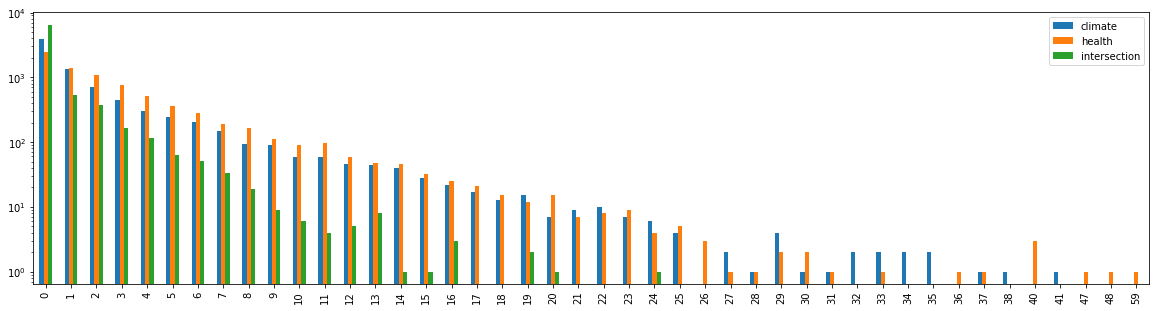

In [144]:
df_histogram_number_of_mentions = pd.DataFrame(data=histogram_number_of_mentions)
df_histogram_number_of_mentions.plot.bar(logy=True, figsize=(20,5))

### References per year: total, average, proportion, per WHO region

In [145]:
df_per_year = pd.DataFrame(data=per_year)
df_per_year

climate  health  intersection
1970       33      70             2
1971       80     116             4
1972      136     133            27
1973       54     262            28
1974       53     473            34
1975       28     214             9
1976       48     209             6
1977       63     273            14
1978       55     279            11
1979       72     399            14
1980       57     370            19
1981       92     399            13
1982       41     281            17
1983       76     251            21
1984      115     417            49
1985       69     479            43
1986       51     318            16
1987       96     312            25
1988      197     305            41
1989      501     282            58
1990      365     321            73
1991      388     301            38
1992      285     394            30
1993      270     331            27
1994      255     338            43
1995      237     325            48
1996      264     393            55
1997      297     243            25
1998      241     252            18
1999      194     438            45
2000      198     716            51
2001      180     661            53
2002      194     666            91
2003      171     761            90
2004      170     773           116
2005      199     669            94
2006      251     623           100
2007     1290     577           158
2008      953    1458           432
2009     1452     830           349
2010      974     641           246
2011      817     776           228
2012      598     564           118
2013      622     775           181
2014      846    1221           219
2015      944     583           141
2016      879     595           120
2017      953     494           107

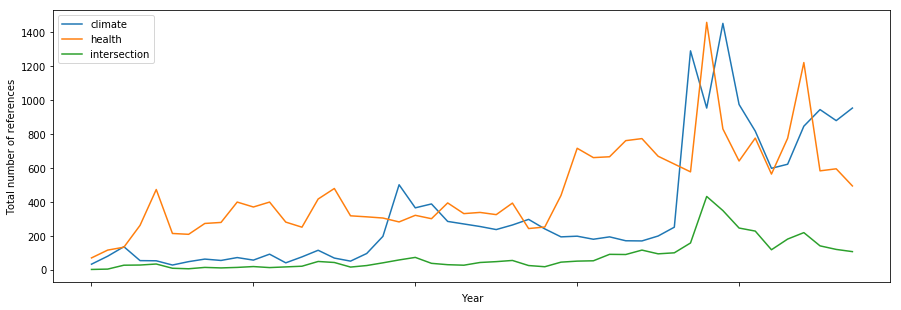

In [146]:
ax = df_per_year.plot.line(figsize=(15,5))
#ax.set_xticklabels(range(1970,2017))
ax.set_xlabel("Year")
ax.set_ylabel("Total number of references")
ax


In [147]:
df_average_per_year = pd.DataFrame(data=average_per_year)
df_average_per_year

climate    health  intersection
1970  0.471429  1.000000      0.028571
1971  0.689655  1.000000      0.034483
1972  1.088000  1.064000      0.216000
1973  0.450000  2.183333      0.233333
1974  0.410853  3.666667      0.263566
1975  0.222222  1.698413      0.071429
1976  0.358209  1.559701      0.044776
1977  0.450000  1.950000      0.100000
1978  0.390071  1.978723      0.078014
1979  0.500000  2.770833      0.097222
1980  0.382550  2.483221      0.127517
1981  0.634483  2.751724      0.089655
1982  0.278912  1.911565      0.115646
1983  0.510067  1.684564      0.140940
1984  0.766667  2.780000      0.326667
1985  0.503650  3.496350      0.313869
1986  0.342282  2.134228      0.107383
1987  0.631579  2.052632      0.164474
1988  1.279221  1.980519      0.266234
1989  3.274510  1.843137      0.379085
1990  2.339744  2.057692      0.467949
1991  2.395062  1.858025      0.234568
1992  1.706587  2.359281      0.179641
1993  1.542857  1.891429      0.154286
1994  1.432584  1.898876      0.241573
1995  1.377907  1.889535      0.279070
1996  1.458564  2.171271      0.303867
1997  1.687500  1.380682      0.142045
1998  1.331492  1.392265      0.099448
1999  1.071823  2.419890      0.248619
2000  1.112360  4.022472      0.286517
2001  0.952381  3.497354      0.280423
2002  1.031915  3.542553      0.484043
2003  0.904762  4.026455      0.476190
2004  0.885417  4.026042      0.604167
2005  1.075676  3.616216      0.508108
2006  1.300518  3.227979      0.518135
2007  6.753927  3.020942      0.827225
2008  4.963542  7.593750      2.250000
2009  7.523316  4.300518      1.808290
2010  5.153439  3.391534      1.301587
2011  4.211340  4.000000      1.175258
2012  3.066667  2.892308      0.605128
2013  3.222798  4.015544      0.937824
2014  4.360825  6.293814      1.128866
2015  4.891192  3.020725      0.730570
2016  4.530928  3.067010      0.618557
2017  4.862245  2.520408      0.545918

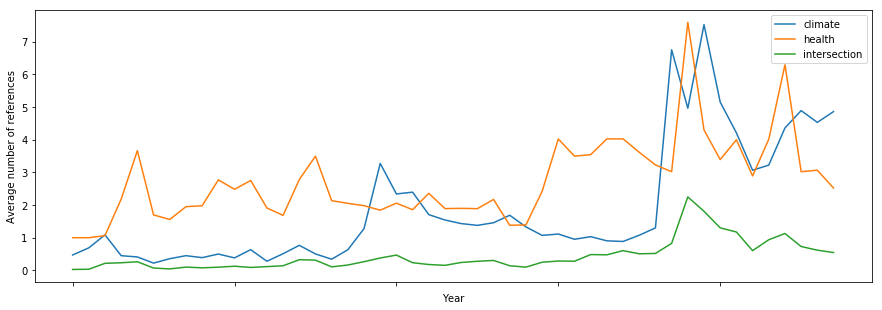

In [148]:
ax = df_average_per_year.plot.line(figsize=(15,5))
#ax.set_xticklabels(range(1970,2017))
ax.set_xlabel("Year")
ax.set_ylabel("Average number of references")
ax

In [149]:
df_proportion_per_year = pd.DataFrame(data=proportion_per_year)
df_proportion_per_year

climate     health  intersection
1970  21.428571  50.000000      1.428571
1971  24.137931  49.137931      2.586207
1972  37.600000  49.600000      9.600000
1973  29.166667  63.333333     10.000000
1974  31.782946  75.968992     10.852713
1975  17.460317  57.142857      4.761905
1976  23.880597  55.223881      2.238806
1977  28.571429  62.142857      5.000000
1978  21.276596  56.028369      6.382979
1979  27.083333  66.666667      4.166667
1980  22.818792  75.838926      9.395973
1981  38.620690  66.896552      6.206897
1982  14.965986  62.585034      4.761905
1983  18.791946  56.375839      5.369128
1984  31.333333  71.333333     15.333333
1985  35.766423  83.211679     17.518248
1986  20.134228  60.402685      8.724832
1987  29.605263  60.526316      8.552632
1988  46.753247  63.636364     12.987013
1989  68.627451  60.784314     18.300654
1990  61.538462  61.538462     20.512821
1991  67.283951  58.024691      8.024691
1992  62.874251  72.455090     10.179641
1993  59.428571  66.285714      8.000000
1994  54.494382  65.730337     14.606742
1995  51.162791  62.790698     12.209302
1996  50.276243  61.878453     14.364641
1997  49.431818  53.977273      8.522727
1998  46.408840  54.696133      6.629834
1999  34.254144  67.955801      9.944751
2000  46.067416  74.719101     11.235955
2001  34.920635  73.544974     10.582011
2002  42.021277  69.680851     15.425532
2003  31.216931  74.074074     13.756614
2004  40.625000  79.166667     20.312500
2005  34.594595  75.135135     14.054054
2006  37.823834  73.056995     19.170984
2007  87.434555  62.303665     24.607330
2008  87.500000  93.750000     66.145833
2009  94.300518  80.310881     53.367876
2010  86.772487  71.957672     38.624339
2011  76.804124  80.927835     42.268041
2012  68.205128  70.256410     24.615385
2013  70.466321  78.756477     27.979275
2014  74.742268  88.144330     41.237113
2015  79.274611  74.093264     26.943005
2016  83.505155  71.134021     25.773196
2017  85.204082  69.387755     25.510204

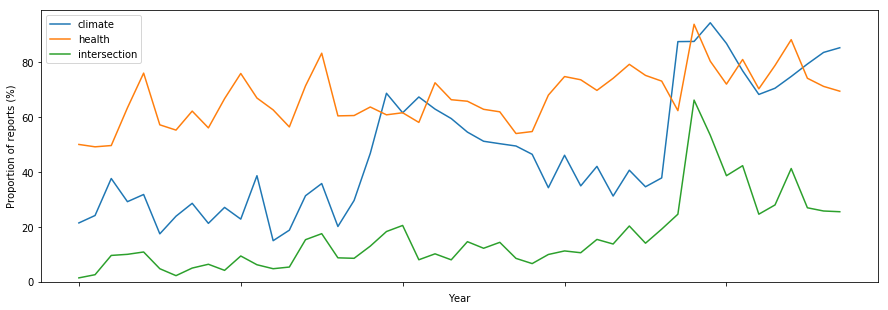

In [150]:
ax = df_proportion_per_year.plot.line(figsize=(15,5))
#ax.set_xticklabels(range(1970,2017))
ax.set_xlabel("Year")
ax.set_ylabel("Proportion of reports (%)")
ax.set_ylim(ymin=0)
ax

### References per WHO region: total

In [151]:
df_per_region = pd.DataFrame(data=per_region)
df_per_region

climate  health  intersection
Africa                              3279    7930          1054
Eastern Mediterranean                866    1714           256
Europe                              3433    3467           745
Latin America and the Caribbean     3490    4909           646
North America                        189     507            56
South-East Asia                     1046    1364           204
Western Pacific                     3977    2515           758

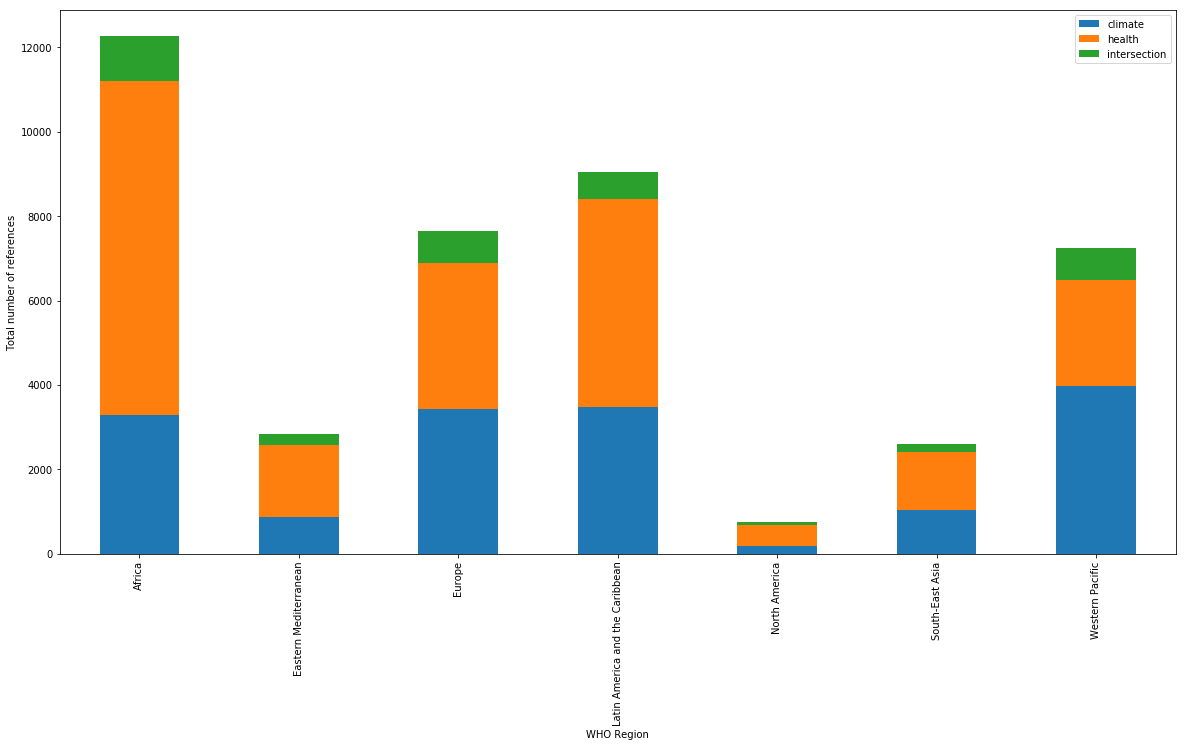

In [152]:
ax = df_per_region.plot.bar(stacked=True,figsize=(20,10))
ax.set_xlabel("WHO Region")
ax.set_ylabel("Total number of references")
ax

### Frenquency of keywords: health and climate

In [153]:
df_health_keywords = pd.DataFrame(sorted(global_count_health_keywords.items(), key=lambda k: k[1], reverse=True), columns=["Keyword", "Number of mentions"])
df_health_keywords

Keyword  Number of mentions
0                   food                5117
1                 health                3233
2                 hunger                2546
3                   aids                1807
4                disease                1605
5               diseases                1056
6                 famine                 798
7            health_care                 714
8           malnutrition                 543
9                malaria                 523
10             mortality                 439
11              pandemic                 408
12                 ebola                 355
13            starvation                 346
14          tuberculosis                 276
15              epidemic                 265
16              drinking                 256
17              medicine                 229
18             epidemics                 226
19             nutrition                 195
20                 virus                 187
21         public_health                 187
22             pandemics                 178
23             medicines                 135
24            infectious                 122
25              syndrome                  92
26              sickness                  82
27               illness                  76
28         contamination                  72
29               cholera                  48
30            contagious                  46
31             infection                  45
32           respiratory                  28
33             incurable                  26
34      undernourishment                  26
35               hygiene                  25
36                  sars                  25
37         air_pollution                  23
38             influenza                  22
39               curable                  21
40             morbidity                  17
41             diarrhoea                  15
42                 avian                  14
43      immunodeficiency                  14
44        cardiovascular                  12
45               measles                  12
46             treatable                  11
47          hypertension                   8
48         poliomyelitis                   7
49             pneumonia                   6
50              stunting                   6
51           hemorrhagic                   6
52               typhoid                   6
53            healthcare                   6
54            meningitis                   5
55  communicable_disease                   5
56                 cough                   4
57               tetanus                   2
58          epidemiology                   2

In [154]:
df_climate_keywords = pd.DataFrame(sorted(global_count_climate_keywords.items(), key=lambda k: k[1], reverse=True), columns=["Keyword", "Number of mentions"])
df_climate_keywords

Keyword  Number of mentions
0        climate_change                6355
1         environmental                3794
2             emissions                 829
3       desertification                 755
4             pollution                 733
5            greenhouse                 592
6        global_warming                 586
7             renewable                 398
8      renewable_energy                 364
9                carbon                 361
10             climatic                 220
11                gases                 208
12              weather                 190
13          temperature                 141
14              dioxide                 129
15                solar                 115
16             emission                  87
17           low_carbon                  87
18           geothermal                  86
19              warming                  83
20         temperatures                  75
21      extreme_weather                  60
22             biofuels                  40
23             typhoons                  37
24              celsius                  37
25        precipitation                  18
26  climate_variability                   9
27      carbon_emission                   7
28            tornadoes                   6
29               bleach                   2

### Network graphs: intersection
Blue nodes are health keywords and green nodes are climate keywords. The closer the nodes are to each other, the more often the words co-occur. The graph only shows links between words that co-occurred at least 10 times in the whole corpus.

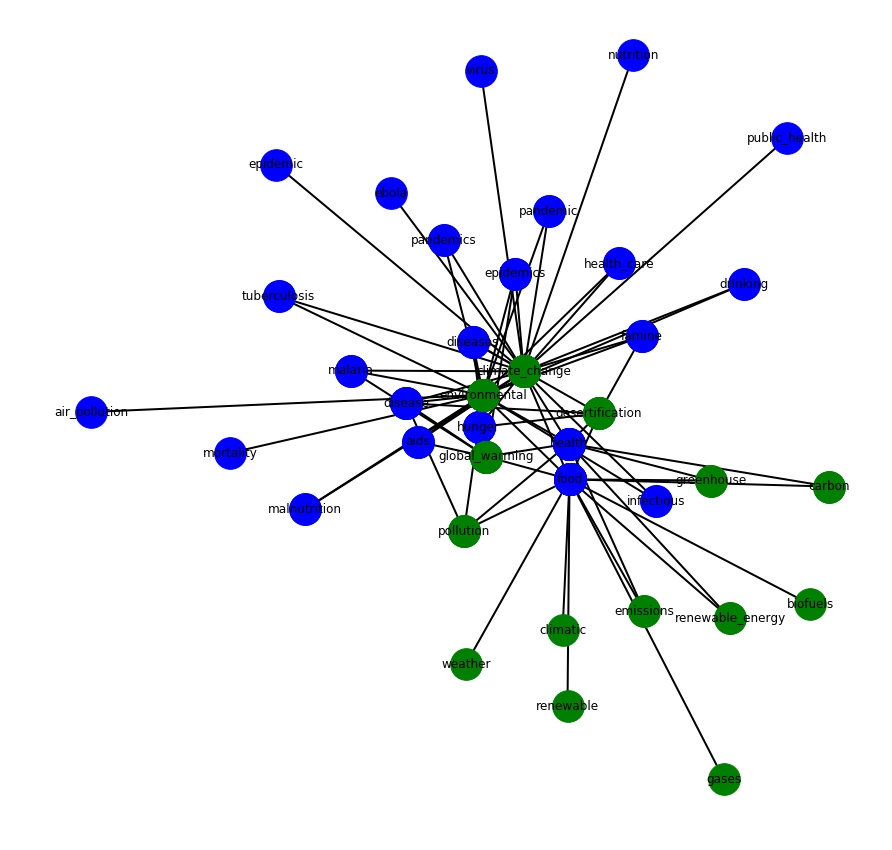

In [155]:
G = nx.Graph()

health_nodes = []
climate_nodes = []

for word1 in cooccurrence_matrix.keys():
    for word2 in cooccurrence_matrix[word1].keys():
        if cooccurrence_matrix[word1][word2] >= 10:
            G.add_edge(word1, word2, weight=cooccurrence_matrix[word1][word2])
            health_nodes.append(word1)
            climate_nodes.append(word2)

plt.figure(figsize=(15,15))

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=health_nodes, node_size=1000, node_color='b')
nx.draw_networkx_nodes(G, pos, nodelist=climate_nodes, node_size=1000, node_color='g')
nx.draw_networkx_edges(G, pos, edgelist=G.edges(data=True), width=2)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
#edge_labels = nx.get_edge_attributes(G,'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

---
## Topic modelling experiment
The goal of this experiment was to investigate whether health and climate would surface as clearly identifiable topics in the set of topics computed in the model. This does not seem the case though.

In [77]:
import gensim
from nltk.tokenize import sent_tokenize, word_tokenize, MWETokenizer

compound_country_names = [("antigua", "and", "barbuda"), ("virgin", "islands"), ("cayman", "islands"), ("falkland", "islands"), ("marshall", "islands"), ("french", "guiana"), ("puerto", "rico"), ("saint", "kitts", "and", "nevis"), ("saint", "lucia"), ("saint", "martin"), ("saint", "vincent", "and", "the", "grenadines"), ("sint", "maarten"), ("trinidad", "and", "tobago"), ("sao", "tome", "and", "principe"), ("burkina", "faso"), ("cape", "verde"), ("cape", "verdean"), ("costa", "rica"), ("costa", "rican"), ("czech", "republic"), ("dominican", "republic"), ("el", "salvador"), ("gambia"), ("new", "zealand"), ("new", "zealander"), ("north", "korea"), ("north", "korean"), ("papua", "new", "guinea"), ("papua", "new", "guinean"), ("saudi", "arabia"), ("saudi", "arabian"), ("sierra", "leone"), ("sierra", "leonian"), ("solomon", "islands"), ("south", "africa"), ("south", "african"), ("south", "korea"), ("south", "korean"), ("sri", "lanka"), ("sri", "lankan"), ("trinidad", "and", "tobago"), ("united", "arab", "emirates"), ("united", "kingdom"), ("united", "states"), ("united", "states", "of", "america"), ("viet", "nam"), ("western", "samoa"), ("western", "samoan"), ("côte", "d'ivoire"), ("côte", "d'", "ivoire"), ("cote", "d'ivoire"), ("cote", "d'", "ivoire"), ("côte", "d’ivoire"), ("côte", "d’", "ivoire"), ("cote", "d’ivoire"), ("cote", "d’", "ivoire"), ("san", "marino")]
MWEtokenizer = MWETokenizer(compound_country_names)

regex = re.compile(r'[\W0-9]') #tokens starting with punctuation/symbols

corpus = []
for file in files.keys():
    txtFileObj = open(file, 'r')
    text = txtFileObj.read().lower()
    #tokenised_sentences = [word_tokenize(sentence) for sentence in sent_tokenize(text)]
    #compound_tokenised_sentences =  [MWEtokenizer.tokenize(wordlist) for wordlist in tokenised_sentences]    
    #corpus.extend(compound_tokenised_sentences)
    tokenised_text = word_tokenize(text)
    compound_tokenised_text =  MWEtokenizer.tokenize(tokenised_text)
    filtered_compound_tokenised_text = [w for w in compound_tokenised_text if not regex.match(w)]
    corpus.append(filtered_compound_tokenised_text)
    txtFileObj.close()

In [78]:
dictionary = gensim.corpora.Dictionary(corpus)

---
#### Removing country names (optional)
In this corpus particular country names and related words are very prominent in each document and take over the topic modelling results as topic identifiers

In [ ]:
country_names = ["bosnia", "lao", "kosovo", "korea", "korean", "burkina_faso", "afghan", "afghanistan", "africa", "african", "albania", "albanian", "algeria", "algerian", "america", "american", "andorra", "andorran", "angola", "angolan", "argentina", "argentinian", "armenia", "armenian", "asia", "asian", "atlantic", "australia", "australian", "austria", "austrian", "azerbaijan", "azerbaijani", "bahamas", "bahamian", "bahrain", "bahraini", "bangladesh", "bangladeshi", "barbadian", "barbados", "belarus", "belarusan", "belarusian", "belgian", "belgium", "belize", "belizean", "benin", "beninese", "bhutan", "bhutanese", "bolivia", "bolivian", "bosnia-herzegovina", "bosnian", "botswana", "botswanan", "brazil", "brazilian", "britain", "british", "briton", "brunei", "bruneian", "bulgaria", "bulgarian", "burkina", "burkinese", "burma", "burmese", "burundi", "burundian", "cambodia", "cambodian", "cameroon", "cameroonian", "canada", "canadian", "cape_verde", "cape_verdean", "caribbean", "chad", "chadian", "chile", "chilean", "china", "chinese", "colombia", "colombian", "congo", "congolese", "costa_rica", "costa_rican", "croat", "croatia", "croatian", "cuba", "cuban", "cypriot", "cyprus", "czech", "czech_republic", "dane", "danish", "denmark", "djibouti", "djiboutian", "dominica", "dominican", "dominican_republic", "dutch", "ecuador", "ecuadorean", "egypt", "egyptian", "el_salvador", "emirati", "england", "english", "eritrea", "eritrean", "estonia", "estonian", "ethiopia", "ethiopian", "europe", "european", "fiji", "fijian", "filipino", "finland", "finn", "finnish", "france", "french", "gabon", "gabonese", "gambia", "gambian", "georgia", "georgian", "german", "germany", "ghana", "ghanaian", "greece", "greek", "grenada", "grenadian", "guatemala", "guatemalan", "guinea", "guinean", "guyana", "guyanese", "haiti", "haitian", "herzegovina", "holland", "honduran", "honduras", "hungarian", "hungary", "iceland", "icelander", "icelandic", "india", "indian", "indonesia", "indonesian", "iran", "iranian", "iraq", "iraqi", "ireland", "irish", "italian", "italy", "jamaica", "jamaican", "japan", "japanese", "jordan", "jordanian", "kazakh", "kazakhstan", "kenya", "kenyan", "kuwait", "kuwaiti", "laos", "laotian", "latvia", "latvian", "lebanese", "lebanon", "liberia", "liberian", "libya", "libyan", "liechtenstein", "liechtensteiner", "lithuania", "lithuanian", "luxembourg", "luxembourger", "luxembourgish", "macedonia", "macedonian", "madagascan", "madagascar", "malagasy", "malawi", "malawian", "malaysia", "malaysian", "maldives", "maldivian", "mali", "malian", "malta", "maltese", "mauritania", "mauritanian", "mauritian", "mauritius", "mexican", "mexico", "moldova", "moldovan", "monacan", "monaco", "mon�gasque", "mongolia", "mongolian", "montenegrin", "montenegro", "moroccan", "morocco", "mozambican", "mozambique", "myanmar", "namibia", "namibian", "nepal", "nepalese", "netherlands", "new_zealand", "new_zealander", "nicaragua", "nicaraguan", "niger", "nigeria", "nigerian", "nigerien", "north_korea", "north_korean", "norway", "norwegian", "oman", "omani", "pacific", "pakistan", "pakistani", "palestine", "palestinian", "panama", "panamanian", "papua_new_guinea", "papua_new_guinean", "paraguay", "paraguayan", "peru", "peruvian", "philippine", "philippines", "poland", "pole", "polish", "portugal", "portuguese", "qatar", "qatari", "romania", "romanian", "russia", "russian", "rwanda", "rwandan", "salvadorean", "saudi", "saudi_arabia", "saudi_arabian", "scot", "scotland", "scottish", "senegal", "senegalese", "serb", "serbia", "serbian", "seychelles", "seychellois", "sierra_leone", "sierra_leonian", "singapore", "singaporean", "slovak", "slovakia", "slovene", "sloveneorslovenian", "slovenia", "slovenian", "solomon_islands", "somali", "somalia", "south_africa", "south_african", "south_korea", "south_korean", "spain", "spaniard", "spanish", "sri_lanka", "sri_lankan", "sudan", "sudanese", "suriname", "surinamer", "surinamese", "swazi", "swaziland", "swede", "sweden", "swedish", "swiss", "switzerland", "syria", "syrian", "tadjik", "taiwan", "taiwanese", "tajik", "tajikistan", "tanzania", "tanzanian", "thai", "thailand", "tobagan", "tobagonian", "togo", "togolese", "trinidad_and_tobago", "trinidadian", "tswana", "tunisia", "tunisian", "turk", "turkey", "turkish", "turkmen", "turkmenistan", "turkoman", "tuvalu", "tuvaluan", "uae", "uganda", "ugandan", "uk", "ukraine", "ukrainian", "united_arab_emirates", "united_kingdom", "united_states", "united_states_of_america", "uruguay", "uruguayan", "usa", "uzbek", "uzbekistan", "vanuatu", "vanuatuan", "vatican", "venezuela", "venezuelan", "vietnam", "vietnamese", "viet_nam", "wales", "welsh", "western_samoa", "western_samoan", "yemen", "yemeni", "yugoslav", "yugoslavia", "zaire", "zambia", "zambian", "zimbabwe", "zimbabwean", "antigua_and_barbuda", "virgin_islands", "cayman_islands", "falkland_islands", "french_guiana", "puerto_rico", "saint_kitts_and_nevis", "saint_lucia", "saint_martin", "saint_vincent_and_the_grenadines", "sint_maarten", "trinidad_and_tobago", "sao_tome_and_principe", "kampuchea", "san_marino", "cote_d'ivoire", "côte_d'ivoire", "cote_d’ivoire", "côte_d’ivoire", "cote_d'_ivoire", "côte_d'_ivoire", "cote_d’_ivoire", "côte_d’_ivoire", "marshall_islands"]
 
for region in who_regions.values():
    for country in region:
        country_names.append(country.lower())
        
country_names = list(set(country_names))

country_ids = []
for token_id in dictionary.keys():
    token = dictionary[token_id]
    for country in country_names:
        if re.match(r"%s" % country, token):
            country_ids.append(token_id)
            if country != token:
                print("%s %s" % (country, token))
        
dictionary.filter_tokens(bad_ids=country_ids)

---

In [79]:
bow_corpus = [dictionary.doc2bow(doc) for doc in corpus]
tfidf = gensim.models.TfidfModel(bow_corpus)

In [80]:
corpus_tfidf = tfidf[bow_corpus]

In [81]:
lsi = gensim.models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=200) # initialize an LSI transformation
corpus_lsi = lsi[corpus_tfidf]

In [82]:
lsi.print_topics(num_topics=200, num_words=20)

[(0,
  '0.084*"co-operation" + 0.074*"s" + 0.061*"african" + 0.058*"nuclear" + 0.057*"south_africa" + 0.055*"arab" + 0.053*"africa" + 0.050*"disarmament" + 0.050*"israel" + 0.048*"delegation" + 0.047*"namibia" + 0.046*"republic" + 0.046*"terrorism" + 0.045*"europe" + 0.043*"soviet" + 0.043*"independence" + 0.043*"european" + 0.043*"weapons" + 0.042*"palestinian" + 0.042*"your"'),
 (1,
  '-0.178*"co-operation" + 0.177*"s" + 0.130*"sustainable" + -0.105*"arab" + -0.099*"soviet" + -0.095*"south_africa" + -0.093*"detente" + -0.090*"namibia" + -0.088*"racist" + -0.086*"socialist" + -0.086*"aggression" + 0.084*"millennium" + 0.081*"climate" + -0.079*"independence" + -0.077*"struggle" + 0.076*"reform" + 0.076*"mdgs" + -0.075*"israel" + -0.072*"imperialist" + -0.072*"non-aligned"'),
 (2,
  '0.229*"arab" + 0.172*"israel" + 0.158*"iraq" + 0.153*"israeli" + 0.147*"lebanon" + 0.144*"yemen" + 0.138*"kuwait" + 0.131*"palestinian" + 0.130*"syria" + 0.126*"iraqi" + 0.119*"islamic" + -0.117*"pacific" +